In [1]:
import pandas as pd
import numpy as np

import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from catboost import CatBoostClassifier

import shap

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
df =  pd.read_csv("./dataset/creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


In [7]:
x = df.drop('Class', axis=1)
y = df.Class

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

start = time.time()
model = CatBoostClassifier()
model.fit(x_train, y_train)
stop = time.time()

print(f"Training time: {(stop - start) * 1000 }ms")

Learning rate set to 0.098829
0:	learn: 0.3649428	total: 103ms	remaining: 1m 42s
1:	learn: 0.1993104	total: 123ms	remaining: 1m 1s
2:	learn: 0.1088011	total: 147ms	remaining: 49s
3:	learn: 0.0603028	total: 167ms	remaining: 41.6s
4:	learn: 0.0361610	total: 187ms	remaining: 37.2s
5:	learn: 0.0229739	total: 207ms	remaining: 34.3s
6:	learn: 0.0155128	total: 238ms	remaining: 33.8s
7:	learn: 0.0111047	total: 262ms	remaining: 32.5s
8:	learn: 0.0084150	total: 283ms	remaining: 31.1s
9:	learn: 0.0065093	total: 303ms	remaining: 30s
10:	learn: 0.0053854	total: 323ms	remaining: 29.1s
11:	learn: 0.0045525	total: 343ms	remaining: 28.2s
12:	learn: 0.0040508	total: 362ms	remaining: 27.5s
13:	learn: 0.0036860	total: 382ms	remaining: 26.9s
14:	learn: 0.0033981	total: 403ms	remaining: 26.5s
15:	learn: 0.0031632	total: 427ms	remaining: 26.3s
16:	learn: 0.0030074	total: 454ms	remaining: 26.2s
17:	learn: 0.0028943	total: 474ms	remaining: 25.8s
18:	learn: 0.0027523	total: 494ms	remaining: 25.5s
19:	learn: 0.0

163:	learn: 0.0011319	total: 3.59s	remaining: 18.3s
164:	learn: 0.0011296	total: 3.61s	remaining: 18.3s
165:	learn: 0.0011275	total: 3.63s	remaining: 18.3s
166:	learn: 0.0011255	total: 3.65s	remaining: 18.2s
167:	learn: 0.0011212	total: 3.67s	remaining: 18.2s
168:	learn: 0.0011174	total: 3.69s	remaining: 18.2s
169:	learn: 0.0011105	total: 3.71s	remaining: 18.1s
170:	learn: 0.0011096	total: 3.73s	remaining: 18.1s
171:	learn: 0.0011046	total: 3.75s	remaining: 18.1s
172:	learn: 0.0011000	total: 3.77s	remaining: 18s
173:	learn: 0.0010970	total: 3.79s	remaining: 18s
174:	learn: 0.0010959	total: 3.81s	remaining: 18s
175:	learn: 0.0010943	total: 3.84s	remaining: 18s
176:	learn: 0.0010919	total: 3.86s	remaining: 17.9s
177:	learn: 0.0010900	total: 3.88s	remaining: 17.9s
178:	learn: 0.0010839	total: 3.9s	remaining: 17.9s
179:	learn: 0.0010785	total: 3.92s	remaining: 17.8s
180:	learn: 0.0010774	total: 3.94s	remaining: 17.8s
181:	learn: 0.0010727	total: 3.96s	remaining: 17.8s
182:	learn: 0.0010701

329:	learn: 0.0006489	total: 6.96s	remaining: 14.1s
330:	learn: 0.0006478	total: 6.99s	remaining: 14.1s
331:	learn: 0.0006468	total: 7.01s	remaining: 14.1s
332:	learn: 0.0006447	total: 7.03s	remaining: 14.1s
333:	learn: 0.0006424	total: 7.05s	remaining: 14.1s
334:	learn: 0.0006414	total: 7.07s	remaining: 14s
335:	learn: 0.0006393	total: 7.09s	remaining: 14s
336:	learn: 0.0006308	total: 7.11s	remaining: 14s
337:	learn: 0.0006294	total: 7.13s	remaining: 14s
338:	learn: 0.0006279	total: 7.15s	remaining: 13.9s
339:	learn: 0.0006276	total: 7.17s	remaining: 13.9s
340:	learn: 0.0006248	total: 7.19s	remaining: 13.9s
341:	learn: 0.0006231	total: 7.21s	remaining: 13.9s
342:	learn: 0.0006209	total: 7.23s	remaining: 13.9s
343:	learn: 0.0006175	total: 7.25s	remaining: 13.8s
344:	learn: 0.0006156	total: 7.27s	remaining: 13.8s
345:	learn: 0.0006150	total: 7.29s	remaining: 13.8s
346:	learn: 0.0006126	total: 7.31s	remaining: 13.8s
347:	learn: 0.0006121	total: 7.33s	remaining: 13.7s
348:	learn: 0.000609

492:	learn: 0.0003505	total: 10.3s	remaining: 10.6s
493:	learn: 0.0003477	total: 10.3s	remaining: 10.6s
494:	learn: 0.0003469	total: 10.3s	remaining: 10.6s
495:	learn: 0.0003448	total: 10.4s	remaining: 10.5s
496:	learn: 0.0003442	total: 10.4s	remaining: 10.5s
497:	learn: 0.0003440	total: 10.4s	remaining: 10.5s
498:	learn: 0.0003428	total: 10.4s	remaining: 10.5s
499:	learn: 0.0003425	total: 10.4s	remaining: 10.4s
500:	learn: 0.0003403	total: 10.5s	remaining: 10.4s
501:	learn: 0.0003367	total: 10.5s	remaining: 10.4s
502:	learn: 0.0003345	total: 10.5s	remaining: 10.4s
503:	learn: 0.0003342	total: 10.5s	remaining: 10.4s
504:	learn: 0.0003340	total: 10.5s	remaining: 10.3s
505:	learn: 0.0003329	total: 10.6s	remaining: 10.3s
506:	learn: 0.0003314	total: 10.6s	remaining: 10.3s
507:	learn: 0.0003312	total: 10.6s	remaining: 10.3s
508:	learn: 0.0003305	total: 10.6s	remaining: 10.2s
509:	learn: 0.0003296	total: 10.6s	remaining: 10.2s
510:	learn: 0.0003292	total: 10.7s	remaining: 10.2s
511:	learn: 

655:	learn: 0.0002010	total: 13.6s	remaining: 7.14s
656:	learn: 0.0002001	total: 13.6s	remaining: 7.12s
657:	learn: 0.0001998	total: 13.7s	remaining: 7.1s
658:	learn: 0.0001997	total: 13.7s	remaining: 7.08s
659:	learn: 0.0001994	total: 13.7s	remaining: 7.06s
660:	learn: 0.0001983	total: 13.7s	remaining: 7.04s
661:	learn: 0.0001982	total: 13.7s	remaining: 7.02s
662:	learn: 0.0001971	total: 13.8s	remaining: 7s
663:	learn: 0.0001968	total: 13.8s	remaining: 6.97s
664:	learn: 0.0001958	total: 13.8s	remaining: 6.95s
665:	learn: 0.0001956	total: 13.8s	remaining: 6.93s
666:	learn: 0.0001951	total: 13.8s	remaining: 6.91s
667:	learn: 0.0001948	total: 13.9s	remaining: 6.89s
668:	learn: 0.0001944	total: 13.9s	remaining: 6.87s
669:	learn: 0.0001935	total: 13.9s	remaining: 6.85s
670:	learn: 0.0001925	total: 13.9s	remaining: 6.83s
671:	learn: 0.0001921	total: 13.9s	remaining: 6.81s
672:	learn: 0.0001895	total: 14s	remaining: 6.79s
673:	learn: 0.0001893	total: 14s	remaining: 6.77s
674:	learn: 0.000189

817:	learn: 0.0001225	total: 16.9s	remaining: 3.77s
818:	learn: 0.0001222	total: 17s	remaining: 3.75s
819:	learn: 0.0001209	total: 17s	remaining: 3.73s
820:	learn: 0.0001207	total: 17s	remaining: 3.7s
821:	learn: 0.0001206	total: 17s	remaining: 3.68s
822:	learn: 0.0001205	total: 17s	remaining: 3.66s
823:	learn: 0.0001196	total: 17.1s	remaining: 3.64s
824:	learn: 0.0001193	total: 17.1s	remaining: 3.62s
825:	learn: 0.0001193	total: 17.1s	remaining: 3.6s
826:	learn: 0.0001192	total: 17.1s	remaining: 3.58s
827:	learn: 0.0001191	total: 17.1s	remaining: 3.56s
828:	learn: 0.0001189	total: 17.2s	remaining: 3.54s
829:	learn: 0.0001187	total: 17.2s	remaining: 3.52s
830:	learn: 0.0001183	total: 17.2s	remaining: 3.5s
831:	learn: 0.0001183	total: 17.2s	remaining: 3.48s
832:	learn: 0.0001181	total: 17.2s	remaining: 3.45s
833:	learn: 0.0001178	total: 17.3s	remaining: 3.43s
834:	learn: 0.0001175	total: 17.3s	remaining: 3.41s
835:	learn: 0.0001173	total: 17.3s	remaining: 3.39s
836:	learn: 0.0001172	tot

984:	learn: 0.0000893	total: 20.3s	remaining: 309ms
985:	learn: 0.0000892	total: 20.3s	remaining: 288ms
986:	learn: 0.0000891	total: 20.3s	remaining: 268ms
987:	learn: 0.0000890	total: 20.3s	remaining: 247ms
988:	learn: 0.0000889	total: 20.4s	remaining: 227ms
989:	learn: 0.0000887	total: 20.4s	remaining: 206ms
990:	learn: 0.0000886	total: 20.4s	remaining: 185ms
991:	learn: 0.0000886	total: 20.4s	remaining: 165ms
992:	learn: 0.0000885	total: 20.4s	remaining: 144ms
993:	learn: 0.0000883	total: 20.5s	remaining: 124ms
994:	learn: 0.0000883	total: 20.5s	remaining: 103ms
995:	learn: 0.0000879	total: 20.5s	remaining: 82.4ms
996:	learn: 0.0000877	total: 20.5s	remaining: 61.8ms
997:	learn: 0.0000876	total: 20.5s	remaining: 41.2ms
998:	learn: 0.0000874	total: 20.6s	remaining: 20.6ms
999:	learn: 0.0000873	total: 20.6s	remaining: 0us
Training time: 21088.615894317627ms


In [9]:
import shap

explainer = shap.Explainer(model)
start = time.time()
shap_values = explainer.shap_values(x_train)
stop = time.time()

print(f"Training time: {(stop - start) * 1000 }ms")

Training time: 12559.069156646729ms


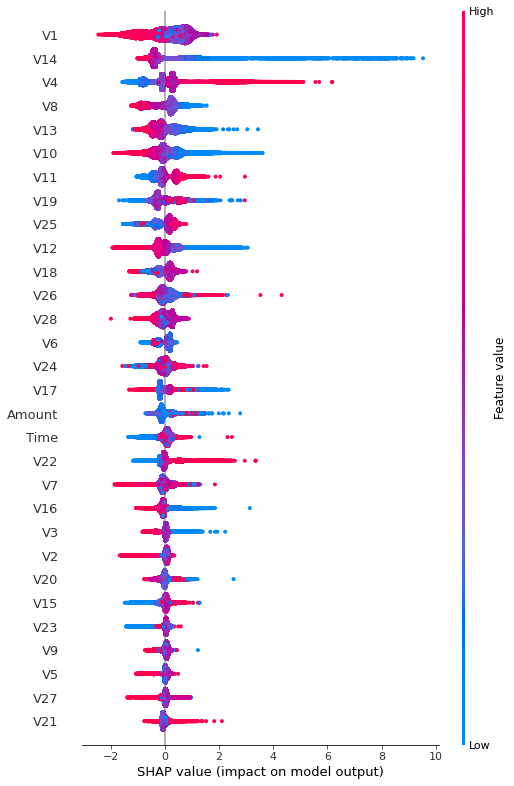

In [10]:
shap.initjs()

shap.summary_plot(shap_values, x_train, max_display=len(x.columns))

In [11]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(x_train.columns, vals)),columns=['feature_name','importance_value'])
feature_importance.sort_values(by=['importance_value'],ascending=False,inplace=True)
feature_importance.to_csv('./results/catboost/cc-fraud-shap-catboost.csv')

print(feature_importance.to_latex())

\begin{tabular}{llr}
\toprule
{} & feature\_name &  importance\_value \\
\midrule
1  &           V1 &          0.610696 \\
14 &          V14 &          0.575734 \\
4  &           V4 &          0.512862 \\
8  &           V8 &          0.416447 \\
13 &          V13 &          0.370410 \\
10 &          V10 &          0.368462 \\
11 &          V11 &          0.336685 \\
19 &          V19 &          0.328266 \\
25 &          V25 &          0.280274 \\
12 &          V12 &          0.275883 \\
18 &          V18 &          0.246081 \\
26 &          V26 &          0.216451 \\
28 &          V28 &          0.199943 \\
6  &           V6 &          0.197276 \\
24 &          V24 &          0.185735 \\
17 &          V17 &          0.182155 \\
29 &       Amount &          0.180362 \\
0  &         Time &          0.177253 \\
22 &          V22 &          0.171437 \\
7  &           V7 &          0.138809 \\
16 &          V16 &          0.136536 \\
3  &           V3 &          0.135688 \\
2  &           V

In [12]:
import os

measures_data = []
featured_names = []

def print_classification_report(classification_report):
    accuracy = classification_report["accuracy"]
    precision = classification_report["weighted avg"]["precision"]
    f1_score = classification_report["weighted avg"]["f1-score"]
    recall = classification_report["weighted avg"]["recall"]
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"F1 Score: {f1_score}")
    print(f"Recall: {recall}")
    print(f"Training time: {(stop - start) * 1000 }s")

def get_measures(feature, classification_report, training_time, shap_value, storage): 
    accuracy = classification_report["accuracy"]
    precision = classification_report["weighted avg"]["precision"]
    f1_score = classification_report["weighted avg"]["f1-score"]
    recall = classification_report["weighted avg"]["recall"]
    
    measures_data.append([feature, accuracy, precision, recall, f1_score, training_time, shap_value, storage])

def train_model(feature, shap_value):
    featured_names.append(feature)
    
    x = df[featured_names]
    y = df.Class
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

    start = time.time()
    model = CatBoostClassifier()
    model.fit(x_train, y_train)
    stop = time.time()
    
    prediction = model.predict(x_test)

    storage = get_storage(featured_names)
    training_time = (stop - start) * 1000
    classification = classification_report(y_test, prediction, output_dict=True)
    get_measures(feature, classification, training_time, shap_value, storage)

def get_storage(features):
    merged_features = ['Class'] + features
    temp = df[merged_features]
    temp.to_csv('./dataset/temp.csv')
    
    return os.stat('./dataset/temp.csv').st_size
            
def shap_all(df):
    for index, row in df.iterrows():
        train_model(row['feature_name'], row['importance_value'])

In [13]:
shap_all(feature_importance)

measures_df = pd.DataFrame(measures_data, columns = ['Feature Name', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time', 'Shap Value', 'Storage'])

measures_df.to_csv('./results/catboost/cc-fraud-catboost-report.csv')

Learning rate set to 0.098829
0:	learn: 0.4082768	total: 20.4ms	remaining: 20.4s
1:	learn: 0.2485632	total: 38.6ms	remaining: 19.2s
2:	learn: 0.1535807	total: 55.7ms	remaining: 18.5s
3:	learn: 0.0986323	total: 72.1ms	remaining: 17.9s
4:	learn: 0.0667599	total: 89.1ms	remaining: 17.7s
5:	learn: 0.0476775	total: 108ms	remaining: 17.9s
6:	learn: 0.0357198	total: 130ms	remaining: 18.4s
7:	learn: 0.0282896	total: 147ms	remaining: 18.2s
8:	learn: 0.0234213	total: 164ms	remaining: 18s
9:	learn: 0.0199895	total: 180ms	remaining: 17.8s
10:	learn: 0.0176278	total: 199ms	remaining: 17.9s
11:	learn: 0.0160334	total: 219ms	remaining: 18.1s
12:	learn: 0.0148219	total: 235ms	remaining: 17.8s
13:	learn: 0.0139292	total: 251ms	remaining: 17.7s
14:	learn: 0.0132601	total: 269ms	remaining: 17.6s
15:	learn: 0.0127772	total: 286ms	remaining: 17.6s
16:	learn: 0.0124349	total: 302ms	remaining: 17.4s
17:	learn: 0.0121445	total: 323ms	remaining: 17.6s
18:	learn: 0.0119298	total: 339ms	remaining: 17.5s
19:	lear

163:	learn: 0.0108273	total: 2.84s	remaining: 14.5s
164:	learn: 0.0108215	total: 2.86s	remaining: 14.5s
165:	learn: 0.0108192	total: 2.88s	remaining: 14.5s
166:	learn: 0.0108171	total: 2.9s	remaining: 14.5s
167:	learn: 0.0108124	total: 2.92s	remaining: 14.5s
168:	learn: 0.0108116	total: 2.94s	remaining: 14.4s
169:	learn: 0.0108110	total: 2.95s	remaining: 14.4s
170:	learn: 0.0108077	total: 2.97s	remaining: 14.4s
171:	learn: 0.0108051	total: 2.99s	remaining: 14.4s
172:	learn: 0.0108046	total: 3s	remaining: 14.4s
173:	learn: 0.0108012	total: 3.02s	remaining: 14.3s
174:	learn: 0.0107981	total: 3.04s	remaining: 14.3s
175:	learn: 0.0107979	total: 3.05s	remaining: 14.3s
176:	learn: 0.0107978	total: 3.08s	remaining: 14.3s
177:	learn: 0.0107958	total: 3.1s	remaining: 14.3s
178:	learn: 0.0107933	total: 3.11s	remaining: 14.3s
179:	learn: 0.0107918	total: 3.13s	remaining: 14.3s
180:	learn: 0.0107912	total: 3.15s	remaining: 14.3s
181:	learn: 0.0107876	total: 3.17s	remaining: 14.2s
182:	learn: 0.010

322:	learn: 0.0106090	total: 5.68s	remaining: 11.9s
323:	learn: 0.0106084	total: 5.7s	remaining: 11.9s
324:	learn: 0.0106074	total: 5.72s	remaining: 11.9s
325:	learn: 0.0106071	total: 5.74s	remaining: 11.9s
326:	learn: 0.0106064	total: 5.75s	remaining: 11.8s
327:	learn: 0.0106059	total: 5.77s	remaining: 11.8s
328:	learn: 0.0106037	total: 5.79s	remaining: 11.8s
329:	learn: 0.0106027	total: 5.81s	remaining: 11.8s
330:	learn: 0.0106024	total: 5.83s	remaining: 11.8s
331:	learn: 0.0106017	total: 5.84s	remaining: 11.8s
332:	learn: 0.0106013	total: 5.86s	remaining: 11.7s
333:	learn: 0.0106000	total: 5.88s	remaining: 11.7s
334:	learn: 0.0105986	total: 5.9s	remaining: 11.7s
335:	learn: 0.0105986	total: 5.91s	remaining: 11.7s
336:	learn: 0.0105982	total: 5.93s	remaining: 11.7s
337:	learn: 0.0105982	total: 5.94s	remaining: 11.6s
338:	learn: 0.0105982	total: 5.96s	remaining: 11.6s
339:	learn: 0.0105970	total: 5.98s	remaining: 11.6s
340:	learn: 0.0105962	total: 6s	remaining: 11.6s
341:	learn: 0.010

482:	learn: 0.0105281	total: 8.5s	remaining: 9.1s
483:	learn: 0.0105273	total: 8.53s	remaining: 9.09s
484:	learn: 0.0105272	total: 8.54s	remaining: 9.07s
485:	learn: 0.0105269	total: 8.56s	remaining: 9.05s
486:	learn: 0.0105265	total: 8.58s	remaining: 9.04s
487:	learn: 0.0105264	total: 8.6s	remaining: 9.02s
488:	learn: 0.0105259	total: 8.61s	remaining: 9s
489:	learn: 0.0105253	total: 8.63s	remaining: 8.99s
490:	learn: 0.0105253	total: 8.65s	remaining: 8.97s
491:	learn: 0.0105253	total: 8.66s	remaining: 8.95s
492:	learn: 0.0105251	total: 8.68s	remaining: 8.93s
493:	learn: 0.0105245	total: 8.7s	remaining: 8.91s
494:	learn: 0.0105243	total: 8.71s	remaining: 8.89s
495:	learn: 0.0105243	total: 8.73s	remaining: 8.87s
496:	learn: 0.0105243	total: 8.75s	remaining: 8.85s
497:	learn: 0.0105242	total: 8.76s	remaining: 8.84s
498:	learn: 0.0105238	total: 8.78s	remaining: 8.82s
499:	learn: 0.0105233	total: 8.8s	remaining: 8.8s
500:	learn: 0.0105231	total: 8.82s	remaining: 8.78s
501:	learn: 0.0105230

646:	learn: 0.0105070	total: 11s	remaining: 5.99s
647:	learn: 0.0105070	total: 11s	remaining: 5.97s
648:	learn: 0.0105070	total: 11s	remaining: 5.95s
649:	learn: 0.0105070	total: 11s	remaining: 5.93s
650:	learn: 0.0105070	total: 11s	remaining: 5.91s
651:	learn: 0.0105070	total: 11s	remaining: 5.89s
652:	learn: 0.0105070	total: 11.1s	remaining: 5.88s
653:	learn: 0.0105070	total: 11.1s	remaining: 5.86s
654:	learn: 0.0105070	total: 11.1s	remaining: 5.84s
655:	learn: 0.0105070	total: 11.1s	remaining: 5.82s
656:	learn: 0.0105070	total: 11.1s	remaining: 5.8s
657:	learn: 0.0105070	total: 11.1s	remaining: 5.78s
658:	learn: 0.0105070	total: 11.1s	remaining: 5.76s
659:	learn: 0.0105070	total: 11.1s	remaining: 5.74s
660:	learn: 0.0105070	total: 11.2s	remaining: 5.72s
661:	learn: 0.0105070	total: 11.2s	remaining: 5.7s
662:	learn: 0.0105070	total: 11.2s	remaining: 5.69s
663:	learn: 0.0105070	total: 11.2s	remaining: 5.67s
664:	learn: 0.0105070	total: 11.2s	remaining: 5.65s
665:	learn: 0.0105070	tota

808:	learn: 0.0105070	total: 13.1s	remaining: 3.1s
809:	learn: 0.0105070	total: 13.1s	remaining: 3.08s
810:	learn: 0.0105070	total: 13.2s	remaining: 3.06s
811:	learn: 0.0105070	total: 13.2s	remaining: 3.05s
812:	learn: 0.0105070	total: 13.2s	remaining: 3.03s
813:	learn: 0.0105070	total: 13.2s	remaining: 3.02s
814:	learn: 0.0105070	total: 13.2s	remaining: 3s
815:	learn: 0.0105070	total: 13.2s	remaining: 2.98s
816:	learn: 0.0105070	total: 13.2s	remaining: 2.96s
817:	learn: 0.0105070	total: 13.2s	remaining: 2.95s
818:	learn: 0.0105070	total: 13.3s	remaining: 2.93s
819:	learn: 0.0105070	total: 13.3s	remaining: 2.91s
820:	learn: 0.0105070	total: 13.3s	remaining: 2.9s
821:	learn: 0.0105070	total: 13.3s	remaining: 2.88s
822:	learn: 0.0105070	total: 13.3s	remaining: 2.86s
823:	learn: 0.0105070	total: 13.3s	remaining: 2.85s
824:	learn: 0.0105070	total: 13.3s	remaining: 2.83s
825:	learn: 0.0105070	total: 13.4s	remaining: 2.81s
826:	learn: 0.0105070	total: 13.4s	remaining: 2.8s
827:	learn: 0.0105

972:	learn: 0.0105070	total: 15.3s	remaining: 424ms
973:	learn: 0.0105070	total: 15.3s	remaining: 408ms
974:	learn: 0.0105070	total: 15.3s	remaining: 393ms
975:	learn: 0.0105070	total: 15.3s	remaining: 377ms
976:	learn: 0.0105070	total: 15.3s	remaining: 361ms
977:	learn: 0.0105070	total: 15.4s	remaining: 345ms
978:	learn: 0.0105070	total: 15.4s	remaining: 330ms
979:	learn: 0.0105070	total: 15.4s	remaining: 314ms
980:	learn: 0.0105070	total: 15.4s	remaining: 298ms
981:	learn: 0.0105070	total: 15.4s	remaining: 282ms
982:	learn: 0.0105070	total: 15.4s	remaining: 267ms
983:	learn: 0.0105070	total: 15.4s	remaining: 251ms
984:	learn: 0.0105070	total: 15.4s	remaining: 235ms
985:	learn: 0.0105070	total: 15.5s	remaining: 219ms
986:	learn: 0.0105070	total: 15.5s	remaining: 204ms
987:	learn: 0.0105070	total: 15.5s	remaining: 188ms
988:	learn: 0.0105070	total: 15.5s	remaining: 172ms
989:	learn: 0.0105070	total: 15.5s	remaining: 157ms
990:	learn: 0.0105070	total: 15.5s	remaining: 141ms
991:	learn: 

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Learning rate set to 0.098829
0:	learn: 0.4107817	total: 19.9ms	remaining: 19.9s
1:	learn: 0.2302548	total: 37.4ms	remaining: 18.7s
2:	learn: 0.1238659	total: 55.2ms	remaining: 18.4s
3:	learn: 0.0754133	total: 72.6ms	remaining: 18.1s
4:	learn: 0.0450680	total: 89.5ms	remaining: 17.8s
5:	learn: 0.0291625	total: 110ms	remaining: 18.2s
6:	learn: 0.0201397	total: 126ms	remaining: 17.9s
7:	learn: 0.0147913	total: 143ms	remaining: 17.7s
8:	learn: 0.0115598	total: 160ms	remaining: 17.6s
9:	learn: 0.0095124	total: 177ms	remaining: 17.5s
10:	learn: 0.0081749	total: 194ms	remaining: 17.4s
11:	learn: 0.0072704	total: 214ms	remaining: 17.6s
12:	learn: 0.0066613	total: 232ms	remaining: 17.6s
13:	learn: 0.0062377	total: 248ms	remaining: 17.5s
14:	learn: 0.0059298	total: 265ms	remaining: 17.4s
15:	learn: 0.0057086	total: 280ms	remaining: 17.2s
16:	learn: 0.0055455	total: 295ms	remaining: 17.1s
17:	learn: 0.0054230	total: 309ms	remaining: 16.8s
18:	learn: 0.0053252	total: 327ms	remaining: 16.9s
19:	le

171:	learn: 0.0043655	total: 3.08s	remaining: 14.8s
172:	learn: 0.0043634	total: 3.1s	remaining: 14.8s
173:	learn: 0.0043611	total: 3.12s	remaining: 14.8s
174:	learn: 0.0043585	total: 3.14s	remaining: 14.8s
175:	learn: 0.0043563	total: 3.15s	remaining: 14.8s
176:	learn: 0.0043531	total: 3.17s	remaining: 14.7s
177:	learn: 0.0043513	total: 3.19s	remaining: 14.7s
178:	learn: 0.0043496	total: 3.2s	remaining: 14.7s
179:	learn: 0.0043477	total: 3.22s	remaining: 14.7s
180:	learn: 0.0043471	total: 3.24s	remaining: 14.6s
181:	learn: 0.0043452	total: 3.25s	remaining: 14.6s
182:	learn: 0.0043440	total: 3.27s	remaining: 14.6s
183:	learn: 0.0043410	total: 3.29s	remaining: 14.6s
184:	learn: 0.0043395	total: 3.31s	remaining: 14.6s
185:	learn: 0.0043384	total: 3.33s	remaining: 14.6s
186:	learn: 0.0043364	total: 3.34s	remaining: 14.5s
187:	learn: 0.0043338	total: 3.36s	remaining: 14.5s
188:	learn: 0.0043324	total: 3.38s	remaining: 14.5s
189:	learn: 0.0043307	total: 3.39s	remaining: 14.5s
190:	learn: 0.

339:	learn: 0.0040413	total: 6s	remaining: 11.6s
340:	learn: 0.0040401	total: 6.02s	remaining: 11.6s
341:	learn: 0.0040378	total: 6.04s	remaining: 11.6s
342:	learn: 0.0040357	total: 6.05s	remaining: 11.6s
343:	learn: 0.0040338	total: 6.07s	remaining: 11.6s
344:	learn: 0.0040319	total: 6.09s	remaining: 11.6s
345:	learn: 0.0040317	total: 6.11s	remaining: 11.5s
346:	learn: 0.0040301	total: 6.12s	remaining: 11.5s
347:	learn: 0.0040295	total: 6.14s	remaining: 11.5s
348:	learn: 0.0040279	total: 6.16s	remaining: 11.5s
349:	learn: 0.0040259	total: 6.17s	remaining: 11.5s
350:	learn: 0.0040241	total: 6.19s	remaining: 11.4s
351:	learn: 0.0040225	total: 6.21s	remaining: 11.4s
352:	learn: 0.0040210	total: 6.23s	remaining: 11.4s
353:	learn: 0.0040197	total: 6.25s	remaining: 11.4s
354:	learn: 0.0040186	total: 6.26s	remaining: 11.4s
355:	learn: 0.0040182	total: 6.28s	remaining: 11.4s
356:	learn: 0.0040169	total: 6.3s	remaining: 11.3s
357:	learn: 0.0040166	total: 6.31s	remaining: 11.3s
358:	learn: 0.00

507:	learn: 0.0037826	total: 8.94s	remaining: 8.66s
508:	learn: 0.0037820	total: 8.96s	remaining: 8.64s
509:	learn: 0.0037804	total: 8.98s	remaining: 8.63s
510:	learn: 0.0037795	total: 8.99s	remaining: 8.61s
511:	learn: 0.0037783	total: 9.01s	remaining: 8.59s
512:	learn: 0.0037766	total: 9.03s	remaining: 8.57s
513:	learn: 0.0037748	total: 9.04s	remaining: 8.55s
514:	learn: 0.0037742	total: 9.06s	remaining: 8.53s
515:	learn: 0.0037731	total: 9.08s	remaining: 8.52s
516:	learn: 0.0037729	total: 9.1s	remaining: 8.5s
517:	learn: 0.0037718	total: 9.11s	remaining: 8.48s
518:	learn: 0.0037680	total: 9.13s	remaining: 8.46s
519:	learn: 0.0037671	total: 9.15s	remaining: 8.45s
520:	learn: 0.0037662	total: 9.17s	remaining: 8.43s
521:	learn: 0.0037634	total: 9.19s	remaining: 8.41s
522:	learn: 0.0037628	total: 9.2s	remaining: 8.39s
523:	learn: 0.0037623	total: 9.22s	remaining: 8.37s
524:	learn: 0.0037621	total: 9.23s	remaining: 8.36s
525:	learn: 0.0037620	total: 9.25s	remaining: 8.34s
526:	learn: 0.0

675:	learn: 0.0035781	total: 11.9s	remaining: 5.69s
676:	learn: 0.0035776	total: 11.9s	remaining: 5.67s
677:	learn: 0.0035756	total: 11.9s	remaining: 5.66s
678:	learn: 0.0035751	total: 11.9s	remaining: 5.64s
679:	learn: 0.0035745	total: 11.9s	remaining: 5.62s
680:	learn: 0.0035724	total: 12s	remaining: 5.6s
681:	learn: 0.0035713	total: 12s	remaining: 5.59s
682:	learn: 0.0035691	total: 12s	remaining: 5.57s
683:	learn: 0.0035667	total: 12s	remaining: 5.55s
684:	learn: 0.0035659	total: 12s	remaining: 5.53s
685:	learn: 0.0035653	total: 12.1s	remaining: 5.51s
686:	learn: 0.0035629	total: 12.1s	remaining: 5.5s
687:	learn: 0.0035623	total: 12.1s	remaining: 5.48s
688:	learn: 0.0035617	total: 12.1s	remaining: 5.46s
689:	learn: 0.0035609	total: 12.1s	remaining: 5.45s
690:	learn: 0.0035599	total: 12.1s	remaining: 5.43s
691:	learn: 0.0035581	total: 12.2s	remaining: 5.41s
692:	learn: 0.0035576	total: 12.2s	remaining: 5.39s
693:	learn: 0.0035571	total: 12.2s	remaining: 5.37s
694:	learn: 0.0035569	to

843:	learn: 0.0033905	total: 14.8s	remaining: 2.74s
844:	learn: 0.0033897	total: 14.8s	remaining: 2.72s
845:	learn: 0.0033886	total: 14.9s	remaining: 2.7s
846:	learn: 0.0033880	total: 14.9s	remaining: 2.69s
847:	learn: 0.0033874	total: 14.9s	remaining: 2.67s
848:	learn: 0.0033870	total: 14.9s	remaining: 2.65s
849:	learn: 0.0033859	total: 14.9s	remaining: 2.63s
850:	learn: 0.0033836	total: 14.9s	remaining: 2.62s
851:	learn: 0.0033829	total: 15s	remaining: 2.6s
852:	learn: 0.0033817	total: 15s	remaining: 2.58s
853:	learn: 0.0033788	total: 15s	remaining: 2.56s
854:	learn: 0.0033779	total: 15s	remaining: 2.54s
855:	learn: 0.0033751	total: 15s	remaining: 2.53s
856:	learn: 0.0033745	total: 15s	remaining: 2.51s
857:	learn: 0.0033734	total: 15.1s	remaining: 2.49s
858:	learn: 0.0033715	total: 15.1s	remaining: 2.48s
859:	learn: 0.0033696	total: 15.1s	remaining: 2.46s
860:	learn: 0.0033691	total: 15.1s	remaining: 2.44s
861:	learn: 0.0033675	total: 15.1s	remaining: 2.42s
862:	learn: 0.0033667	tota

10:	learn: 0.0069188	total: 193ms	remaining: 17.3s
11:	learn: 0.0060717	total: 214ms	remaining: 17.6s
12:	learn: 0.0054980	total: 233ms	remaining: 17.7s
13:	learn: 0.0050232	total: 251ms	remaining: 17.6s
14:	learn: 0.0047478	total: 267ms	remaining: 17.6s
15:	learn: 0.0044904	total: 284ms	remaining: 17.5s
16:	learn: 0.0043346	total: 300ms	remaining: 17.4s
17:	learn: 0.0042149	total: 318ms	remaining: 17.3s
18:	learn: 0.0041218	total: 335ms	remaining: 17.3s
19:	learn: 0.0040461	total: 351ms	remaining: 17.2s
20:	learn: 0.0039791	total: 368ms	remaining: 17.1s
21:	learn: 0.0039134	total: 384ms	remaining: 17.1s
22:	learn: 0.0038662	total: 404ms	remaining: 17.2s
23:	learn: 0.0038274	total: 423ms	remaining: 17.2s
24:	learn: 0.0037936	total: 440ms	remaining: 17.2s
25:	learn: 0.0037667	total: 458ms	remaining: 17.1s
26:	learn: 0.0037511	total: 474ms	remaining: 17.1s
27:	learn: 0.0037327	total: 491ms	remaining: 17s
28:	learn: 0.0036967	total: 508ms	remaining: 17s
29:	learn: 0.0036720	total: 526ms	r

179:	learn: 0.0028054	total: 3.34s	remaining: 15.2s
180:	learn: 0.0028034	total: 3.36s	remaining: 15.2s
181:	learn: 0.0027983	total: 3.38s	remaining: 15.2s
182:	learn: 0.0027947	total: 3.4s	remaining: 15.2s
183:	learn: 0.0027917	total: 3.41s	remaining: 15.1s
184:	learn: 0.0027892	total: 3.43s	remaining: 15.1s
185:	learn: 0.0027873	total: 3.45s	remaining: 15.1s
186:	learn: 0.0027837	total: 3.46s	remaining: 15.1s
187:	learn: 0.0027815	total: 3.48s	remaining: 15s
188:	learn: 0.0027778	total: 3.5s	remaining: 15s
189:	learn: 0.0027712	total: 3.52s	remaining: 15s
190:	learn: 0.0027663	total: 3.53s	remaining: 15s
191:	learn: 0.0027639	total: 3.55s	remaining: 14.9s
192:	learn: 0.0027587	total: 3.57s	remaining: 14.9s
193:	learn: 0.0027549	total: 3.59s	remaining: 14.9s
194:	learn: 0.0027519	total: 3.61s	remaining: 14.9s
195:	learn: 0.0027496	total: 3.62s	remaining: 14.9s
196:	learn: 0.0027472	total: 3.64s	remaining: 14.8s
197:	learn: 0.0027448	total: 3.66s	remaining: 14.8s
198:	learn: 0.0027443	

346:	learn: 0.0023365	total: 6.29s	remaining: 11.8s
347:	learn: 0.0023334	total: 6.31s	remaining: 11.8s
348:	learn: 0.0023308	total: 6.33s	remaining: 11.8s
349:	learn: 0.0023296	total: 6.35s	remaining: 11.8s
350:	learn: 0.0023265	total: 6.37s	remaining: 11.8s
351:	learn: 0.0023262	total: 6.38s	remaining: 11.8s
352:	learn: 0.0023227	total: 6.4s	remaining: 11.7s
353:	learn: 0.0023203	total: 6.42s	remaining: 11.7s
354:	learn: 0.0023170	total: 6.43s	remaining: 11.7s
355:	learn: 0.0023167	total: 6.45s	remaining: 11.7s
356:	learn: 0.0023153	total: 6.47s	remaining: 11.7s
357:	learn: 0.0023133	total: 6.49s	remaining: 11.6s
358:	learn: 0.0023097	total: 6.51s	remaining: 11.6s
359:	learn: 0.0023077	total: 6.53s	remaining: 11.6s
360:	learn: 0.0023060	total: 6.54s	remaining: 11.6s
361:	learn: 0.0023045	total: 6.56s	remaining: 11.6s
362:	learn: 0.0023011	total: 6.58s	remaining: 11.5s
363:	learn: 0.0022995	total: 6.59s	remaining: 11.5s
364:	learn: 0.0022974	total: 6.61s	remaining: 11.5s
365:	learn: 0

514:	learn: 0.0020078	total: 9.25s	remaining: 8.71s
515:	learn: 0.0020073	total: 9.27s	remaining: 8.69s
516:	learn: 0.0020057	total: 9.29s	remaining: 8.67s
517:	learn: 0.0020047	total: 9.3s	remaining: 8.66s
518:	learn: 0.0020029	total: 9.32s	remaining: 8.64s
519:	learn: 0.0020025	total: 9.34s	remaining: 8.62s
520:	learn: 0.0019996	total: 9.35s	remaining: 8.6s
521:	learn: 0.0019967	total: 9.37s	remaining: 8.58s
522:	learn: 0.0019940	total: 9.39s	remaining: 8.56s
523:	learn: 0.0019919	total: 9.4s	remaining: 8.54s
524:	learn: 0.0019899	total: 9.42s	remaining: 8.52s
525:	learn: 0.0019883	total: 9.44s	remaining: 8.5s
526:	learn: 0.0019851	total: 9.46s	remaining: 8.49s
527:	learn: 0.0019824	total: 9.48s	remaining: 8.47s
528:	learn: 0.0019813	total: 9.49s	remaining: 8.45s
529:	learn: 0.0019793	total: 9.51s	remaining: 8.44s
530:	learn: 0.0019777	total: 9.53s	remaining: 8.42s
531:	learn: 0.0019754	total: 9.54s	remaining: 8.4s
532:	learn: 0.0019742	total: 9.56s	remaining: 8.38s
533:	learn: 0.001

682:	learn: 0.0017682	total: 12.2s	remaining: 5.66s
683:	learn: 0.0017676	total: 12.2s	remaining: 5.64s
684:	learn: 0.0017667	total: 12.2s	remaining: 5.62s
685:	learn: 0.0017659	total: 12.2s	remaining: 5.6s
686:	learn: 0.0017641	total: 12.3s	remaining: 5.58s
687:	learn: 0.0017624	total: 12.3s	remaining: 5.57s
688:	learn: 0.0017618	total: 12.3s	remaining: 5.55s
689:	learn: 0.0017601	total: 12.3s	remaining: 5.53s
690:	learn: 0.0017581	total: 12.3s	remaining: 5.51s
691:	learn: 0.0017563	total: 12.3s	remaining: 5.49s
692:	learn: 0.0017544	total: 12.4s	remaining: 5.47s
693:	learn: 0.0017511	total: 12.4s	remaining: 5.46s
694:	learn: 0.0017495	total: 12.4s	remaining: 5.44s
695:	learn: 0.0017482	total: 12.4s	remaining: 5.42s
696:	learn: 0.0017462	total: 12.4s	remaining: 5.4s
697:	learn: 0.0017450	total: 12.4s	remaining: 5.38s
698:	learn: 0.0017445	total: 12.5s	remaining: 5.37s
699:	learn: 0.0017436	total: 12.5s	remaining: 5.35s
700:	learn: 0.0017427	total: 12.5s	remaining: 5.33s
701:	learn: 0.

850:	learn: 0.0015823	total: 15.1s	remaining: 2.65s
851:	learn: 0.0015818	total: 15.2s	remaining: 2.63s
852:	learn: 0.0015814	total: 15.2s	remaining: 2.61s
853:	learn: 0.0015811	total: 15.2s	remaining: 2.6s
854:	learn: 0.0015800	total: 15.2s	remaining: 2.58s
855:	learn: 0.0015798	total: 15.2s	remaining: 2.56s
856:	learn: 0.0015795	total: 15.2s	remaining: 2.54s
857:	learn: 0.0015787	total: 15.3s	remaining: 2.52s
858:	learn: 0.0015778	total: 15.3s	remaining: 2.51s
859:	learn: 0.0015751	total: 15.3s	remaining: 2.49s
860:	learn: 0.0015747	total: 15.3s	remaining: 2.47s
861:	learn: 0.0015717	total: 15.3s	remaining: 2.45s
862:	learn: 0.0015710	total: 15.3s	remaining: 2.44s
863:	learn: 0.0015693	total: 15.4s	remaining: 2.42s
864:	learn: 0.0015685	total: 15.4s	remaining: 2.4s
865:	learn: 0.0015678	total: 15.4s	remaining: 2.38s
866:	learn: 0.0015668	total: 15.4s	remaining: 2.36s
867:	learn: 0.0015665	total: 15.4s	remaining: 2.35s
868:	learn: 0.0015658	total: 15.4s	remaining: 2.33s
869:	learn: 0.

10:	learn: 0.0063442	total: 193ms	remaining: 17.3s
11:	learn: 0.0056995	total: 215ms	remaining: 17.7s
12:	learn: 0.0052296	total: 234ms	remaining: 17.8s
13:	learn: 0.0049066	total: 252ms	remaining: 17.8s
14:	learn: 0.0046591	total: 269ms	remaining: 17.6s
15:	learn: 0.0044732	total: 285ms	remaining: 17.5s
16:	learn: 0.0043363	total: 301ms	remaining: 17.4s
17:	learn: 0.0042314	total: 318ms	remaining: 17.3s
18:	learn: 0.0041284	total: 335ms	remaining: 17.3s
19:	learn: 0.0040447	total: 351ms	remaining: 17.2s
20:	learn: 0.0039593	total: 369ms	remaining: 17.2s
21:	learn: 0.0038942	total: 385ms	remaining: 17.1s
22:	learn: 0.0038521	total: 407ms	remaining: 17.3s
23:	learn: 0.0038174	total: 425ms	remaining: 17.3s
24:	learn: 0.0037769	total: 442ms	remaining: 17.2s
25:	learn: 0.0037456	total: 459ms	remaining: 17.2s
26:	learn: 0.0037205	total: 476ms	remaining: 17.1s
27:	learn: 0.0037041	total: 492ms	remaining: 17.1s
28:	learn: 0.0036755	total: 509ms	remaining: 17s
29:	learn: 0.0036510	total: 526ms

180:	learn: 0.0025595	total: 3.29s	remaining: 14.9s
181:	learn: 0.0025562	total: 3.31s	remaining: 14.9s
182:	learn: 0.0025534	total: 3.33s	remaining: 14.9s
183:	learn: 0.0025506	total: 3.35s	remaining: 14.8s
184:	learn: 0.0025462	total: 3.37s	remaining: 14.8s
185:	learn: 0.0025413	total: 3.38s	remaining: 14.8s
186:	learn: 0.0025384	total: 3.4s	remaining: 14.8s
187:	learn: 0.0025339	total: 3.42s	remaining: 14.8s
188:	learn: 0.0025300	total: 3.43s	remaining: 14.7s
189:	learn: 0.0025251	total: 3.45s	remaining: 14.7s
190:	learn: 0.0025232	total: 3.46s	remaining: 14.7s
191:	learn: 0.0025194	total: 3.48s	remaining: 14.7s
192:	learn: 0.0025156	total: 3.5s	remaining: 14.6s
193:	learn: 0.0025139	total: 3.52s	remaining: 14.6s
194:	learn: 0.0025077	total: 3.54s	remaining: 14.6s
195:	learn: 0.0025053	total: 3.56s	remaining: 14.6s
196:	learn: 0.0025007	total: 3.57s	remaining: 14.6s
197:	learn: 0.0024975	total: 3.59s	remaining: 14.5s
198:	learn: 0.0024909	total: 3.61s	remaining: 14.5s
199:	learn: 0.

348:	learn: 0.0020212	total: 6.22s	remaining: 11.6s
349:	learn: 0.0020203	total: 6.24s	remaining: 11.6s
350:	learn: 0.0020162	total: 6.26s	remaining: 11.6s
351:	learn: 0.0020126	total: 6.28s	remaining: 11.6s
352:	learn: 0.0020106	total: 6.3s	remaining: 11.5s
353:	learn: 0.0020084	total: 6.31s	remaining: 11.5s
354:	learn: 0.0020067	total: 6.33s	remaining: 11.5s
355:	learn: 0.0020046	total: 6.35s	remaining: 11.5s
356:	learn: 0.0020011	total: 6.37s	remaining: 11.5s
357:	learn: 0.0019962	total: 6.38s	remaining: 11.4s
358:	learn: 0.0019935	total: 6.4s	remaining: 11.4s
359:	learn: 0.0019879	total: 6.42s	remaining: 11.4s
360:	learn: 0.0019868	total: 6.44s	remaining: 11.4s
361:	learn: 0.0019860	total: 6.46s	remaining: 11.4s
362:	learn: 0.0019849	total: 6.47s	remaining: 11.4s
363:	learn: 0.0019828	total: 6.49s	remaining: 11.3s
364:	learn: 0.0019810	total: 6.51s	remaining: 11.3s
365:	learn: 0.0019790	total: 6.52s	remaining: 11.3s
366:	learn: 0.0019777	total: 6.54s	remaining: 11.3s
367:	learn: 0.

516:	learn: 0.0017161	total: 9.18s	remaining: 8.57s
517:	learn: 0.0017142	total: 9.2s	remaining: 8.56s
518:	learn: 0.0017135	total: 9.22s	remaining: 8.54s
519:	learn: 0.0017126	total: 9.23s	remaining: 8.52s
520:	learn: 0.0017111	total: 9.25s	remaining: 8.51s
521:	learn: 0.0017096	total: 9.27s	remaining: 8.49s
522:	learn: 0.0017091	total: 9.28s	remaining: 8.47s
523:	learn: 0.0017064	total: 9.3s	remaining: 8.45s
524:	learn: 0.0017041	total: 9.32s	remaining: 8.43s
525:	learn: 0.0017015	total: 9.34s	remaining: 8.41s
526:	learn: 0.0016981	total: 9.35s	remaining: 8.39s
527:	learn: 0.0016960	total: 9.37s	remaining: 8.38s
528:	learn: 0.0016953	total: 9.39s	remaining: 8.36s
529:	learn: 0.0016943	total: 9.41s	remaining: 8.34s
530:	learn: 0.0016927	total: 9.43s	remaining: 8.32s
531:	learn: 0.0016898	total: 9.44s	remaining: 8.31s
532:	learn: 0.0016879	total: 9.46s	remaining: 8.29s
533:	learn: 0.0016876	total: 9.48s	remaining: 8.27s
534:	learn: 0.0016850	total: 9.49s	remaining: 8.25s
535:	learn: 0.

684:	learn: 0.0014477	total: 12.1s	remaining: 5.58s
685:	learn: 0.0014444	total: 12.2s	remaining: 5.56s
686:	learn: 0.0014431	total: 12.2s	remaining: 5.54s
687:	learn: 0.0014412	total: 12.2s	remaining: 5.53s
688:	learn: 0.0014387	total: 12.2s	remaining: 5.51s
689:	learn: 0.0014363	total: 12.2s	remaining: 5.49s
690:	learn: 0.0014347	total: 12.2s	remaining: 5.47s
691:	learn: 0.0014320	total: 12.3s	remaining: 5.45s
692:	learn: 0.0014307	total: 12.3s	remaining: 5.43s
693:	learn: 0.0014274	total: 12.3s	remaining: 5.42s
694:	learn: 0.0014253	total: 12.3s	remaining: 5.4s
695:	learn: 0.0014244	total: 12.3s	remaining: 5.38s
696:	learn: 0.0014223	total: 12.3s	remaining: 5.36s
697:	learn: 0.0014212	total: 12.4s	remaining: 5.35s
698:	learn: 0.0014201	total: 12.4s	remaining: 5.33s
699:	learn: 0.0014177	total: 12.4s	remaining: 5.31s
700:	learn: 0.0014164	total: 12.4s	remaining: 5.29s
701:	learn: 0.0014149	total: 12.4s	remaining: 5.27s
702:	learn: 0.0014148	total: 12.4s	remaining: 5.26s
703:	learn: 0

852:	learn: 0.0012601	total: 15.1s	remaining: 2.6s
853:	learn: 0.0012576	total: 15.1s	remaining: 2.58s
854:	learn: 0.0012568	total: 15.1s	remaining: 2.56s
855:	learn: 0.0012557	total: 15.1s	remaining: 2.54s
856:	learn: 0.0012544	total: 15.2s	remaining: 2.53s
857:	learn: 0.0012539	total: 15.2s	remaining: 2.51s
858:	learn: 0.0012520	total: 15.2s	remaining: 2.49s
859:	learn: 0.0012494	total: 15.2s	remaining: 2.47s
860:	learn: 0.0012487	total: 15.2s	remaining: 2.46s
861:	learn: 0.0012482	total: 15.2s	remaining: 2.44s
862:	learn: 0.0012475	total: 15.3s	remaining: 2.42s
863:	learn: 0.0012461	total: 15.3s	remaining: 2.4s
864:	learn: 0.0012454	total: 15.3s	remaining: 2.39s
865:	learn: 0.0012441	total: 15.3s	remaining: 2.37s
866:	learn: 0.0012433	total: 15.3s	remaining: 2.35s
867:	learn: 0.0012428	total: 15.3s	remaining: 2.33s
868:	learn: 0.0012413	total: 15.4s	remaining: 2.31s
869:	learn: 0.0012410	total: 15.4s	remaining: 2.3s
870:	learn: 0.0012405	total: 15.4s	remaining: 2.28s
871:	learn: 0.0

20:	learn: 0.0035229	total: 406ms	remaining: 18.9s
21:	learn: 0.0034615	total: 426ms	remaining: 18.9s
22:	learn: 0.0034228	total: 447ms	remaining: 19s
23:	learn: 0.0033801	total: 464ms	remaining: 18.9s
24:	learn: 0.0033404	total: 482ms	remaining: 18.8s
25:	learn: 0.0033054	total: 502ms	remaining: 18.8s
26:	learn: 0.0032682	total: 520ms	remaining: 18.7s
27:	learn: 0.0032316	total: 540ms	remaining: 18.8s
28:	learn: 0.0032000	total: 558ms	remaining: 18.7s
29:	learn: 0.0031696	total: 576ms	remaining: 18.6s
30:	learn: 0.0031477	total: 597ms	remaining: 18.6s
31:	learn: 0.0031369	total: 617ms	remaining: 18.7s
32:	learn: 0.0031232	total: 639ms	remaining: 18.7s
33:	learn: 0.0031002	total: 657ms	remaining: 18.7s
34:	learn: 0.0030762	total: 674ms	remaining: 18.6s
35:	learn: 0.0030714	total: 694ms	remaining: 18.6s
36:	learn: 0.0030582	total: 711ms	remaining: 18.5s
37:	learn: 0.0030546	total: 729ms	remaining: 18.5s
38:	learn: 0.0030450	total: 748ms	remaining: 18.4s
39:	learn: 0.0030235	total: 765ms

185:	learn: 0.0020761	total: 3.54s	remaining: 15.5s
186:	learn: 0.0020746	total: 3.56s	remaining: 15.5s
187:	learn: 0.0020732	total: 3.58s	remaining: 15.5s
188:	learn: 0.0020718	total: 3.6s	remaining: 15.5s
189:	learn: 0.0020706	total: 3.62s	remaining: 15.4s
190:	learn: 0.0020661	total: 3.64s	remaining: 15.4s
191:	learn: 0.0020609	total: 3.66s	remaining: 15.4s
192:	learn: 0.0020578	total: 3.67s	remaining: 15.4s
193:	learn: 0.0020568	total: 3.69s	remaining: 15.3s
194:	learn: 0.0020525	total: 3.71s	remaining: 15.3s
195:	learn: 0.0020497	total: 3.73s	remaining: 15.3s
196:	learn: 0.0020485	total: 3.75s	remaining: 15.3s
197:	learn: 0.0020474	total: 3.77s	remaining: 15.3s
198:	learn: 0.0020435	total: 3.79s	remaining: 15.2s
199:	learn: 0.0020425	total: 3.8s	remaining: 15.2s
200:	learn: 0.0020415	total: 3.82s	remaining: 15.2s
201:	learn: 0.0020361	total: 3.84s	remaining: 15.2s
202:	learn: 0.0020275	total: 3.85s	remaining: 15.1s
203:	learn: 0.0020261	total: 3.87s	remaining: 15.1s
204:	learn: 0.

352:	learn: 0.0015397	total: 6.51s	remaining: 11.9s
353:	learn: 0.0015364	total: 6.53s	remaining: 11.9s
354:	learn: 0.0015333	total: 6.55s	remaining: 11.9s
355:	learn: 0.0015285	total: 6.56s	remaining: 11.9s
356:	learn: 0.0015267	total: 6.58s	remaining: 11.9s
357:	learn: 0.0015236	total: 6.6s	remaining: 11.8s
358:	learn: 0.0015213	total: 6.62s	remaining: 11.8s
359:	learn: 0.0015183	total: 6.63s	remaining: 11.8s
360:	learn: 0.0015174	total: 6.65s	remaining: 11.8s
361:	learn: 0.0015132	total: 6.67s	remaining: 11.8s
362:	learn: 0.0015113	total: 6.68s	remaining: 11.7s
363:	learn: 0.0015096	total: 6.7s	remaining: 11.7s
364:	learn: 0.0015067	total: 6.72s	remaining: 11.7s
365:	learn: 0.0015039	total: 6.74s	remaining: 11.7s
366:	learn: 0.0015023	total: 6.76s	remaining: 11.7s
367:	learn: 0.0015014	total: 6.78s	remaining: 11.6s
368:	learn: 0.0014984	total: 6.79s	remaining: 11.6s
369:	learn: 0.0014958	total: 6.81s	remaining: 11.6s
370:	learn: 0.0014916	total: 6.83s	remaining: 11.6s
371:	learn: 0.

520:	learn: 0.0012180	total: 9.48s	remaining: 8.71s
521:	learn: 0.0012165	total: 9.5s	remaining: 8.7s
522:	learn: 0.0012155	total: 9.52s	remaining: 8.68s
523:	learn: 0.0012137	total: 9.53s	remaining: 8.66s
524:	learn: 0.0012115	total: 9.55s	remaining: 8.64s
525:	learn: 0.0012097	total: 9.57s	remaining: 8.62s
526:	learn: 0.0012082	total: 9.58s	remaining: 8.6s
527:	learn: 0.0012077	total: 9.6s	remaining: 8.58s
528:	learn: 0.0012029	total: 9.62s	remaining: 8.56s
529:	learn: 0.0012005	total: 9.63s	remaining: 8.54s
530:	learn: 0.0011998	total: 9.65s	remaining: 8.52s
531:	learn: 0.0011993	total: 9.67s	remaining: 8.51s
532:	learn: 0.0011981	total: 9.69s	remaining: 8.49s
533:	learn: 0.0011972	total: 9.71s	remaining: 8.47s
534:	learn: 0.0011958	total: 9.73s	remaining: 8.45s
535:	learn: 0.0011954	total: 9.74s	remaining: 8.43s
536:	learn: 0.0011922	total: 9.76s	remaining: 8.42s
537:	learn: 0.0011911	total: 9.78s	remaining: 8.4s
538:	learn: 0.0011894	total: 9.79s	remaining: 8.38s
539:	learn: 0.001

688:	learn: 0.0009513	total: 12.5s	remaining: 5.62s
689:	learn: 0.0009501	total: 12.5s	remaining: 5.6s
690:	learn: 0.0009484	total: 12.5s	remaining: 5.58s
691:	learn: 0.0009457	total: 12.5s	remaining: 5.57s
692:	learn: 0.0009420	total: 12.5s	remaining: 5.55s
693:	learn: 0.0009381	total: 12.5s	remaining: 5.53s
694:	learn: 0.0009377	total: 12.6s	remaining: 5.51s
695:	learn: 0.0009347	total: 12.6s	remaining: 5.49s
696:	learn: 0.0009335	total: 12.6s	remaining: 5.47s
697:	learn: 0.0009330	total: 12.6s	remaining: 5.46s
698:	learn: 0.0009327	total: 12.6s	remaining: 5.44s
699:	learn: 0.0009295	total: 12.6s	remaining: 5.42s
700:	learn: 0.0009290	total: 12.7s	remaining: 5.4s
701:	learn: 0.0009271	total: 12.7s	remaining: 5.38s
702:	learn: 0.0009258	total: 12.7s	remaining: 5.37s
703:	learn: 0.0009254	total: 12.7s	remaining: 5.35s
704:	learn: 0.0009249	total: 12.7s	remaining: 5.33s
705:	learn: 0.0009216	total: 12.8s	remaining: 5.31s
706:	learn: 0.0009204	total: 12.8s	remaining: 5.29s
707:	learn: 0.

856:	learn: 0.0007387	total: 15.4s	remaining: 2.58s
857:	learn: 0.0007362	total: 15.5s	remaining: 2.56s
858:	learn: 0.0007340	total: 15.5s	remaining: 2.54s
859:	learn: 0.0007336	total: 15.5s	remaining: 2.52s
860:	learn: 0.0007334	total: 15.5s	remaining: 2.5s
861:	learn: 0.0007328	total: 15.5s	remaining: 2.48s
862:	learn: 0.0007325	total: 15.5s	remaining: 2.47s
863:	learn: 0.0007306	total: 15.6s	remaining: 2.45s
864:	learn: 0.0007299	total: 15.6s	remaining: 2.43s
865:	learn: 0.0007281	total: 15.6s	remaining: 2.41s
866:	learn: 0.0007253	total: 15.6s	remaining: 2.39s
867:	learn: 0.0007249	total: 15.6s	remaining: 2.38s
868:	learn: 0.0007241	total: 15.6s	remaining: 2.36s
869:	learn: 0.0007227	total: 15.7s	remaining: 2.34s
870:	learn: 0.0007209	total: 15.7s	remaining: 2.32s
871:	learn: 0.0007202	total: 15.7s	remaining: 2.3s
872:	learn: 0.0007186	total: 15.7s	remaining: 2.29s
873:	learn: 0.0007171	total: 15.7s	remaining: 2.27s
874:	learn: 0.0007170	total: 15.8s	remaining: 2.25s
875:	learn: 0.

20:	learn: 0.0033639	total: 400ms	remaining: 18.6s
21:	learn: 0.0033029	total: 423ms	remaining: 18.8s
22:	learn: 0.0032610	total: 441ms	remaining: 18.7s
23:	learn: 0.0032319	total: 458ms	remaining: 18.6s
24:	learn: 0.0031937	total: 479ms	remaining: 18.7s
25:	learn: 0.0031777	total: 496ms	remaining: 18.6s
26:	learn: 0.0031398	total: 514ms	remaining: 18.5s
27:	learn: 0.0030839	total: 533ms	remaining: 18.5s
28:	learn: 0.0030634	total: 550ms	remaining: 18.4s
29:	learn: 0.0030481	total: 570ms	remaining: 18.4s
30:	learn: 0.0030111	total: 587ms	remaining: 18.4s
31:	learn: 0.0029829	total: 606ms	remaining: 18.3s
32:	learn: 0.0029592	total: 629ms	remaining: 18.4s
33:	learn: 0.0029428	total: 646ms	remaining: 18.4s
34:	learn: 0.0029150	total: 665ms	remaining: 18.3s
35:	learn: 0.0028753	total: 684ms	remaining: 18.3s
36:	learn: 0.0028594	total: 701ms	remaining: 18.2s
37:	learn: 0.0028302	total: 722ms	remaining: 18.3s
38:	learn: 0.0028142	total: 740ms	remaining: 18.2s
39:	learn: 0.0027871	total: 757

185:	learn: 0.0018121	total: 3.56s	remaining: 15.6s
186:	learn: 0.0018109	total: 3.58s	remaining: 15.6s
187:	learn: 0.0018079	total: 3.6s	remaining: 15.6s
188:	learn: 0.0018060	total: 3.63s	remaining: 15.6s
189:	learn: 0.0018040	total: 3.64s	remaining: 15.5s
190:	learn: 0.0018024	total: 3.66s	remaining: 15.5s
191:	learn: 0.0018008	total: 3.68s	remaining: 15.5s
192:	learn: 0.0017988	total: 3.69s	remaining: 15.5s
193:	learn: 0.0017973	total: 3.71s	remaining: 15.4s
194:	learn: 0.0017953	total: 3.73s	remaining: 15.4s
195:	learn: 0.0017937	total: 3.75s	remaining: 15.4s
196:	learn: 0.0017922	total: 3.77s	remaining: 15.3s
197:	learn: 0.0017908	total: 3.78s	remaining: 15.3s
198:	learn: 0.0017894	total: 3.8s	remaining: 15.3s
199:	learn: 0.0017880	total: 3.82s	remaining: 15.3s
200:	learn: 0.0017868	total: 3.83s	remaining: 15.2s
201:	learn: 0.0017857	total: 3.85s	remaining: 15.2s
202:	learn: 0.0017845	total: 3.86s	remaining: 15.2s
203:	learn: 0.0017834	total: 3.88s	remaining: 15.1s
204:	learn: 0.

353:	learn: 0.0014569	total: 6.55s	remaining: 11.9s
354:	learn: 0.0014564	total: 6.56s	remaining: 11.9s
355:	learn: 0.0014543	total: 6.58s	remaining: 11.9s
356:	learn: 0.0014536	total: 6.6s	remaining: 11.9s
357:	learn: 0.0014494	total: 6.62s	remaining: 11.9s
358:	learn: 0.0014484	total: 6.63s	remaining: 11.8s
359:	learn: 0.0014454	total: 6.65s	remaining: 11.8s
360:	learn: 0.0014441	total: 6.67s	remaining: 11.8s
361:	learn: 0.0014420	total: 6.69s	remaining: 11.8s
362:	learn: 0.0014397	total: 6.7s	remaining: 11.8s
363:	learn: 0.0014366	total: 6.72s	remaining: 11.7s
364:	learn: 0.0014335	total: 6.74s	remaining: 11.7s
365:	learn: 0.0014316	total: 6.76s	remaining: 11.7s
366:	learn: 0.0014301	total: 6.78s	remaining: 11.7s
367:	learn: 0.0014285	total: 6.8s	remaining: 11.7s
368:	learn: 0.0014278	total: 6.82s	remaining: 11.7s
369:	learn: 0.0014272	total: 6.83s	remaining: 11.6s
370:	learn: 0.0014262	total: 6.85s	remaining: 11.6s
371:	learn: 0.0014163	total: 6.87s	remaining: 11.6s
372:	learn: 0.0

520:	learn: 0.0011580	total: 9.54s	remaining: 8.77s
521:	learn: 0.0011579	total: 9.56s	remaining: 8.76s
522:	learn: 0.0011572	total: 9.58s	remaining: 8.74s
523:	learn: 0.0011559	total: 9.6s	remaining: 8.72s
524:	learn: 0.0011551	total: 9.62s	remaining: 8.7s
525:	learn: 0.0011545	total: 9.63s	remaining: 8.68s
526:	learn: 0.0011533	total: 9.65s	remaining: 8.66s
527:	learn: 0.0011521	total: 9.67s	remaining: 8.64s
528:	learn: 0.0011490	total: 9.69s	remaining: 8.62s
529:	learn: 0.0011483	total: 9.71s	remaining: 8.61s
530:	learn: 0.0011472	total: 9.73s	remaining: 8.59s
531:	learn: 0.0011406	total: 9.75s	remaining: 8.58s
532:	learn: 0.0011399	total: 9.77s	remaining: 8.56s
533:	learn: 0.0011392	total: 9.79s	remaining: 8.54s
534:	learn: 0.0011379	total: 9.81s	remaining: 8.52s
535:	learn: 0.0011372	total: 9.82s	remaining: 8.51s
536:	learn: 0.0011344	total: 9.84s	remaining: 8.49s
537:	learn: 0.0011311	total: 9.86s	remaining: 8.47s
538:	learn: 0.0011305	total: 9.88s	remaining: 8.45s
539:	learn: 0.

687:	learn: 0.0009006	total: 12.5s	remaining: 5.68s
688:	learn: 0.0008990	total: 12.6s	remaining: 5.67s
689:	learn: 0.0008977	total: 12.6s	remaining: 5.65s
690:	learn: 0.0008965	total: 12.6s	remaining: 5.63s
691:	learn: 0.0008951	total: 12.6s	remaining: 5.61s
692:	learn: 0.0008922	total: 12.6s	remaining: 5.6s
693:	learn: 0.0008907	total: 12.7s	remaining: 5.58s
694:	learn: 0.0008896	total: 12.7s	remaining: 5.56s
695:	learn: 0.0008892	total: 12.7s	remaining: 5.54s
696:	learn: 0.0008865	total: 12.7s	remaining: 5.52s
697:	learn: 0.0008857	total: 12.7s	remaining: 5.5s
698:	learn: 0.0008855	total: 12.7s	remaining: 5.49s
699:	learn: 0.0008826	total: 12.8s	remaining: 5.47s
700:	learn: 0.0008799	total: 12.8s	remaining: 5.45s
701:	learn: 0.0008795	total: 12.8s	remaining: 5.43s
702:	learn: 0.0008772	total: 12.8s	remaining: 5.41s
703:	learn: 0.0008762	total: 12.8s	remaining: 5.39s
704:	learn: 0.0008750	total: 12.8s	remaining: 5.37s
705:	learn: 0.0008726	total: 12.9s	remaining: 5.36s
706:	learn: 0.

854:	learn: 0.0006910	total: 15.5s	remaining: 2.63s
855:	learn: 0.0006896	total: 15.5s	remaining: 2.61s
856:	learn: 0.0006881	total: 15.5s	remaining: 2.59s
857:	learn: 0.0006873	total: 15.6s	remaining: 2.58s
858:	learn: 0.0006858	total: 15.6s	remaining: 2.56s
859:	learn: 0.0006850	total: 15.6s	remaining: 2.54s
860:	learn: 0.0006844	total: 15.6s	remaining: 2.52s
861:	learn: 0.0006831	total: 15.6s	remaining: 2.5s
862:	learn: 0.0006818	total: 15.6s	remaining: 2.48s
863:	learn: 0.0006805	total: 15.7s	remaining: 2.46s
864:	learn: 0.0006786	total: 15.7s	remaining: 2.45s
865:	learn: 0.0006784	total: 15.7s	remaining: 2.43s
866:	learn: 0.0006782	total: 15.7s	remaining: 2.41s
867:	learn: 0.0006771	total: 15.7s	remaining: 2.39s
868:	learn: 0.0006770	total: 15.8s	remaining: 2.37s
869:	learn: 0.0006760	total: 15.8s	remaining: 2.36s
870:	learn: 0.0006750	total: 15.8s	remaining: 2.34s
871:	learn: 0.0006727	total: 15.8s	remaining: 2.32s
872:	learn: 0.0006700	total: 15.8s	remaining: 2.3s
873:	learn: 0.

22:	learn: 0.0031178	total: 416ms	remaining: 17.7s
23:	learn: 0.0030904	total: 436ms	remaining: 17.7s
24:	learn: 0.0030647	total: 453ms	remaining: 17.6s
25:	learn: 0.0030325	total: 470ms	remaining: 17.6s
26:	learn: 0.0030159	total: 486ms	remaining: 17.5s
27:	learn: 0.0030053	total: 503ms	remaining: 17.5s
28:	learn: 0.0029960	total: 520ms	remaining: 17.4s
29:	learn: 0.0029642	total: 537ms	remaining: 17.4s
30:	learn: 0.0029525	total: 555ms	remaining: 17.3s
31:	learn: 0.0029322	total: 572ms	remaining: 17.3s
32:	learn: 0.0029150	total: 589ms	remaining: 17.3s
33:	learn: 0.0029014	total: 606ms	remaining: 17.2s
34:	learn: 0.0028831	total: 626ms	remaining: 17.2s
35:	learn: 0.0028579	total: 646ms	remaining: 17.3s
36:	learn: 0.0028415	total: 663ms	remaining: 17.3s
37:	learn: 0.0028188	total: 681ms	remaining: 17.2s
38:	learn: 0.0028128	total: 698ms	remaining: 17.2s
39:	learn: 0.0027987	total: 715ms	remaining: 17.2s
40:	learn: 0.0027691	total: 732ms	remaining: 17.1s
41:	learn: 0.0027478	total: 748

189:	learn: 0.0017783	total: 3.39s	remaining: 14.4s
190:	learn: 0.0017708	total: 3.41s	remaining: 14.4s
191:	learn: 0.0017628	total: 3.43s	remaining: 14.4s
192:	learn: 0.0017594	total: 3.44s	remaining: 14.4s
193:	learn: 0.0017531	total: 3.46s	remaining: 14.4s
194:	learn: 0.0017500	total: 3.48s	remaining: 14.4s
195:	learn: 0.0017490	total: 3.5s	remaining: 14.3s
196:	learn: 0.0017469	total: 3.52s	remaining: 14.3s
197:	learn: 0.0017449	total: 3.53s	remaining: 14.3s
198:	learn: 0.0017423	total: 3.55s	remaining: 14.3s
199:	learn: 0.0017414	total: 3.57s	remaining: 14.3s
200:	learn: 0.0017341	total: 3.58s	remaining: 14.2s
201:	learn: 0.0017322	total: 3.6s	remaining: 14.2s
202:	learn: 0.0017290	total: 3.62s	remaining: 14.2s
203:	learn: 0.0017283	total: 3.64s	remaining: 14.2s
204:	learn: 0.0017260	total: 3.65s	remaining: 14.2s
205:	learn: 0.0017252	total: 3.67s	remaining: 14.2s
206:	learn: 0.0017240	total: 3.69s	remaining: 14.1s
207:	learn: 0.0017197	total: 3.71s	remaining: 14.1s
208:	learn: 0.

356:	learn: 0.0014016	total: 6.37s	remaining: 11.5s
357:	learn: 0.0013998	total: 6.39s	remaining: 11.5s
358:	learn: 0.0013992	total: 6.41s	remaining: 11.4s
359:	learn: 0.0013985	total: 6.43s	remaining: 11.4s
360:	learn: 0.0013968	total: 6.45s	remaining: 11.4s
361:	learn: 0.0013962	total: 6.46s	remaining: 11.4s
362:	learn: 0.0013940	total: 6.48s	remaining: 11.4s
363:	learn: 0.0013920	total: 6.5s	remaining: 11.4s
364:	learn: 0.0013904	total: 6.51s	remaining: 11.3s
365:	learn: 0.0013896	total: 6.53s	remaining: 11.3s
366:	learn: 0.0013888	total: 6.55s	remaining: 11.3s
367:	learn: 0.0013871	total: 6.57s	remaining: 11.3s
368:	learn: 0.0013853	total: 6.59s	remaining: 11.3s
369:	learn: 0.0013825	total: 6.61s	remaining: 11.2s
370:	learn: 0.0013808	total: 6.62s	remaining: 11.2s
371:	learn: 0.0013793	total: 6.64s	remaining: 11.2s
372:	learn: 0.0013784	total: 6.66s	remaining: 11.2s
373:	learn: 0.0013769	total: 6.67s	remaining: 11.2s
374:	learn: 0.0013759	total: 6.69s	remaining: 11.2s
375:	learn: 0

522:	learn: 0.0011354	total: 9.35s	remaining: 8.53s
523:	learn: 0.0011346	total: 9.37s	remaining: 8.52s
524:	learn: 0.0011338	total: 9.39s	remaining: 8.5s
525:	learn: 0.0011314	total: 9.41s	remaining: 8.48s
526:	learn: 0.0011312	total: 9.43s	remaining: 8.46s
527:	learn: 0.0011300	total: 9.44s	remaining: 8.44s
528:	learn: 0.0011287	total: 9.46s	remaining: 8.42s
529:	learn: 0.0011271	total: 9.48s	remaining: 8.4s
530:	learn: 0.0011253	total: 9.5s	remaining: 8.39s
531:	learn: 0.0011252	total: 9.52s	remaining: 8.37s
532:	learn: 0.0011231	total: 9.53s	remaining: 8.35s
533:	learn: 0.0011230	total: 9.55s	remaining: 8.33s
534:	learn: 0.0011229	total: 9.57s	remaining: 8.32s
535:	learn: 0.0011219	total: 9.59s	remaining: 8.3s
536:	learn: 0.0011195	total: 9.61s	remaining: 8.29s
537:	learn: 0.0011194	total: 9.63s	remaining: 8.27s
538:	learn: 0.0011177	total: 9.65s	remaining: 8.25s
539:	learn: 0.0011165	total: 9.67s	remaining: 8.23s
540:	learn: 0.0011136	total: 9.69s	remaining: 8.22s
541:	learn: 0.00

689:	learn: 0.0008882	total: 12.3s	remaining: 5.54s
690:	learn: 0.0008864	total: 12.4s	remaining: 5.53s
691:	learn: 0.0008849	total: 12.4s	remaining: 5.51s
692:	learn: 0.0008840	total: 12.4s	remaining: 5.49s
693:	learn: 0.0008823	total: 12.4s	remaining: 5.47s
694:	learn: 0.0008822	total: 12.4s	remaining: 5.46s
695:	learn: 0.0008811	total: 12.4s	remaining: 5.44s
696:	learn: 0.0008807	total: 12.5s	remaining: 5.42s
697:	learn: 0.0008794	total: 12.5s	remaining: 5.4s
698:	learn: 0.0008792	total: 12.5s	remaining: 5.38s
699:	learn: 0.0008778	total: 12.5s	remaining: 5.36s
700:	learn: 0.0008777	total: 12.5s	remaining: 5.34s
701:	learn: 0.0008760	total: 12.5s	remaining: 5.33s
702:	learn: 0.0008749	total: 12.6s	remaining: 5.31s
703:	learn: 0.0008735	total: 12.6s	remaining: 5.29s
704:	learn: 0.0008723	total: 12.6s	remaining: 5.27s
705:	learn: 0.0008713	total: 12.6s	remaining: 5.26s
706:	learn: 0.0008709	total: 12.6s	remaining: 5.24s
707:	learn: 0.0008697	total: 12.7s	remaining: 5.22s
708:	learn: 0

857:	learn: 0.0006883	total: 15.3s	remaining: 2.54s
858:	learn: 0.0006878	total: 15.4s	remaining: 2.52s
859:	learn: 0.0006853	total: 15.4s	remaining: 2.5s
860:	learn: 0.0006835	total: 15.4s	remaining: 2.48s
861:	learn: 0.0006809	total: 15.4s	remaining: 2.47s
862:	learn: 0.0006793	total: 15.4s	remaining: 2.45s
863:	learn: 0.0006787	total: 15.4s	remaining: 2.43s
864:	learn: 0.0006782	total: 15.5s	remaining: 2.41s
865:	learn: 0.0006777	total: 15.5s	remaining: 2.4s
866:	learn: 0.0006770	total: 15.5s	remaining: 2.38s
867:	learn: 0.0006758	total: 15.5s	remaining: 2.36s
868:	learn: 0.0006749	total: 15.5s	remaining: 2.34s
869:	learn: 0.0006748	total: 15.5s	remaining: 2.32s
870:	learn: 0.0006720	total: 15.6s	remaining: 2.31s
871:	learn: 0.0006702	total: 15.6s	remaining: 2.29s
872:	learn: 0.0006690	total: 15.6s	remaining: 2.27s
873:	learn: 0.0006681	total: 15.6s	remaining: 2.25s
874:	learn: 0.0006662	total: 15.6s	remaining: 2.23s
875:	learn: 0.0006654	total: 15.7s	remaining: 2.22s
876:	learn: 0.

20:	learn: 0.0031098	total: 395ms	remaining: 18.4s
21:	learn: 0.0030612	total: 418ms	remaining: 18.6s
22:	learn: 0.0030285	total: 436ms	remaining: 18.5s
23:	learn: 0.0029994	total: 453ms	remaining: 18.4s
24:	learn: 0.0029563	total: 473ms	remaining: 18.5s
25:	learn: 0.0029392	total: 490ms	remaining: 18.4s
26:	learn: 0.0029019	total: 508ms	remaining: 18.3s
27:	learn: 0.0028648	total: 527ms	remaining: 18.3s
28:	learn: 0.0028427	total: 543ms	remaining: 18.2s
29:	learn: 0.0028212	total: 563ms	remaining: 18.2s
30:	learn: 0.0028025	total: 580ms	remaining: 18.1s
31:	learn: 0.0027664	total: 599ms	remaining: 18.1s
32:	learn: 0.0027492	total: 621ms	remaining: 18.2s
33:	learn: 0.0027237	total: 638ms	remaining: 18.1s
34:	learn: 0.0026846	total: 656ms	remaining: 18.1s
35:	learn: 0.0026632	total: 675ms	remaining: 18.1s
36:	learn: 0.0026529	total: 692ms	remaining: 18s
37:	learn: 0.0026339	total: 713ms	remaining: 18s
38:	learn: 0.0026197	total: 730ms	remaining: 18s
39:	learn: 0.0026002	total: 747ms	rem

185:	learn: 0.0015850	total: 3.32s	remaining: 14.5s
186:	learn: 0.0015795	total: 3.34s	remaining: 14.5s
187:	learn: 0.0015778	total: 3.36s	remaining: 14.5s
188:	learn: 0.0015767	total: 3.38s	remaining: 14.5s
189:	learn: 0.0015733	total: 3.4s	remaining: 14.5s
190:	learn: 0.0015650	total: 3.41s	remaining: 14.5s
191:	learn: 0.0015619	total: 3.43s	remaining: 14.4s
192:	learn: 0.0015602	total: 3.44s	remaining: 14.4s
193:	learn: 0.0015574	total: 3.46s	remaining: 14.4s
194:	learn: 0.0015539	total: 3.48s	remaining: 14.4s
195:	learn: 0.0015499	total: 3.5s	remaining: 14.3s
196:	learn: 0.0015463	total: 3.51s	remaining: 14.3s
197:	learn: 0.0015439	total: 3.54s	remaining: 14.3s
198:	learn: 0.0015413	total: 3.56s	remaining: 14.3s
199:	learn: 0.0015389	total: 3.57s	remaining: 14.3s
200:	learn: 0.0015367	total: 3.59s	remaining: 14.3s
201:	learn: 0.0015332	total: 3.6s	remaining: 14.2s
202:	learn: 0.0015317	total: 3.62s	remaining: 14.2s
203:	learn: 0.0015292	total: 3.64s	remaining: 14.2s
204:	learn: 0.0

353:	learn: 0.0010834	total: 6.29s	remaining: 11.5s
354:	learn: 0.0010827	total: 6.3s	remaining: 11.5s
355:	learn: 0.0010813	total: 6.32s	remaining: 11.4s
356:	learn: 0.0010790	total: 6.34s	remaining: 11.4s
357:	learn: 0.0010768	total: 6.36s	remaining: 11.4s
358:	learn: 0.0010758	total: 6.37s	remaining: 11.4s
359:	learn: 0.0010747	total: 6.39s	remaining: 11.4s
360:	learn: 0.0010727	total: 6.41s	remaining: 11.3s
361:	learn: 0.0010712	total: 6.43s	remaining: 11.3s
362:	learn: 0.0010701	total: 6.44s	remaining: 11.3s
363:	learn: 0.0010655	total: 6.46s	remaining: 11.3s
364:	learn: 0.0010612	total: 6.48s	remaining: 11.3s
365:	learn: 0.0010606	total: 6.5s	remaining: 11.3s
366:	learn: 0.0010584	total: 6.52s	remaining: 11.2s
367:	learn: 0.0010567	total: 6.53s	remaining: 11.2s
368:	learn: 0.0010561	total: 6.55s	remaining: 11.2s
369:	learn: 0.0010554	total: 6.57s	remaining: 11.2s
370:	learn: 0.0010538	total: 6.58s	remaining: 11.2s
371:	learn: 0.0010519	total: 6.6s	remaining: 11.1s
372:	learn: 0.0

521:	learn: 0.0007876	total: 9.24s	remaining: 8.46s
522:	learn: 0.0007871	total: 9.26s	remaining: 8.45s
523:	learn: 0.0007855	total: 9.28s	remaining: 8.43s
524:	learn: 0.0007844	total: 9.3s	remaining: 8.41s
525:	learn: 0.0007834	total: 9.31s	remaining: 8.39s
526:	learn: 0.0007825	total: 9.33s	remaining: 8.38s
527:	learn: 0.0007818	total: 9.35s	remaining: 8.36s
528:	learn: 0.0007811	total: 9.37s	remaining: 8.34s
529:	learn: 0.0007803	total: 9.38s	remaining: 8.32s
530:	learn: 0.0007793	total: 9.4s	remaining: 8.3s
531:	learn: 0.0007779	total: 9.42s	remaining: 8.28s
532:	learn: 0.0007773	total: 9.43s	remaining: 8.27s
533:	learn: 0.0007756	total: 9.46s	remaining: 8.25s
534:	learn: 0.0007732	total: 9.47s	remaining: 8.23s
535:	learn: 0.0007717	total: 9.49s	remaining: 8.21s
536:	learn: 0.0007709	total: 9.51s	remaining: 8.2s
537:	learn: 0.0007698	total: 9.52s	remaining: 8.18s
538:	learn: 0.0007657	total: 9.54s	remaining: 8.16s
539:	learn: 0.0007632	total: 9.55s	remaining: 8.14s
540:	learn: 0.00

689:	learn: 0.0005783	total: 12.2s	remaining: 5.48s
690:	learn: 0.0005778	total: 12.2s	remaining: 5.47s
691:	learn: 0.0005771	total: 12.2s	remaining: 5.45s
692:	learn: 0.0005765	total: 12.3s	remaining: 5.43s
693:	learn: 0.0005748	total: 12.3s	remaining: 5.41s
694:	learn: 0.0005723	total: 12.3s	remaining: 5.39s
695:	learn: 0.0005719	total: 12.3s	remaining: 5.38s
696:	learn: 0.0005707	total: 12.3s	remaining: 5.36s
697:	learn: 0.0005702	total: 12.3s	remaining: 5.34s
698:	learn: 0.0005698	total: 12.4s	remaining: 5.32s
699:	learn: 0.0005690	total: 12.4s	remaining: 5.3s
700:	learn: 0.0005665	total: 12.4s	remaining: 5.29s
701:	learn: 0.0005644	total: 12.4s	remaining: 5.27s
702:	learn: 0.0005617	total: 12.4s	remaining: 5.25s
703:	learn: 0.0005613	total: 12.5s	remaining: 5.24s
704:	learn: 0.0005589	total: 12.5s	remaining: 5.22s
705:	learn: 0.0005585	total: 12.5s	remaining: 5.2s
706:	learn: 0.0005582	total: 12.5s	remaining: 5.18s
707:	learn: 0.0005577	total: 12.5s	remaining: 5.16s
708:	learn: 0.

857:	learn: 0.0004103	total: 15.2s	remaining: 2.51s
858:	learn: 0.0004098	total: 15.2s	remaining: 2.5s
859:	learn: 0.0004082	total: 15.2s	remaining: 2.48s
860:	learn: 0.0004079	total: 15.2s	remaining: 2.46s
861:	learn: 0.0004070	total: 15.3s	remaining: 2.44s
862:	learn: 0.0004067	total: 15.3s	remaining: 2.42s
863:	learn: 0.0004061	total: 15.3s	remaining: 2.41s
864:	learn: 0.0004059	total: 15.3s	remaining: 2.39s
865:	learn: 0.0004058	total: 15.3s	remaining: 2.37s
866:	learn: 0.0004050	total: 15.3s	remaining: 2.35s
867:	learn: 0.0004036	total: 15.4s	remaining: 2.33s
868:	learn: 0.0004033	total: 15.4s	remaining: 2.32s
869:	learn: 0.0004032	total: 15.4s	remaining: 2.3s
870:	learn: 0.0004030	total: 15.4s	remaining: 2.28s
871:	learn: 0.0004020	total: 15.4s	remaining: 2.27s
872:	learn: 0.0004015	total: 15.5s	remaining: 2.25s
873:	learn: 0.0004012	total: 15.5s	remaining: 2.23s
874:	learn: 0.0004009	total: 15.5s	remaining: 2.21s
875:	learn: 0.0004007	total: 15.5s	remaining: 2.2s
876:	learn: 0.0

22:	learn: 0.0028435	total: 421ms	remaining: 17.9s
23:	learn: 0.0028054	total: 441ms	remaining: 17.9s
24:	learn: 0.0027568	total: 458ms	remaining: 17.9s
25:	learn: 0.0027302	total: 475ms	remaining: 17.8s
26:	learn: 0.0026978	total: 492ms	remaining: 17.7s
27:	learn: 0.0026448	total: 510ms	remaining: 17.7s
28:	learn: 0.0026152	total: 527ms	remaining: 17.6s
29:	learn: 0.0025987	total: 545ms	remaining: 17.6s
30:	learn: 0.0025767	total: 562ms	remaining: 17.6s
31:	learn: 0.0025516	total: 580ms	remaining: 17.5s
32:	learn: 0.0025357	total: 597ms	remaining: 17.5s
33:	learn: 0.0025174	total: 616ms	remaining: 17.5s
34:	learn: 0.0024815	total: 638ms	remaining: 17.6s
35:	learn: 0.0024751	total: 656ms	remaining: 17.6s
36:	learn: 0.0024566	total: 672ms	remaining: 17.5s
37:	learn: 0.0024404	total: 689ms	remaining: 17.5s
38:	learn: 0.0024267	total: 707ms	remaining: 17.4s
39:	learn: 0.0024174	total: 725ms	remaining: 17.4s
40:	learn: 0.0023991	total: 742ms	remaining: 17.3s
41:	learn: 0.0023837	total: 759

188:	learn: 0.0014293	total: 3.57s	remaining: 15.3s
189:	learn: 0.0014272	total: 3.59s	remaining: 15.3s
190:	learn: 0.0014232	total: 3.61s	remaining: 15.3s
191:	learn: 0.0014220	total: 3.62s	remaining: 15.2s
192:	learn: 0.0014205	total: 3.64s	remaining: 15.2s
193:	learn: 0.0014181	total: 3.66s	remaining: 15.2s
194:	learn: 0.0014157	total: 3.67s	remaining: 15.2s
195:	learn: 0.0014121	total: 3.69s	remaining: 15.1s
196:	learn: 0.0014113	total: 3.71s	remaining: 15.1s
197:	learn: 0.0014080	total: 3.73s	remaining: 15.1s
198:	learn: 0.0014055	total: 3.75s	remaining: 15.1s
199:	learn: 0.0014036	total: 3.76s	remaining: 15.1s
200:	learn: 0.0013966	total: 3.78s	remaining: 15s
201:	learn: 0.0013931	total: 3.8s	remaining: 15s
202:	learn: 0.0013892	total: 3.82s	remaining: 15s
203:	learn: 0.0013863	total: 3.84s	remaining: 15s
204:	learn: 0.0013840	total: 3.86s	remaining: 15s
205:	learn: 0.0013813	total: 3.87s	remaining: 14.9s
206:	learn: 0.0013787	total: 3.89s	remaining: 14.9s
207:	learn: 0.0013766	t

353:	learn: 0.0009595	total: 6.57s	remaining: 12s
354:	learn: 0.0009591	total: 6.59s	remaining: 12s
355:	learn: 0.0009569	total: 6.61s	remaining: 12s
356:	learn: 0.0009563	total: 6.63s	remaining: 11.9s
357:	learn: 0.0009543	total: 6.65s	remaining: 11.9s
358:	learn: 0.0009526	total: 6.67s	remaining: 11.9s
359:	learn: 0.0009471	total: 6.68s	remaining: 11.9s
360:	learn: 0.0009421	total: 6.7s	remaining: 11.9s
361:	learn: 0.0009402	total: 6.72s	remaining: 11.8s
362:	learn: 0.0009368	total: 6.74s	remaining: 11.8s
363:	learn: 0.0009354	total: 6.76s	remaining: 11.8s
364:	learn: 0.0009336	total: 6.78s	remaining: 11.8s
365:	learn: 0.0009320	total: 6.8s	remaining: 11.8s
366:	learn: 0.0009308	total: 6.81s	remaining: 11.8s
367:	learn: 0.0009293	total: 6.83s	remaining: 11.7s
368:	learn: 0.0009282	total: 6.85s	remaining: 11.7s
369:	learn: 0.0009268	total: 6.87s	remaining: 11.7s
370:	learn: 0.0009249	total: 6.89s	remaining: 11.7s
371:	learn: 0.0009208	total: 6.91s	remaining: 11.7s
372:	learn: 0.000918

514:	learn: 0.0006314	total: 9.54s	remaining: 8.98s
515:	learn: 0.0006311	total: 9.56s	remaining: 8.97s
516:	learn: 0.0006303	total: 9.58s	remaining: 8.95s
517:	learn: 0.0006260	total: 9.6s	remaining: 8.93s
518:	learn: 0.0006231	total: 9.62s	remaining: 8.91s
519:	learn: 0.0006211	total: 9.63s	remaining: 8.89s
520:	learn: 0.0006206	total: 9.65s	remaining: 8.87s
521:	learn: 0.0006200	total: 9.67s	remaining: 8.85s
522:	learn: 0.0006194	total: 9.69s	remaining: 8.83s
523:	learn: 0.0006172	total: 9.71s	remaining: 8.82s
524:	learn: 0.0006154	total: 9.72s	remaining: 8.8s
525:	learn: 0.0006130	total: 9.74s	remaining: 8.78s
526:	learn: 0.0006126	total: 9.76s	remaining: 8.76s
527:	learn: 0.0006120	total: 9.78s	remaining: 8.74s
528:	learn: 0.0006106	total: 9.8s	remaining: 8.72s
529:	learn: 0.0006099	total: 9.82s	remaining: 8.71s
530:	learn: 0.0006079	total: 9.83s	remaining: 8.69s
531:	learn: 0.0006051	total: 9.85s	remaining: 8.67s
532:	learn: 0.0006033	total: 9.87s	remaining: 8.65s
533:	learn: 0.0

674:	learn: 0.0004415	total: 12.5s	remaining: 6s
675:	learn: 0.0004408	total: 12.5s	remaining: 5.98s
676:	learn: 0.0004407	total: 12.5s	remaining: 5.96s
677:	learn: 0.0004390	total: 12.5s	remaining: 5.95s
678:	learn: 0.0004372	total: 12.5s	remaining: 5.92s
679:	learn: 0.0004353	total: 12.6s	remaining: 5.91s
680:	learn: 0.0004341	total: 12.6s	remaining: 5.89s
681:	learn: 0.0004332	total: 12.6s	remaining: 5.87s
682:	learn: 0.0004326	total: 12.6s	remaining: 5.85s
683:	learn: 0.0004306	total: 12.6s	remaining: 5.83s
684:	learn: 0.0004297	total: 12.6s	remaining: 5.81s
685:	learn: 0.0004273	total: 12.7s	remaining: 5.8s
686:	learn: 0.0004262	total: 12.7s	remaining: 5.78s
687:	learn: 0.0004260	total: 12.7s	remaining: 5.76s
688:	learn: 0.0004252	total: 12.7s	remaining: 5.74s
689:	learn: 0.0004233	total: 12.7s	remaining: 5.72s
690:	learn: 0.0004221	total: 12.8s	remaining: 5.7s
691:	learn: 0.0004217	total: 12.8s	remaining: 5.68s
692:	learn: 0.0004215	total: 12.8s	remaining: 5.67s
693:	learn: 0.000

833:	learn: 0.0003130	total: 15.4s	remaining: 3.06s
834:	learn: 0.0003119	total: 15.4s	remaining: 3.04s
835:	learn: 0.0003113	total: 15.4s	remaining: 3.02s
836:	learn: 0.0003106	total: 15.4s	remaining: 3s
837:	learn: 0.0003105	total: 15.4s	remaining: 2.98s
838:	learn: 0.0003100	total: 15.5s	remaining: 2.97s
839:	learn: 0.0003094	total: 15.5s	remaining: 2.95s
840:	learn: 0.0003093	total: 15.5s	remaining: 2.93s
841:	learn: 0.0003085	total: 15.5s	remaining: 2.91s
842:	learn: 0.0003077	total: 15.5s	remaining: 2.89s
843:	learn: 0.0003071	total: 15.5s	remaining: 2.87s
844:	learn: 0.0003070	total: 15.6s	remaining: 2.85s
845:	learn: 0.0003066	total: 15.6s	remaining: 2.84s
846:	learn: 0.0003058	total: 15.6s	remaining: 2.82s
847:	learn: 0.0003045	total: 15.6s	remaining: 2.8s
848:	learn: 0.0003027	total: 15.6s	remaining: 2.78s
849:	learn: 0.0003019	total: 15.7s	remaining: 2.76s
850:	learn: 0.0003016	total: 15.7s	remaining: 2.75s
851:	learn: 0.0003015	total: 15.7s	remaining: 2.73s
852:	learn: 0.00

994:	learn: 0.0002271	total: 18.3s	remaining: 92ms
995:	learn: 0.0002270	total: 18.3s	remaining: 73.6ms
996:	learn: 0.0002269	total: 18.4s	remaining: 55.2ms
997:	learn: 0.0002264	total: 18.4s	remaining: 36.8ms
998:	learn: 0.0002262	total: 18.4s	remaining: 18.4ms
999:	learn: 0.0002259	total: 18.4s	remaining: 0us
Learning rate set to 0.098829
0:	learn: 0.3680771	total: 23.6ms	remaining: 23.6s
1:	learn: 0.1911817	total: 41.9ms	remaining: 20.9s
2:	learn: 0.1030859	total: 60.6ms	remaining: 20.1s
3:	learn: 0.0575871	total: 78.4ms	remaining: 19.5s
4:	learn: 0.0336606	total: 96.4ms	remaining: 19.2s
5:	learn: 0.0212011	total: 114ms	remaining: 18.8s
6:	learn: 0.0144643	total: 132ms	remaining: 18.7s
7:	learn: 0.0104900	total: 150ms	remaining: 18.5s
8:	learn: 0.0080337	total: 167ms	remaining: 18.4s
9:	learn: 0.0064892	total: 185ms	remaining: 18.3s
10:	learn: 0.0054673	total: 205ms	remaining: 18.4s
11:	learn: 0.0047491	total: 226ms	remaining: 18.6s
12:	learn: 0.0042461	total: 244ms	remaining: 18.5s

164:	learn: 0.0014231	total: 3.02s	remaining: 15.3s
165:	learn: 0.0014196	total: 3.04s	remaining: 15.3s
166:	learn: 0.0014140	total: 3.06s	remaining: 15.3s
167:	learn: 0.0014062	total: 3.08s	remaining: 15.3s
168:	learn: 0.0014038	total: 3.1s	remaining: 15.2s
169:	learn: 0.0014029	total: 3.12s	remaining: 15.2s
170:	learn: 0.0013990	total: 3.13s	remaining: 15.2s
171:	learn: 0.0013938	total: 3.15s	remaining: 15.2s
172:	learn: 0.0013889	total: 3.17s	remaining: 15.2s
173:	learn: 0.0013866	total: 3.19s	remaining: 15.1s
174:	learn: 0.0013856	total: 3.21s	remaining: 15.1s
175:	learn: 0.0013831	total: 3.22s	remaining: 15.1s
176:	learn: 0.0013823	total: 3.24s	remaining: 15.1s
177:	learn: 0.0013774	total: 3.26s	remaining: 15.1s
178:	learn: 0.0013742	total: 3.28s	remaining: 15s
179:	learn: 0.0013715	total: 3.3s	remaining: 15s
180:	learn: 0.0013681	total: 3.31s	remaining: 15s
181:	learn: 0.0013648	total: 3.33s	remaining: 15s
182:	learn: 0.0013622	total: 3.35s	remaining: 15s
183:	learn: 0.0013570	to

323:	learn: 0.0009022	total: 5.95s	remaining: 12.4s
324:	learn: 0.0008999	total: 5.97s	remaining: 12.4s
325:	learn: 0.0008970	total: 5.99s	remaining: 12.4s
326:	learn: 0.0008950	total: 6.01s	remaining: 12.4s
327:	learn: 0.0008936	total: 6.03s	remaining: 12.3s
328:	learn: 0.0008915	total: 6.04s	remaining: 12.3s
329:	learn: 0.0008911	total: 6.06s	remaining: 12.3s
330:	learn: 0.0008899	total: 6.08s	remaining: 12.3s
331:	learn: 0.0008869	total: 6.1s	remaining: 12.3s
332:	learn: 0.0008847	total: 6.11s	remaining: 12.2s
333:	learn: 0.0008812	total: 6.13s	remaining: 12.2s
334:	learn: 0.0008793	total: 6.15s	remaining: 12.2s
335:	learn: 0.0008782	total: 6.17s	remaining: 12.2s
336:	learn: 0.0008744	total: 6.2s	remaining: 12.2s
337:	learn: 0.0008730	total: 6.22s	remaining: 12.2s
338:	learn: 0.0008718	total: 6.25s	remaining: 12.2s
339:	learn: 0.0008692	total: 6.27s	remaining: 12.2s
340:	learn: 0.0008670	total: 6.29s	remaining: 12.2s
341:	learn: 0.0008649	total: 6.31s	remaining: 12.1s
342:	learn: 0.

485:	learn: 0.0006135	total: 9.03s	remaining: 9.55s
486:	learn: 0.0006112	total: 9.05s	remaining: 9.54s
487:	learn: 0.0006105	total: 9.08s	remaining: 9.53s
488:	learn: 0.0006079	total: 9.1s	remaining: 9.51s
489:	learn: 0.0006067	total: 9.13s	remaining: 9.5s
490:	learn: 0.0006057	total: 9.15s	remaining: 9.48s
491:	learn: 0.0006045	total: 9.17s	remaining: 9.46s
492:	learn: 0.0006036	total: 9.19s	remaining: 9.45s
493:	learn: 0.0006033	total: 9.2s	remaining: 9.43s
494:	learn: 0.0006023	total: 9.22s	remaining: 9.41s
495:	learn: 0.0006009	total: 9.24s	remaining: 9.39s
496:	learn: 0.0005988	total: 9.26s	remaining: 9.37s
497:	learn: 0.0005959	total: 9.29s	remaining: 9.36s
498:	learn: 0.0005938	total: 9.32s	remaining: 9.35s
499:	learn: 0.0005918	total: 9.34s	remaining: 9.34s
500:	learn: 0.0005914	total: 9.36s	remaining: 9.32s
501:	learn: 0.0005884	total: 9.39s	remaining: 9.31s
502:	learn: 0.0005861	total: 9.42s	remaining: 9.3s
503:	learn: 0.0005841	total: 9.44s	remaining: 9.29s
504:	learn: 0.00

645:	learn: 0.0003997	total: 12.6s	remaining: 6.9s
646:	learn: 0.0003996	total: 12.6s	remaining: 6.88s
647:	learn: 0.0003977	total: 12.6s	remaining: 6.86s
648:	learn: 0.0003963	total: 12.7s	remaining: 6.84s
649:	learn: 0.0003949	total: 12.7s	remaining: 6.82s
650:	learn: 0.0003946	total: 12.7s	remaining: 6.8s
651:	learn: 0.0003917	total: 12.7s	remaining: 6.78s
652:	learn: 0.0003905	total: 12.7s	remaining: 6.76s
653:	learn: 0.0003896	total: 12.7s	remaining: 6.74s
654:	learn: 0.0003891	total: 12.8s	remaining: 6.72s
655:	learn: 0.0003887	total: 12.8s	remaining: 6.7s
656:	learn: 0.0003884	total: 12.8s	remaining: 6.68s
657:	learn: 0.0003846	total: 12.8s	remaining: 6.67s
658:	learn: 0.0003834	total: 12.8s	remaining: 6.64s
659:	learn: 0.0003807	total: 12.9s	remaining: 6.62s
660:	learn: 0.0003802	total: 12.9s	remaining: 6.61s
661:	learn: 0.0003794	total: 12.9s	remaining: 6.58s
662:	learn: 0.0003793	total: 12.9s	remaining: 6.56s
663:	learn: 0.0003786	total: 12.9s	remaining: 6.54s
664:	learn: 0.0

806:	learn: 0.0002738	total: 16s	remaining: 3.81s
807:	learn: 0.0002737	total: 16s	remaining: 3.8s
808:	learn: 0.0002728	total: 16s	remaining: 3.78s
809:	learn: 0.0002721	total: 16s	remaining: 3.76s
810:	learn: 0.0002715	total: 16s	remaining: 3.74s
811:	learn: 0.0002711	total: 16.1s	remaining: 3.72s
812:	learn: 0.0002710	total: 16.1s	remaining: 3.7s
813:	learn: 0.0002708	total: 16.1s	remaining: 3.68s
814:	learn: 0.0002704	total: 16.1s	remaining: 3.66s
815:	learn: 0.0002698	total: 16.1s	remaining: 3.64s
816:	learn: 0.0002687	total: 16.2s	remaining: 3.62s
817:	learn: 0.0002680	total: 16.2s	remaining: 3.6s
818:	learn: 0.0002672	total: 16.2s	remaining: 3.58s
819:	learn: 0.0002665	total: 16.2s	remaining: 3.56s
820:	learn: 0.0002665	total: 16.2s	remaining: 3.54s
821:	learn: 0.0002664	total: 16.3s	remaining: 3.52s
822:	learn: 0.0002663	total: 16.3s	remaining: 3.5s
823:	learn: 0.0002660	total: 16.3s	remaining: 3.48s
824:	learn: 0.0002658	total: 16.3s	remaining: 3.46s
825:	learn: 0.0002648	tota

971:	learn: 0.0002021	total: 19.6s	remaining: 563ms
972:	learn: 0.0002018	total: 19.6s	remaining: 543ms
973:	learn: 0.0002018	total: 19.6s	remaining: 524ms
974:	learn: 0.0002016	total: 19.6s	remaining: 503ms
975:	learn: 0.0002013	total: 19.7s	remaining: 483ms
976:	learn: 0.0002012	total: 19.7s	remaining: 463ms
977:	learn: 0.0002005	total: 19.7s	remaining: 443ms
978:	learn: 0.0001997	total: 19.7s	remaining: 423ms
979:	learn: 0.0001988	total: 19.8s	remaining: 403ms
980:	learn: 0.0001988	total: 19.8s	remaining: 383ms
981:	learn: 0.0001985	total: 19.8s	remaining: 363ms
982:	learn: 0.0001982	total: 19.8s	remaining: 343ms
983:	learn: 0.0001979	total: 19.9s	remaining: 323ms
984:	learn: 0.0001978	total: 19.9s	remaining: 303ms
985:	learn: 0.0001976	total: 19.9s	remaining: 283ms
986:	learn: 0.0001969	total: 19.9s	remaining: 262ms
987:	learn: 0.0001967	total: 20s	remaining: 242ms
988:	learn: 0.0001963	total: 20s	remaining: 222ms
989:	learn: 0.0001957	total: 20s	remaining: 202ms
990:	learn: 0.0001

137:	learn: 0.0015625	total: 2.64s	remaining: 16.5s
138:	learn: 0.0015610	total: 2.67s	remaining: 16.5s
139:	learn: 0.0015568	total: 2.69s	remaining: 16.5s
140:	learn: 0.0015555	total: 2.7s	remaining: 16.5s
141:	learn: 0.0015510	total: 2.72s	remaining: 16.4s
142:	learn: 0.0015476	total: 2.74s	remaining: 16.4s
143:	learn: 0.0015437	total: 2.75s	remaining: 16.4s
144:	learn: 0.0015403	total: 2.77s	remaining: 16.4s
145:	learn: 0.0015381	total: 2.79s	remaining: 16.3s
146:	learn: 0.0015327	total: 2.81s	remaining: 16.3s
147:	learn: 0.0015283	total: 2.83s	remaining: 16.3s
148:	learn: 0.0015236	total: 2.85s	remaining: 16.3s
149:	learn: 0.0015201	total: 2.86s	remaining: 16.2s
150:	learn: 0.0015161	total: 2.88s	remaining: 16.2s
151:	learn: 0.0015100	total: 2.9s	remaining: 16.2s
152:	learn: 0.0015082	total: 2.92s	remaining: 16.2s
153:	learn: 0.0015062	total: 2.94s	remaining: 16.1s
154:	learn: 0.0015033	total: 2.95s	remaining: 16.1s
155:	learn: 0.0014993	total: 2.97s	remaining: 16.1s
156:	learn: 0.

307:	learn: 0.0010571	total: 5.86s	remaining: 13.2s
308:	learn: 0.0010555	total: 5.88s	remaining: 13.1s
309:	learn: 0.0010540	total: 5.9s	remaining: 13.1s
310:	learn: 0.0010531	total: 5.91s	remaining: 13.1s
311:	learn: 0.0010518	total: 5.93s	remaining: 13.1s
312:	learn: 0.0010493	total: 5.95s	remaining: 13.1s
313:	learn: 0.0010436	total: 5.97s	remaining: 13s
314:	learn: 0.0010411	total: 5.98s	remaining: 13s
315:	learn: 0.0010385	total: 6s	remaining: 13s
316:	learn: 0.0010360	total: 6.02s	remaining: 13s
317:	learn: 0.0010318	total: 6.04s	remaining: 12.9s
318:	learn: 0.0010275	total: 6.05s	remaining: 12.9s
319:	learn: 0.0010258	total: 6.07s	remaining: 12.9s
320:	learn: 0.0010228	total: 6.09s	remaining: 12.9s
321:	learn: 0.0010198	total: 6.11s	remaining: 12.9s
322:	learn: 0.0010185	total: 6.13s	remaining: 12.8s
323:	learn: 0.0010168	total: 6.15s	remaining: 12.8s
324:	learn: 0.0010115	total: 6.17s	remaining: 12.8s
325:	learn: 0.0010079	total: 6.18s	remaining: 12.8s
326:	learn: 0.0010055	to

469:	learn: 0.0006649	total: 8.96s	remaining: 10.1s
470:	learn: 0.0006646	total: 8.98s	remaining: 10.1s
471:	learn: 0.0006640	total: 8.99s	remaining: 10.1s
472:	learn: 0.0006622	total: 9.01s	remaining: 10s
473:	learn: 0.0006611	total: 9.03s	remaining: 10s
474:	learn: 0.0006589	total: 9.06s	remaining: 10s
475:	learn: 0.0006581	total: 9.08s	remaining: 9.99s
476:	learn: 0.0006554	total: 9.1s	remaining: 9.98s
477:	learn: 0.0006549	total: 9.14s	remaining: 9.98s
478:	learn: 0.0006525	total: 9.18s	remaining: 9.99s
479:	learn: 0.0006502	total: 9.2s	remaining: 9.97s
480:	learn: 0.0006489	total: 9.22s	remaining: 9.95s
481:	learn: 0.0006465	total: 9.24s	remaining: 9.93s
482:	learn: 0.0006442	total: 9.26s	remaining: 9.91s
483:	learn: 0.0006431	total: 9.28s	remaining: 9.89s
484:	learn: 0.0006378	total: 9.3s	remaining: 9.88s
485:	learn: 0.0006335	total: 9.32s	remaining: 9.86s
486:	learn: 0.0006311	total: 9.35s	remaining: 9.84s
487:	learn: 0.0006304	total: 9.36s	remaining: 9.82s
488:	learn: 0.0006295

628:	learn: 0.0004286	total: 12.1s	remaining: 7.15s
629:	learn: 0.0004271	total: 12.1s	remaining: 7.13s
630:	learn: 0.0004240	total: 12.2s	remaining: 7.11s
631:	learn: 0.0004221	total: 12.2s	remaining: 7.09s
632:	learn: 0.0004201	total: 12.2s	remaining: 7.07s
633:	learn: 0.0004192	total: 12.2s	remaining: 7.05s
634:	learn: 0.0004172	total: 12.2s	remaining: 7.03s
635:	learn: 0.0004150	total: 12.3s	remaining: 7.01s
636:	learn: 0.0004133	total: 12.3s	remaining: 6.99s
637:	learn: 0.0004122	total: 12.3s	remaining: 6.97s
638:	learn: 0.0004113	total: 12.3s	remaining: 6.95s
639:	learn: 0.0004109	total: 12.3s	remaining: 6.93s
640:	learn: 0.0004104	total: 12.3s	remaining: 6.91s
641:	learn: 0.0004098	total: 12.4s	remaining: 6.89s
642:	learn: 0.0004092	total: 12.4s	remaining: 6.87s
643:	learn: 0.0004081	total: 12.4s	remaining: 6.85s
644:	learn: 0.0004063	total: 12.4s	remaining: 6.83s
645:	learn: 0.0004055	total: 12.4s	remaining: 6.81s
646:	learn: 0.0004043	total: 12.5s	remaining: 6.79s
647:	learn: 

787:	learn: 0.0002908	total: 15s	remaining: 4.05s
788:	learn: 0.0002906	total: 15.1s	remaining: 4.03s
789:	learn: 0.0002904	total: 15.1s	remaining: 4.01s
790:	learn: 0.0002897	total: 15.1s	remaining: 3.99s
791:	learn: 0.0002884	total: 15.1s	remaining: 3.97s
792:	learn: 0.0002879	total: 15.1s	remaining: 3.95s
793:	learn: 0.0002874	total: 15.2s	remaining: 3.93s
794:	learn: 0.0002869	total: 15.2s	remaining: 3.91s
795:	learn: 0.0002867	total: 15.2s	remaining: 3.89s
796:	learn: 0.0002861	total: 15.2s	remaining: 3.88s
797:	learn: 0.0002857	total: 15.2s	remaining: 3.86s
798:	learn: 0.0002856	total: 15.3s	remaining: 3.84s
799:	learn: 0.0002850	total: 15.3s	remaining: 3.82s
800:	learn: 0.0002847	total: 15.3s	remaining: 3.8s
801:	learn: 0.0002839	total: 15.3s	remaining: 3.78s
802:	learn: 0.0002824	total: 15.3s	remaining: 3.76s
803:	learn: 0.0002815	total: 15.3s	remaining: 3.74s
804:	learn: 0.0002802	total: 15.4s	remaining: 3.72s
805:	learn: 0.0002794	total: 15.4s	remaining: 3.7s
806:	learn: 0.00

953:	learn: 0.0001992	total: 18.1s	remaining: 875ms
954:	learn: 0.0001986	total: 18.2s	remaining: 856ms
955:	learn: 0.0001983	total: 18.2s	remaining: 837ms
956:	learn: 0.0001983	total: 18.2s	remaining: 818ms
957:	learn: 0.0001979	total: 18.2s	remaining: 799ms
958:	learn: 0.0001975	total: 18.2s	remaining: 780ms
959:	learn: 0.0001975	total: 18.3s	remaining: 761ms
960:	learn: 0.0001975	total: 18.3s	remaining: 742ms
961:	learn: 0.0001975	total: 18.3s	remaining: 722ms
962:	learn: 0.0001972	total: 18.3s	remaining: 703ms
963:	learn: 0.0001970	total: 18.3s	remaining: 684ms
964:	learn: 0.0001966	total: 18.3s	remaining: 665ms
965:	learn: 0.0001965	total: 18.4s	remaining: 646ms
966:	learn: 0.0001964	total: 18.4s	remaining: 627ms
967:	learn: 0.0001962	total: 18.4s	remaining: 608ms
968:	learn: 0.0001958	total: 18.4s	remaining: 589ms
969:	learn: 0.0001956	total: 18.4s	remaining: 570ms
970:	learn: 0.0001955	total: 18.5s	remaining: 551ms
971:	learn: 0.0001952	total: 18.5s	remaining: 532ms
972:	learn: 

120:	learn: 0.0015701	total: 2.26s	remaining: 16.4s
121:	learn: 0.0015683	total: 2.28s	remaining: 16.4s
122:	learn: 0.0015621	total: 2.3s	remaining: 16.4s
123:	learn: 0.0015574	total: 2.32s	remaining: 16.4s
124:	learn: 0.0015531	total: 2.34s	remaining: 16.4s
125:	learn: 0.0015516	total: 2.35s	remaining: 16.3s
126:	learn: 0.0015487	total: 2.37s	remaining: 16.3s
127:	learn: 0.0015461	total: 2.39s	remaining: 16.3s
128:	learn: 0.0015433	total: 2.41s	remaining: 16.3s
129:	learn: 0.0015374	total: 2.42s	remaining: 16.2s
130:	learn: 0.0015281	total: 2.44s	remaining: 16.2s
131:	learn: 0.0015257	total: 2.46s	remaining: 16.2s
132:	learn: 0.0015219	total: 2.48s	remaining: 16.2s
133:	learn: 0.0015198	total: 2.5s	remaining: 16.2s
134:	learn: 0.0015091	total: 2.52s	remaining: 16.2s
135:	learn: 0.0014955	total: 2.54s	remaining: 16.2s
136:	learn: 0.0014893	total: 2.56s	remaining: 16.2s
137:	learn: 0.0014842	total: 2.58s	remaining: 16.1s
138:	learn: 0.0014775	total: 2.6s	remaining: 16.1s
139:	learn: 0.0

282:	learn: 0.0010080	total: 5.39s	remaining: 13.6s
283:	learn: 0.0010039	total: 5.41s	remaining: 13.6s
284:	learn: 0.0010026	total: 5.43s	remaining: 13.6s
285:	learn: 0.0009996	total: 5.45s	remaining: 13.6s
286:	learn: 0.0009990	total: 5.47s	remaining: 13.6s
287:	learn: 0.0009957	total: 5.49s	remaining: 13.6s
288:	learn: 0.0009915	total: 5.5s	remaining: 13.5s
289:	learn: 0.0009909	total: 5.52s	remaining: 13.5s
290:	learn: 0.0009898	total: 5.54s	remaining: 13.5s
291:	learn: 0.0009872	total: 5.56s	remaining: 13.5s
292:	learn: 0.0009864	total: 5.58s	remaining: 13.5s
293:	learn: 0.0009849	total: 5.6s	remaining: 13.4s
294:	learn: 0.0009803	total: 5.62s	remaining: 13.4s
295:	learn: 0.0009796	total: 5.64s	remaining: 13.4s
296:	learn: 0.0009764	total: 5.66s	remaining: 13.4s
297:	learn: 0.0009735	total: 5.67s	remaining: 13.4s
298:	learn: 0.0009705	total: 5.69s	remaining: 13.3s
299:	learn: 0.0009685	total: 5.71s	remaining: 13.3s
300:	learn: 0.0009658	total: 5.73s	remaining: 13.3s
301:	learn: 0.

447:	learn: 0.0006387	total: 8.49s	remaining: 10.5s
448:	learn: 0.0006315	total: 8.51s	remaining: 10.4s
449:	learn: 0.0006265	total: 8.53s	remaining: 10.4s
450:	learn: 0.0006218	total: 8.54s	remaining: 10.4s
451:	learn: 0.0006193	total: 8.56s	remaining: 10.4s
452:	learn: 0.0006178	total: 8.58s	remaining: 10.4s
453:	learn: 0.0006137	total: 8.6s	remaining: 10.3s
454:	learn: 0.0006129	total: 8.62s	remaining: 10.3s
455:	learn: 0.0006110	total: 8.63s	remaining: 10.3s
456:	learn: 0.0006096	total: 8.65s	remaining: 10.3s
457:	learn: 0.0006088	total: 8.67s	remaining: 10.3s
458:	learn: 0.0006075	total: 8.69s	remaining: 10.2s
459:	learn: 0.0006059	total: 8.71s	remaining: 10.2s
460:	learn: 0.0006017	total: 8.73s	remaining: 10.2s
461:	learn: 0.0006001	total: 8.75s	remaining: 10.2s
462:	learn: 0.0005981	total: 8.76s	remaining: 10.2s
463:	learn: 0.0005957	total: 8.78s	remaining: 10.1s
464:	learn: 0.0005923	total: 8.8s	remaining: 10.1s
465:	learn: 0.0005892	total: 8.82s	remaining: 10.1s
466:	learn: 0.

612:	learn: 0.0003956	total: 11.6s	remaining: 7.3s
613:	learn: 0.0003940	total: 11.6s	remaining: 7.28s
614:	learn: 0.0003934	total: 11.6s	remaining: 7.26s
615:	learn: 0.0003920	total: 11.6s	remaining: 7.25s
616:	learn: 0.0003914	total: 11.6s	remaining: 7.23s
617:	learn: 0.0003902	total: 11.7s	remaining: 7.21s
618:	learn: 0.0003884	total: 11.7s	remaining: 7.19s
619:	learn: 0.0003870	total: 11.7s	remaining: 7.17s
620:	learn: 0.0003863	total: 11.7s	remaining: 7.15s
621:	learn: 0.0003851	total: 11.7s	remaining: 7.13s
622:	learn: 0.0003834	total: 11.8s	remaining: 7.11s
623:	learn: 0.0003819	total: 11.8s	remaining: 7.09s
624:	learn: 0.0003812	total: 11.8s	remaining: 7.08s
625:	learn: 0.0003778	total: 11.8s	remaining: 7.06s
626:	learn: 0.0003770	total: 11.8s	remaining: 7.04s
627:	learn: 0.0003758	total: 11.8s	remaining: 7.02s
628:	learn: 0.0003755	total: 11.9s	remaining: 7s
629:	learn: 0.0003750	total: 11.9s	remaining: 6.98s
630:	learn: 0.0003747	total: 11.9s	remaining: 6.96s
631:	learn: 0.00

777:	learn: 0.0002516	total: 14.6s	remaining: 4.18s
778:	learn: 0.0002491	total: 14.7s	remaining: 4.16s
779:	learn: 0.0002484	total: 14.7s	remaining: 4.14s
780:	learn: 0.0002474	total: 14.7s	remaining: 4.12s
781:	learn: 0.0002468	total: 14.7s	remaining: 4.1s
782:	learn: 0.0002464	total: 14.7s	remaining: 4.08s
783:	learn: 0.0002462	total: 14.8s	remaining: 4.07s
784:	learn: 0.0002450	total: 14.8s	remaining: 4.05s
785:	learn: 0.0002441	total: 14.8s	remaining: 4.03s
786:	learn: 0.0002439	total: 14.8s	remaining: 4.01s
787:	learn: 0.0002438	total: 14.8s	remaining: 3.99s
788:	learn: 0.0002435	total: 14.9s	remaining: 3.97s
789:	learn: 0.0002434	total: 14.9s	remaining: 3.95s
790:	learn: 0.0002431	total: 14.9s	remaining: 3.94s
791:	learn: 0.0002426	total: 14.9s	remaining: 3.92s
792:	learn: 0.0002420	total: 14.9s	remaining: 3.9s
793:	learn: 0.0002413	total: 14.9s	remaining: 3.88s
794:	learn: 0.0002407	total: 15s	remaining: 3.86s
795:	learn: 0.0002403	total: 15s	remaining: 3.84s
796:	learn: 0.0002

942:	learn: 0.0001708	total: 17.8s	remaining: 1.07s
943:	learn: 0.0001706	total: 17.8s	remaining: 1.05s
944:	learn: 0.0001697	total: 17.8s	remaining: 1.04s
945:	learn: 0.0001696	total: 17.8s	remaining: 1.02s
946:	learn: 0.0001695	total: 17.8s	remaining: 999ms
947:	learn: 0.0001693	total: 17.9s	remaining: 980ms
948:	learn: 0.0001682	total: 17.9s	remaining: 961ms
949:	learn: 0.0001681	total: 17.9s	remaining: 942ms
950:	learn: 0.0001677	total: 17.9s	remaining: 923ms
951:	learn: 0.0001673	total: 17.9s	remaining: 904ms
952:	learn: 0.0001671	total: 18s	remaining: 885ms
953:	learn: 0.0001670	total: 18s	remaining: 867ms
954:	learn: 0.0001669	total: 18s	remaining: 848ms
955:	learn: 0.0001668	total: 18s	remaining: 829ms
956:	learn: 0.0001665	total: 18s	remaining: 810ms
957:	learn: 0.0001664	total: 18s	remaining: 791ms
958:	learn: 0.0001663	total: 18.1s	remaining: 772ms
959:	learn: 0.0001662	total: 18.1s	remaining: 754ms
960:	learn: 0.0001661	total: 18.1s	remaining: 735ms
961:	learn: 0.0001660	to

109:	learn: 0.0015940	total: 2.04s	remaining: 16.5s
110:	learn: 0.0015869	total: 2.06s	remaining: 16.5s
111:	learn: 0.0015841	total: 2.08s	remaining: 16.5s
112:	learn: 0.0015778	total: 2.1s	remaining: 16.5s
113:	learn: 0.0015723	total: 2.12s	remaining: 16.5s
114:	learn: 0.0015663	total: 2.14s	remaining: 16.4s
115:	learn: 0.0015647	total: 2.15s	remaining: 16.4s
116:	learn: 0.0015610	total: 2.17s	remaining: 16.4s
117:	learn: 0.0015590	total: 2.19s	remaining: 16.4s
118:	learn: 0.0015556	total: 2.21s	remaining: 16.3s
119:	learn: 0.0015524	total: 2.23s	remaining: 16.3s
120:	learn: 0.0015458	total: 2.24s	remaining: 16.3s
121:	learn: 0.0015359	total: 2.26s	remaining: 16.3s
122:	learn: 0.0015288	total: 2.28s	remaining: 16.3s
123:	learn: 0.0015208	total: 2.3s	remaining: 16.2s
124:	learn: 0.0015172	total: 2.32s	remaining: 16.2s
125:	learn: 0.0015120	total: 2.34s	remaining: 16.2s
126:	learn: 0.0015080	total: 2.35s	remaining: 16.2s
127:	learn: 0.0015050	total: 2.37s	remaining: 16.2s
128:	learn: 0.

275:	learn: 0.0010341	total: 5.09s	remaining: 13.4s
276:	learn: 0.0010322	total: 5.11s	remaining: 13.3s
277:	learn: 0.0010248	total: 5.13s	remaining: 13.3s
278:	learn: 0.0010217	total: 5.15s	remaining: 13.3s
279:	learn: 0.0010197	total: 5.17s	remaining: 13.3s
280:	learn: 0.0010169	total: 5.18s	remaining: 13.3s
281:	learn: 0.0010160	total: 5.2s	remaining: 13.2s
282:	learn: 0.0010128	total: 5.22s	remaining: 13.2s
283:	learn: 0.0010123	total: 5.24s	remaining: 13.2s
284:	learn: 0.0010102	total: 5.25s	remaining: 13.2s
285:	learn: 0.0010066	total: 5.27s	remaining: 13.2s
286:	learn: 0.0010044	total: 5.29s	remaining: 13.1s
287:	learn: 0.0010016	total: 5.31s	remaining: 13.1s
288:	learn: 0.0009923	total: 5.33s	remaining: 13.1s
289:	learn: 0.0009917	total: 5.35s	remaining: 13.1s
290:	learn: 0.0009892	total: 5.37s	remaining: 13.1s
291:	learn: 0.0009889	total: 5.38s	remaining: 13.1s
292:	learn: 0.0009875	total: 5.4s	remaining: 13s
293:	learn: 0.0009847	total: 5.42s	remaining: 13s
294:	learn: 0.0009

441:	learn: 0.0006529	total: 8.16s	remaining: 10.3s
442:	learn: 0.0006516	total: 8.18s	remaining: 10.3s
443:	learn: 0.0006497	total: 8.2s	remaining: 10.3s
444:	learn: 0.0006484	total: 8.22s	remaining: 10.3s
445:	learn: 0.0006467	total: 8.24s	remaining: 10.2s
446:	learn: 0.0006465	total: 8.26s	remaining: 10.2s
447:	learn: 0.0006439	total: 8.27s	remaining: 10.2s
448:	learn: 0.0006437	total: 8.29s	remaining: 10.2s
449:	learn: 0.0006419	total: 8.31s	remaining: 10.2s
450:	learn: 0.0006386	total: 8.33s	remaining: 10.1s
451:	learn: 0.0006371	total: 8.35s	remaining: 10.1s
452:	learn: 0.0006357	total: 8.37s	remaining: 10.1s
453:	learn: 0.0006313	total: 8.39s	remaining: 10.1s
454:	learn: 0.0006303	total: 8.4s	remaining: 10.1s
455:	learn: 0.0006297	total: 8.42s	remaining: 10s
456:	learn: 0.0006268	total: 8.44s	remaining: 10s
457:	learn: 0.0006248	total: 8.46s	remaining: 10s
458:	learn: 0.0006228	total: 8.48s	remaining: 9.99s
459:	learn: 0.0006155	total: 8.49s	remaining: 9.97s
460:	learn: 0.000614

609:	learn: 0.0004048	total: 11.3s	remaining: 7.2s
610:	learn: 0.0004044	total: 11.3s	remaining: 7.18s
611:	learn: 0.0004039	total: 11.3s	remaining: 7.16s
612:	learn: 0.0004029	total: 11.3s	remaining: 7.15s
613:	learn: 0.0003995	total: 11.3s	remaining: 7.13s
614:	learn: 0.0003986	total: 11.4s	remaining: 7.11s
615:	learn: 0.0003977	total: 11.4s	remaining: 7.09s
616:	learn: 0.0003963	total: 11.4s	remaining: 7.07s
617:	learn: 0.0003961	total: 11.4s	remaining: 7.05s
618:	learn: 0.0003951	total: 11.4s	remaining: 7.04s
619:	learn: 0.0003951	total: 11.4s	remaining: 7.01s
620:	learn: 0.0003951	total: 11.5s	remaining: 6.99s
621:	learn: 0.0003951	total: 11.5s	remaining: 6.97s
622:	learn: 0.0003951	total: 11.5s	remaining: 6.95s
623:	learn: 0.0003942	total: 11.5s	remaining: 6.93s
624:	learn: 0.0003940	total: 11.5s	remaining: 6.91s
625:	learn: 0.0003929	total: 11.5s	remaining: 6.89s
626:	learn: 0.0003925	total: 11.6s	remaining: 6.87s
627:	learn: 0.0003914	total: 11.6s	remaining: 6.86s
628:	learn: 0

777:	learn: 0.0002778	total: 14.3s	remaining: 4.09s
778:	learn: 0.0002776	total: 14.4s	remaining: 4.08s
779:	learn: 0.0002772	total: 14.4s	remaining: 4.06s
780:	learn: 0.0002767	total: 14.4s	remaining: 4.04s
781:	learn: 0.0002764	total: 14.4s	remaining: 4.02s
782:	learn: 0.0002746	total: 14.4s	remaining: 4s
783:	learn: 0.0002746	total: 14.5s	remaining: 3.98s
784:	learn: 0.0002746	total: 14.5s	remaining: 3.96s
785:	learn: 0.0002740	total: 14.5s	remaining: 3.94s
786:	learn: 0.0002736	total: 14.5s	remaining: 3.92s
787:	learn: 0.0002733	total: 14.5s	remaining: 3.91s
788:	learn: 0.0002711	total: 14.5s	remaining: 3.89s
789:	learn: 0.0002691	total: 14.6s	remaining: 3.87s
790:	learn: 0.0002691	total: 14.6s	remaining: 3.85s
791:	learn: 0.0002686	total: 14.6s	remaining: 3.83s
792:	learn: 0.0002680	total: 14.6s	remaining: 3.82s
793:	learn: 0.0002676	total: 14.6s	remaining: 3.8s
794:	learn: 0.0002663	total: 14.7s	remaining: 3.78s
795:	learn: 0.0002651	total: 14.7s	remaining: 3.76s
796:	learn: 0.00

936:	learn: 0.0002064	total: 17.1s	remaining: 1.15s
937:	learn: 0.0002061	total: 17.1s	remaining: 1.13s
938:	learn: 0.0002051	total: 17.1s	remaining: 1.11s
939:	learn: 0.0002049	total: 17.1s	remaining: 1.09s
940:	learn: 0.0002047	total: 17.1s	remaining: 1.07s
941:	learn: 0.0002043	total: 17.2s	remaining: 1.06s
942:	learn: 0.0002038	total: 17.2s	remaining: 1.04s
943:	learn: 0.0002036	total: 17.2s	remaining: 1.02s
944:	learn: 0.0002029	total: 17.2s	remaining: 1s
945:	learn: 0.0002019	total: 17.2s	remaining: 984ms
946:	learn: 0.0002017	total: 17.3s	remaining: 966ms
947:	learn: 0.0002016	total: 17.3s	remaining: 947ms
948:	learn: 0.0002009	total: 17.3s	remaining: 929ms
949:	learn: 0.0002004	total: 17.3s	remaining: 911ms
950:	learn: 0.0002000	total: 17.3s	remaining: 893ms
951:	learn: 0.0001999	total: 17.3s	remaining: 875ms
952:	learn: 0.0001998	total: 17.4s	remaining: 856ms
953:	learn: 0.0001991	total: 17.4s	remaining: 838ms
954:	learn: 0.0001987	total: 17.4s	remaining: 820ms
955:	learn: 0.0

98:	learn: 0.0016716	total: 1.85s	remaining: 16.9s
99:	learn: 0.0016666	total: 1.87s	remaining: 16.9s
100:	learn: 0.0016625	total: 1.89s	remaining: 16.9s
101:	learn: 0.0016475	total: 1.91s	remaining: 16.8s
102:	learn: 0.0016362	total: 1.93s	remaining: 16.8s
103:	learn: 0.0016183	total: 1.95s	remaining: 16.8s
104:	learn: 0.0016110	total: 1.97s	remaining: 16.8s
105:	learn: 0.0016079	total: 1.99s	remaining: 16.7s
106:	learn: 0.0016029	total: 2s	remaining: 16.7s
107:	learn: 0.0015954	total: 2.02s	remaining: 16.7s
108:	learn: 0.0015871	total: 2.04s	remaining: 16.7s
109:	learn: 0.0015786	total: 2.06s	remaining: 16.7s
110:	learn: 0.0015712	total: 2.08s	remaining: 16.7s
111:	learn: 0.0015678	total: 2.1s	remaining: 16.7s
112:	learn: 0.0015627	total: 2.12s	remaining: 16.6s
113:	learn: 0.0015579	total: 2.14s	remaining: 16.6s
114:	learn: 0.0015523	total: 2.15s	remaining: 16.6s
115:	learn: 0.0015481	total: 2.17s	remaining: 16.6s
116:	learn: 0.0015343	total: 2.19s	remaining: 16.5s
117:	learn: 0.0015

263:	learn: 0.0009628	total: 4.94s	remaining: 13.8s
264:	learn: 0.0009597	total: 4.96s	remaining: 13.8s
265:	learn: 0.0009572	total: 4.98s	remaining: 13.7s
266:	learn: 0.0009557	total: 5s	remaining: 13.7s
267:	learn: 0.0009540	total: 5.02s	remaining: 13.7s
268:	learn: 0.0009530	total: 5.04s	remaining: 13.7s
269:	learn: 0.0009495	total: 5.05s	remaining: 13.7s
270:	learn: 0.0009464	total: 5.07s	remaining: 13.6s
271:	learn: 0.0009436	total: 5.09s	remaining: 13.6s
272:	learn: 0.0009369	total: 5.11s	remaining: 13.6s
273:	learn: 0.0009352	total: 5.13s	remaining: 13.6s
274:	learn: 0.0009340	total: 5.15s	remaining: 13.6s
275:	learn: 0.0009289	total: 5.17s	remaining: 13.6s
276:	learn: 0.0009278	total: 5.18s	remaining: 13.5s
277:	learn: 0.0009253	total: 5.2s	remaining: 13.5s
278:	learn: 0.0009239	total: 5.22s	remaining: 13.5s
279:	learn: 0.0009198	total: 5.24s	remaining: 13.5s
280:	learn: 0.0009172	total: 5.26s	remaining: 13.5s
281:	learn: 0.0009161	total: 5.28s	remaining: 13.4s
282:	learn: 0.00

425:	learn: 0.0006036	total: 8.06s	remaining: 10.9s
426:	learn: 0.0006016	total: 8.08s	remaining: 10.8s
427:	learn: 0.0006014	total: 8.1s	remaining: 10.8s
428:	learn: 0.0006001	total: 8.12s	remaining: 10.8s
429:	learn: 0.0005985	total: 8.14s	remaining: 10.8s
430:	learn: 0.0005961	total: 8.15s	remaining: 10.8s
431:	learn: 0.0005952	total: 8.17s	remaining: 10.7s
432:	learn: 0.0005943	total: 8.19s	remaining: 10.7s
433:	learn: 0.0005940	total: 8.21s	remaining: 10.7s
434:	learn: 0.0005901	total: 8.23s	remaining: 10.7s
435:	learn: 0.0005882	total: 8.25s	remaining: 10.7s
436:	learn: 0.0005873	total: 8.27s	remaining: 10.7s
437:	learn: 0.0005865	total: 8.29s	remaining: 10.6s
438:	learn: 0.0005855	total: 8.31s	remaining: 10.6s
439:	learn: 0.0005845	total: 8.34s	remaining: 10.6s
440:	learn: 0.0005840	total: 8.36s	remaining: 10.6s
441:	learn: 0.0005832	total: 8.38s	remaining: 10.6s
442:	learn: 0.0005820	total: 8.4s	remaining: 10.6s
443:	learn: 0.0005810	total: 8.42s	remaining: 10.5s
444:	learn: 0.

586:	learn: 0.0003610	total: 11.2s	remaining: 7.89s
587:	learn: 0.0003605	total: 11.2s	remaining: 7.87s
588:	learn: 0.0003603	total: 11.2s	remaining: 7.85s
589:	learn: 0.0003589	total: 11.3s	remaining: 7.83s
590:	learn: 0.0003572	total: 11.3s	remaining: 7.81s
591:	learn: 0.0003543	total: 11.3s	remaining: 7.79s
592:	learn: 0.0003541	total: 11.3s	remaining: 7.77s
593:	learn: 0.0003524	total: 11.3s	remaining: 7.75s
594:	learn: 0.0003518	total: 11.4s	remaining: 7.73s
595:	learn: 0.0003492	total: 11.4s	remaining: 7.71s
596:	learn: 0.0003483	total: 11.4s	remaining: 7.69s
597:	learn: 0.0003478	total: 11.4s	remaining: 7.67s
598:	learn: 0.0003463	total: 11.4s	remaining: 7.66s
599:	learn: 0.0003459	total: 11.5s	remaining: 7.64s
600:	learn: 0.0003450	total: 11.5s	remaining: 7.62s
601:	learn: 0.0003422	total: 11.5s	remaining: 7.6s
602:	learn: 0.0003405	total: 11.5s	remaining: 7.58s
603:	learn: 0.0003377	total: 11.5s	remaining: 7.56s
604:	learn: 0.0003356	total: 11.5s	remaining: 7.54s
605:	learn: 0

752:	learn: 0.0002262	total: 14.3s	remaining: 4.7s
753:	learn: 0.0002254	total: 14.4s	remaining: 4.68s
754:	learn: 0.0002247	total: 14.4s	remaining: 4.67s
755:	learn: 0.0002245	total: 14.4s	remaining: 4.65s
756:	learn: 0.0002241	total: 14.4s	remaining: 4.63s
757:	learn: 0.0002240	total: 14.4s	remaining: 4.61s
758:	learn: 0.0002227	total: 14.4s	remaining: 4.59s
759:	learn: 0.0002226	total: 14.5s	remaining: 4.57s
760:	learn: 0.0002223	total: 14.5s	remaining: 4.55s
761:	learn: 0.0002215	total: 14.5s	remaining: 4.53s
762:	learn: 0.0002211	total: 14.5s	remaining: 4.51s
763:	learn: 0.0002199	total: 14.5s	remaining: 4.49s
764:	learn: 0.0002197	total: 14.6s	remaining: 4.47s
765:	learn: 0.0002193	total: 14.6s	remaining: 4.45s
766:	learn: 0.0002187	total: 14.6s	remaining: 4.43s
767:	learn: 0.0002185	total: 14.6s	remaining: 4.42s
768:	learn: 0.0002173	total: 14.6s	remaining: 4.4s
769:	learn: 0.0002162	total: 14.7s	remaining: 4.38s
770:	learn: 0.0002151	total: 14.7s	remaining: 4.36s
771:	learn: 0.

915:	learn: 0.0001590	total: 17.5s	remaining: 1.6s
916:	learn: 0.0001588	total: 17.5s	remaining: 1.58s
917:	learn: 0.0001585	total: 17.5s	remaining: 1.57s
918:	learn: 0.0001585	total: 17.6s	remaining: 1.55s
919:	learn: 0.0001581	total: 17.6s	remaining: 1.53s
920:	learn: 0.0001579	total: 17.6s	remaining: 1.51s
921:	learn: 0.0001578	total: 17.6s	remaining: 1.49s
922:	learn: 0.0001572	total: 17.6s	remaining: 1.47s
923:	learn: 0.0001571	total: 17.6s	remaining: 1.45s
924:	learn: 0.0001570	total: 17.7s	remaining: 1.43s
925:	learn: 0.0001569	total: 17.7s	remaining: 1.41s
926:	learn: 0.0001560	total: 17.7s	remaining: 1.39s
927:	learn: 0.0001554	total: 17.7s	remaining: 1.38s
928:	learn: 0.0001549	total: 17.7s	remaining: 1.36s
929:	learn: 0.0001548	total: 17.8s	remaining: 1.34s
930:	learn: 0.0001544	total: 17.8s	remaining: 1.32s
931:	learn: 0.0001544	total: 17.8s	remaining: 1.3s
932:	learn: 0.0001540	total: 17.8s	remaining: 1.28s
933:	learn: 0.0001538	total: 17.8s	remaining: 1.26s
934:	learn: 0.

78:	learn: 0.0019583	total: 1.47s	remaining: 17.2s
79:	learn: 0.0019521	total: 1.49s	remaining: 17.2s
80:	learn: 0.0019439	total: 1.51s	remaining: 17.2s
81:	learn: 0.0019369	total: 1.53s	remaining: 17.1s
82:	learn: 0.0019271	total: 1.55s	remaining: 17.1s
83:	learn: 0.0019168	total: 1.57s	remaining: 17.1s
84:	learn: 0.0019095	total: 1.58s	remaining: 17.1s
85:	learn: 0.0019050	total: 1.6s	remaining: 17s
86:	learn: 0.0019006	total: 1.62s	remaining: 17s
87:	learn: 0.0018837	total: 1.64s	remaining: 17s
88:	learn: 0.0018791	total: 1.66s	remaining: 17s
89:	learn: 0.0018737	total: 1.68s	remaining: 17s
90:	learn: 0.0018697	total: 1.7s	remaining: 17s
91:	learn: 0.0018635	total: 1.72s	remaining: 16.9s
92:	learn: 0.0018557	total: 1.74s	remaining: 16.9s
93:	learn: 0.0018497	total: 1.75s	remaining: 16.9s
94:	learn: 0.0018441	total: 1.77s	remaining: 16.9s
95:	learn: 0.0018408	total: 1.79s	remaining: 16.8s
96:	learn: 0.0018325	total: 1.81s	remaining: 16.8s
97:	learn: 0.0018284	total: 1.83s	remaining: 

245:	learn: 0.0011732	total: 4.57s	remaining: 14s
246:	learn: 0.0011725	total: 4.59s	remaining: 14s
247:	learn: 0.0011719	total: 4.61s	remaining: 14s
248:	learn: 0.0011706	total: 4.63s	remaining: 14s
249:	learn: 0.0011700	total: 4.65s	remaining: 13.9s
250:	learn: 0.0011660	total: 4.67s	remaining: 13.9s
251:	learn: 0.0011654	total: 4.68s	remaining: 13.9s
252:	learn: 0.0011606	total: 4.7s	remaining: 13.9s
253:	learn: 0.0011598	total: 4.72s	remaining: 13.9s
254:	learn: 0.0011563	total: 4.74s	remaining: 13.8s
255:	learn: 0.0011549	total: 4.76s	remaining: 13.8s
256:	learn: 0.0011515	total: 4.78s	remaining: 13.8s
257:	learn: 0.0011467	total: 4.8s	remaining: 13.8s
258:	learn: 0.0011435	total: 4.82s	remaining: 13.8s
259:	learn: 0.0011416	total: 4.83s	remaining: 13.8s
260:	learn: 0.0011363	total: 4.85s	remaining: 13.7s
261:	learn: 0.0011333	total: 4.87s	remaining: 13.7s
262:	learn: 0.0011318	total: 4.89s	remaining: 13.7s
263:	learn: 0.0011289	total: 4.91s	remaining: 13.7s
264:	learn: 0.0011251	

414:	learn: 0.0007694	total: 7.87s	remaining: 11.1s
415:	learn: 0.0007686	total: 7.89s	remaining: 11.1s
416:	learn: 0.0007672	total: 7.92s	remaining: 11.1s
417:	learn: 0.0007663	total: 7.93s	remaining: 11s
418:	learn: 0.0007652	total: 7.95s	remaining: 11s
419:	learn: 0.0007632	total: 7.98s	remaining: 11s
420:	learn: 0.0007610	total: 8s	remaining: 11s
421:	learn: 0.0007604	total: 8.02s	remaining: 11s
422:	learn: 0.0007583	total: 8.03s	remaining: 11s
423:	learn: 0.0007556	total: 8.06s	remaining: 10.9s
424:	learn: 0.0007552	total: 8.08s	remaining: 10.9s
425:	learn: 0.0007535	total: 8.1s	remaining: 10.9s
426:	learn: 0.0007516	total: 8.12s	remaining: 10.9s
427:	learn: 0.0007498	total: 8.14s	remaining: 10.9s
428:	learn: 0.0007455	total: 8.15s	remaining: 10.9s
429:	learn: 0.0007428	total: 8.17s	remaining: 10.8s
430:	learn: 0.0007422	total: 8.19s	remaining: 10.8s
431:	learn: 0.0007405	total: 8.21s	remaining: 10.8s
432:	learn: 0.0007324	total: 8.23s	remaining: 10.8s
433:	learn: 0.0007316	total:

578:	learn: 0.0005122	total: 11s	remaining: 7.99s
579:	learn: 0.0005103	total: 11s	remaining: 7.97s
580:	learn: 0.0005082	total: 11s	remaining: 7.95s
581:	learn: 0.0005079	total: 11s	remaining: 7.93s
582:	learn: 0.0005060	total: 11.1s	remaining: 7.92s
583:	learn: 0.0005045	total: 11.1s	remaining: 7.9s
584:	learn: 0.0005026	total: 11.1s	remaining: 7.88s
585:	learn: 0.0005017	total: 11.1s	remaining: 7.86s
586:	learn: 0.0005003	total: 11.1s	remaining: 7.84s
587:	learn: 0.0005000	total: 11.2s	remaining: 7.82s
588:	learn: 0.0004982	total: 11.2s	remaining: 7.8s
589:	learn: 0.0004977	total: 11.2s	remaining: 7.78s
590:	learn: 0.0004975	total: 11.2s	remaining: 7.76s
591:	learn: 0.0004966	total: 11.2s	remaining: 7.74s
592:	learn: 0.0004948	total: 11.3s	remaining: 7.72s
593:	learn: 0.0004945	total: 11.3s	remaining: 7.71s
594:	learn: 0.0004932	total: 11.3s	remaining: 7.69s
595:	learn: 0.0004922	total: 11.3s	remaining: 7.67s
596:	learn: 0.0004913	total: 11.3s	remaining: 7.65s
597:	learn: 0.0004910	

744:	learn: 0.0003345	total: 14.2s	remaining: 4.85s
745:	learn: 0.0003343	total: 14.2s	remaining: 4.83s
746:	learn: 0.0003328	total: 14.2s	remaining: 4.81s
747:	learn: 0.0003300	total: 14.2s	remaining: 4.79s
748:	learn: 0.0003275	total: 14.2s	remaining: 4.78s
749:	learn: 0.0003270	total: 14.3s	remaining: 4.75s
750:	learn: 0.0003269	total: 14.3s	remaining: 4.74s
751:	learn: 0.0003263	total: 14.3s	remaining: 4.72s
752:	learn: 0.0003253	total: 14.3s	remaining: 4.7s
753:	learn: 0.0003251	total: 14.3s	remaining: 4.68s
754:	learn: 0.0003249	total: 14.4s	remaining: 4.66s
755:	learn: 0.0003240	total: 14.4s	remaining: 4.64s
756:	learn: 0.0003239	total: 14.4s	remaining: 4.62s
757:	learn: 0.0003237	total: 14.4s	remaining: 4.61s
758:	learn: 0.0003235	total: 14.4s	remaining: 4.59s
759:	learn: 0.0003217	total: 14.5s	remaining: 4.57s
760:	learn: 0.0003208	total: 14.5s	remaining: 4.55s
761:	learn: 0.0003196	total: 14.5s	remaining: 4.53s
762:	learn: 0.0003193	total: 14.5s	remaining: 4.51s
763:	learn: 0

909:	learn: 0.0002150	total: 17.4s	remaining: 1.72s
910:	learn: 0.0002146	total: 17.4s	remaining: 1.7s
911:	learn: 0.0002133	total: 17.4s	remaining: 1.68s
912:	learn: 0.0002131	total: 17.5s	remaining: 1.66s
913:	learn: 0.0002120	total: 17.5s	remaining: 1.65s
914:	learn: 0.0002116	total: 17.5s	remaining: 1.63s
915:	learn: 0.0002113	total: 17.5s	remaining: 1.61s
916:	learn: 0.0002109	total: 17.5s	remaining: 1.59s
917:	learn: 0.0002105	total: 17.6s	remaining: 1.57s
918:	learn: 0.0002105	total: 17.6s	remaining: 1.55s
919:	learn: 0.0002104	total: 17.6s	remaining: 1.53s
920:	learn: 0.0002103	total: 17.6s	remaining: 1.51s
921:	learn: 0.0002090	total: 17.6s	remaining: 1.49s
922:	learn: 0.0002088	total: 17.7s	remaining: 1.47s
923:	learn: 0.0002087	total: 17.7s	remaining: 1.45s
924:	learn: 0.0002085	total: 17.7s	remaining: 1.44s
925:	learn: 0.0002076	total: 17.7s	remaining: 1.42s
926:	learn: 0.0002075	total: 17.7s	remaining: 1.4s
927:	learn: 0.0002070	total: 17.8s	remaining: 1.38s
928:	learn: 0.

76:	learn: 0.0018906	total: 1.43s	remaining: 17.1s
77:	learn: 0.0018756	total: 1.45s	remaining: 17.1s
78:	learn: 0.0018711	total: 1.47s	remaining: 17.1s
79:	learn: 0.0018659	total: 1.49s	remaining: 17.1s
80:	learn: 0.0018609	total: 1.5s	remaining: 17.1s
81:	learn: 0.0018575	total: 1.52s	remaining: 17s
82:	learn: 0.0018484	total: 1.54s	remaining: 17s
83:	learn: 0.0018435	total: 1.56s	remaining: 17s
84:	learn: 0.0018283	total: 1.57s	remaining: 16.9s
85:	learn: 0.0018216	total: 1.59s	remaining: 16.9s
86:	learn: 0.0018139	total: 1.61s	remaining: 16.9s
87:	learn: 0.0018055	total: 1.63s	remaining: 16.9s
88:	learn: 0.0017931	total: 1.65s	remaining: 16.9s
89:	learn: 0.0017772	total: 1.67s	remaining: 16.9s
90:	learn: 0.0017733	total: 1.68s	remaining: 16.8s
91:	learn: 0.0017574	total: 1.7s	remaining: 16.8s
92:	learn: 0.0017502	total: 1.72s	remaining: 16.8s
93:	learn: 0.0017406	total: 1.74s	remaining: 16.7s
94:	learn: 0.0017359	total: 1.75s	remaining: 16.7s
95:	learn: 0.0017268	total: 1.77s	remai

243:	learn: 0.0010030	total: 4.52s	remaining: 14s
244:	learn: 0.0009990	total: 4.55s	remaining: 14s
245:	learn: 0.0009986	total: 4.57s	remaining: 14s
246:	learn: 0.0009917	total: 4.58s	remaining: 14s
247:	learn: 0.0009864	total: 4.6s	remaining: 14s
248:	learn: 0.0009843	total: 4.62s	remaining: 13.9s
249:	learn: 0.0009796	total: 4.64s	remaining: 13.9s
250:	learn: 0.0009751	total: 4.66s	remaining: 13.9s
251:	learn: 0.0009729	total: 4.67s	remaining: 13.9s
252:	learn: 0.0009722	total: 4.69s	remaining: 13.9s
253:	learn: 0.0009682	total: 4.71s	remaining: 13.8s
254:	learn: 0.0009613	total: 4.73s	remaining: 13.8s
255:	learn: 0.0009566	total: 4.75s	remaining: 13.8s
256:	learn: 0.0009488	total: 4.77s	remaining: 13.8s
257:	learn: 0.0009445	total: 4.79s	remaining: 13.8s
258:	learn: 0.0009423	total: 4.81s	remaining: 13.8s
259:	learn: 0.0009407	total: 4.82s	remaining: 13.7s
260:	learn: 0.0009388	total: 4.84s	remaining: 13.7s
261:	learn: 0.0009375	total: 4.86s	remaining: 13.7s
262:	learn: 0.0009356	t

408:	learn: 0.0006427	total: 7.59s	remaining: 11s
409:	learn: 0.0006421	total: 7.61s	remaining: 11s
410:	learn: 0.0006392	total: 7.63s	remaining: 10.9s
411:	learn: 0.0006358	total: 7.65s	remaining: 10.9s
412:	learn: 0.0006323	total: 7.67s	remaining: 10.9s
413:	learn: 0.0006308	total: 7.69s	remaining: 10.9s
414:	learn: 0.0006278	total: 7.71s	remaining: 10.9s
415:	learn: 0.0006272	total: 7.72s	remaining: 10.8s
416:	learn: 0.0006250	total: 7.74s	remaining: 10.8s
417:	learn: 0.0006237	total: 7.76s	remaining: 10.8s
418:	learn: 0.0006233	total: 7.78s	remaining: 10.8s
419:	learn: 0.0006222	total: 7.8s	remaining: 10.8s
420:	learn: 0.0006196	total: 7.82s	remaining: 10.8s
421:	learn: 0.0006185	total: 7.84s	remaining: 10.7s
422:	learn: 0.0006162	total: 7.86s	remaining: 10.7s
423:	learn: 0.0006142	total: 7.88s	remaining: 10.7s
424:	learn: 0.0006130	total: 7.89s	remaining: 10.7s
425:	learn: 0.0006107	total: 7.91s	remaining: 10.7s
426:	learn: 0.0006088	total: 7.93s	remaining: 10.6s
427:	learn: 0.000

574:	learn: 0.0003848	total: 10.7s	remaining: 7.92s
575:	learn: 0.0003847	total: 10.7s	remaining: 7.9s
576:	learn: 0.0003829	total: 10.7s	remaining: 7.88s
577:	learn: 0.0003829	total: 10.8s	remaining: 7.86s
578:	learn: 0.0003811	total: 10.8s	remaining: 7.84s
579:	learn: 0.0003776	total: 10.8s	remaining: 7.82s
580:	learn: 0.0003755	total: 10.8s	remaining: 7.8s
581:	learn: 0.0003741	total: 10.8s	remaining: 7.79s
582:	learn: 0.0003718	total: 10.9s	remaining: 7.77s
583:	learn: 0.0003718	total: 10.9s	remaining: 7.75s
584:	learn: 0.0003702	total: 10.9s	remaining: 7.73s
585:	learn: 0.0003699	total: 10.9s	remaining: 7.71s
586:	learn: 0.0003690	total: 10.9s	remaining: 7.7s
587:	learn: 0.0003689	total: 11s	remaining: 7.68s
588:	learn: 0.0003672	total: 11s	remaining: 7.66s
589:	learn: 0.0003667	total: 11s	remaining: 7.64s
590:	learn: 0.0003664	total: 11s	remaining: 7.62s
591:	learn: 0.0003649	total: 11s	remaining: 7.6s
592:	learn: 0.0003646	total: 11s	remaining: 7.58s
593:	learn: 0.0003631	total:

739:	learn: 0.0002437	total: 13.9s	remaining: 4.88s
740:	learn: 0.0002436	total: 13.9s	remaining: 4.86s
741:	learn: 0.0002418	total: 13.9s	remaining: 4.84s
742:	learn: 0.0002404	total: 13.9s	remaining: 4.82s
743:	learn: 0.0002399	total: 14s	remaining: 4.8s
744:	learn: 0.0002395	total: 14s	remaining: 4.79s
745:	learn: 0.0002393	total: 14s	remaining: 4.77s
746:	learn: 0.0002382	total: 14s	remaining: 4.75s
747:	learn: 0.0002382	total: 14s	remaining: 4.73s
748:	learn: 0.0002378	total: 14.1s	remaining: 4.71s
749:	learn: 0.0002374	total: 14.1s	remaining: 4.69s
750:	learn: 0.0002371	total: 14.1s	remaining: 4.68s
751:	learn: 0.0002367	total: 14.1s	remaining: 4.66s
752:	learn: 0.0002365	total: 14.1s	remaining: 4.64s
753:	learn: 0.0002361	total: 14.2s	remaining: 4.62s
754:	learn: 0.0002358	total: 14.2s	remaining: 4.6s
755:	learn: 0.0002354	total: 14.2s	remaining: 4.58s
756:	learn: 0.0002342	total: 14.2s	remaining: 4.56s
757:	learn: 0.0002338	total: 14.2s	remaining: 4.54s
758:	learn: 0.0002335	to

904:	learn: 0.0001776	total: 17s	remaining: 1.79s
905:	learn: 0.0001775	total: 17.1s	remaining: 1.77s
906:	learn: 0.0001775	total: 17.1s	remaining: 1.75s
907:	learn: 0.0001773	total: 17.1s	remaining: 1.73s
908:	learn: 0.0001772	total: 17.1s	remaining: 1.71s
909:	learn: 0.0001771	total: 17.1s	remaining: 1.69s
910:	learn: 0.0001764	total: 17.2s	remaining: 1.68s
911:	learn: 0.0001762	total: 17.2s	remaining: 1.66s
912:	learn: 0.0001757	total: 17.2s	remaining: 1.64s
913:	learn: 0.0001755	total: 17.2s	remaining: 1.62s
914:	learn: 0.0001750	total: 17.2s	remaining: 1.6s
915:	learn: 0.0001748	total: 17.2s	remaining: 1.58s
916:	learn: 0.0001743	total: 17.3s	remaining: 1.56s
917:	learn: 0.0001742	total: 17.3s	remaining: 1.54s
918:	learn: 0.0001741	total: 17.3s	remaining: 1.52s
919:	learn: 0.0001740	total: 17.3s	remaining: 1.51s
920:	learn: 0.0001737	total: 17.3s	remaining: 1.49s
921:	learn: 0.0001730	total: 17.4s	remaining: 1.47s
922:	learn: 0.0001728	total: 17.4s	remaining: 1.45s
923:	learn: 0.0

64:	learn: 0.0018706	total: 1.25s	remaining: 17.9s
65:	learn: 0.0018642	total: 1.27s	remaining: 18s
66:	learn: 0.0018564	total: 1.29s	remaining: 18s
67:	learn: 0.0018457	total: 1.31s	remaining: 17.9s
68:	learn: 0.0018323	total: 1.33s	remaining: 17.9s
69:	learn: 0.0018262	total: 1.35s	remaining: 17.9s
70:	learn: 0.0018200	total: 1.36s	remaining: 17.9s
71:	learn: 0.0018041	total: 1.38s	remaining: 17.8s
72:	learn: 0.0017906	total: 1.4s	remaining: 17.8s
73:	learn: 0.0017844	total: 1.42s	remaining: 17.8s
74:	learn: 0.0017810	total: 1.44s	remaining: 17.7s
75:	learn: 0.0017740	total: 1.46s	remaining: 17.8s
76:	learn: 0.0017652	total: 1.48s	remaining: 17.7s
77:	learn: 0.0017583	total: 1.5s	remaining: 17.7s
78:	learn: 0.0017409	total: 1.52s	remaining: 17.7s
79:	learn: 0.0017365	total: 1.53s	remaining: 17.6s
80:	learn: 0.0017253	total: 1.55s	remaining: 17.6s
81:	learn: 0.0017209	total: 1.57s	remaining: 17.6s
82:	learn: 0.0017166	total: 1.59s	remaining: 17.6s
83:	learn: 0.0017064	total: 1.61s	rem

228:	learn: 0.0009899	total: 4.41s	remaining: 14.8s
229:	learn: 0.0009873	total: 4.43s	remaining: 14.8s
230:	learn: 0.0009851	total: 4.45s	remaining: 14.8s
231:	learn: 0.0009831	total: 4.47s	remaining: 14.8s
232:	learn: 0.0009792	total: 4.49s	remaining: 14.8s
233:	learn: 0.0009715	total: 4.5s	remaining: 14.7s
234:	learn: 0.0009691	total: 4.52s	remaining: 14.7s
235:	learn: 0.0009651	total: 4.54s	remaining: 14.7s
236:	learn: 0.0009626	total: 4.56s	remaining: 14.7s
237:	learn: 0.0009600	total: 4.58s	remaining: 14.7s
238:	learn: 0.0009563	total: 4.6s	remaining: 14.6s
239:	learn: 0.0009542	total: 4.62s	remaining: 14.6s
240:	learn: 0.0009487	total: 4.64s	remaining: 14.6s
241:	learn: 0.0009470	total: 4.66s	remaining: 14.6s
242:	learn: 0.0009464	total: 4.68s	remaining: 14.6s
243:	learn: 0.0009445	total: 4.7s	remaining: 14.6s
244:	learn: 0.0009427	total: 4.71s	remaining: 14.5s
245:	learn: 0.0009389	total: 4.73s	remaining: 14.5s
246:	learn: 0.0009339	total: 4.75s	remaining: 14.5s
247:	learn: 0.0

391:	learn: 0.0006247	total: 7.58s	remaining: 11.8s
392:	learn: 0.0006225	total: 7.61s	remaining: 11.7s
393:	learn: 0.0006203	total: 7.62s	remaining: 11.7s
394:	learn: 0.0006187	total: 7.64s	remaining: 11.7s
395:	learn: 0.0006151	total: 7.66s	remaining: 11.7s
396:	learn: 0.0006143	total: 7.68s	remaining: 11.7s
397:	learn: 0.0006129	total: 7.7s	remaining: 11.6s
398:	learn: 0.0006120	total: 7.72s	remaining: 11.6s
399:	learn: 0.0006113	total: 7.74s	remaining: 11.6s
400:	learn: 0.0006093	total: 7.75s	remaining: 11.6s
401:	learn: 0.0006080	total: 7.77s	remaining: 11.6s
402:	learn: 0.0006055	total: 7.79s	remaining: 11.5s
403:	learn: 0.0006054	total: 7.82s	remaining: 11.5s
404:	learn: 0.0006018	total: 7.83s	remaining: 11.5s
405:	learn: 0.0006005	total: 7.85s	remaining: 11.5s
406:	learn: 0.0005966	total: 7.87s	remaining: 11.5s
407:	learn: 0.0005966	total: 7.89s	remaining: 11.4s
408:	learn: 0.0005963	total: 7.91s	remaining: 11.4s
409:	learn: 0.0005959	total: 7.93s	remaining: 11.4s
410:	learn: 0

555:	learn: 0.0003854	total: 10.8s	remaining: 8.6s
556:	learn: 0.0003846	total: 10.8s	remaining: 8.58s
557:	learn: 0.0003838	total: 10.8s	remaining: 8.56s
558:	learn: 0.0003838	total: 10.8s	remaining: 8.54s
559:	learn: 0.0003831	total: 10.9s	remaining: 8.53s
560:	learn: 0.0003826	total: 10.9s	remaining: 8.51s
561:	learn: 0.0003817	total: 10.9s	remaining: 8.49s
562:	learn: 0.0003816	total: 10.9s	remaining: 8.47s
563:	learn: 0.0003782	total: 10.9s	remaining: 8.45s
564:	learn: 0.0003777	total: 10.9s	remaining: 8.43s
565:	learn: 0.0003774	total: 11s	remaining: 8.41s
566:	learn: 0.0003774	total: 11s	remaining: 8.39s
567:	learn: 0.0003770	total: 11s	remaining: 8.38s
568:	learn: 0.0003769	total: 11s	remaining: 8.36s
569:	learn: 0.0003765	total: 11.1s	remaining: 8.34s
570:	learn: 0.0003761	total: 11.1s	remaining: 8.32s
571:	learn: 0.0003757	total: 11.1s	remaining: 8.3s
572:	learn: 0.0003753	total: 11.1s	remaining: 8.28s
573:	learn: 0.0003733	total: 11.1s	remaining: 8.26s
574:	learn: 0.0003717	

721:	learn: 0.0002353	total: 14.1s	remaining: 5.45s
722:	learn: 0.0002351	total: 14.2s	remaining: 5.43s
723:	learn: 0.0002338	total: 14.2s	remaining: 5.41s
724:	learn: 0.0002325	total: 14.2s	remaining: 5.39s
725:	learn: 0.0002318	total: 14.2s	remaining: 5.37s
726:	learn: 0.0002313	total: 14.3s	remaining: 5.35s
727:	learn: 0.0002311	total: 14.3s	remaining: 5.33s
728:	learn: 0.0002311	total: 14.3s	remaining: 5.31s
729:	learn: 0.0002308	total: 14.3s	remaining: 5.29s
730:	learn: 0.0002296	total: 14.3s	remaining: 5.27s
731:	learn: 0.0002292	total: 14.3s	remaining: 5.25s
732:	learn: 0.0002291	total: 14.4s	remaining: 5.23s
733:	learn: 0.0002277	total: 14.4s	remaining: 5.21s
734:	learn: 0.0002264	total: 14.4s	remaining: 5.2s
735:	learn: 0.0002264	total: 14.4s	remaining: 5.17s
736:	learn: 0.0002262	total: 14.4s	remaining: 5.15s
737:	learn: 0.0002243	total: 14.5s	remaining: 5.13s
738:	learn: 0.0002234	total: 14.5s	remaining: 5.12s
739:	learn: 0.0002230	total: 14.5s	remaining: 5.09s
740:	learn: 0

887:	learn: 0.0001672	total: 17.4s	remaining: 2.19s
888:	learn: 0.0001669	total: 17.4s	remaining: 2.17s
889:	learn: 0.0001666	total: 17.4s	remaining: 2.15s
890:	learn: 0.0001666	total: 17.4s	remaining: 2.13s
891:	learn: 0.0001666	total: 17.4s	remaining: 2.11s
892:	learn: 0.0001665	total: 17.5s	remaining: 2.09s
893:	learn: 0.0001665	total: 17.5s	remaining: 2.07s
894:	learn: 0.0001665	total: 17.5s	remaining: 2.05s
895:	learn: 0.0001655	total: 17.5s	remaining: 2.03s
896:	learn: 0.0001655	total: 17.5s	remaining: 2.01s
897:	learn: 0.0001654	total: 17.5s	remaining: 1.99s
898:	learn: 0.0001652	total: 17.6s	remaining: 1.97s
899:	learn: 0.0001649	total: 17.6s	remaining: 1.95s
900:	learn: 0.0001645	total: 17.6s	remaining: 1.93s
901:	learn: 0.0001643	total: 17.6s	remaining: 1.91s
902:	learn: 0.0001641	total: 17.6s	remaining: 1.9s
903:	learn: 0.0001636	total: 17.7s	remaining: 1.88s
904:	learn: 0.0001634	total: 17.7s	remaining: 1.85s
905:	learn: 0.0001630	total: 17.7s	remaining: 1.84s
906:	learn: 0

53:	learn: 0.0020161	total: 1.04s	remaining: 18.3s
54:	learn: 0.0020089	total: 1.07s	remaining: 18.3s
55:	learn: 0.0019990	total: 1.09s	remaining: 18.3s
56:	learn: 0.0019867	total: 1.11s	remaining: 18.3s
57:	learn: 0.0019771	total: 1.13s	remaining: 18.3s
58:	learn: 0.0019622	total: 1.14s	remaining: 18.2s
59:	learn: 0.0019520	total: 1.16s	remaining: 18.2s
60:	learn: 0.0019327	total: 1.18s	remaining: 18.2s
61:	learn: 0.0019216	total: 1.2s	remaining: 18.2s
62:	learn: 0.0019135	total: 1.22s	remaining: 18.1s
63:	learn: 0.0019000	total: 1.24s	remaining: 18.1s
64:	learn: 0.0018880	total: 1.26s	remaining: 18.1s
65:	learn: 0.0018748	total: 1.28s	remaining: 18.1s
66:	learn: 0.0018599	total: 1.3s	remaining: 18.1s
67:	learn: 0.0018522	total: 1.31s	remaining: 18s
68:	learn: 0.0018456	total: 1.33s	remaining: 18s
69:	learn: 0.0018364	total: 1.35s	remaining: 18s
70:	learn: 0.0018245	total: 1.37s	remaining: 18s
71:	learn: 0.0018064	total: 1.39s	remaining: 17.9s
72:	learn: 0.0017956	total: 1.41s	remaini

218:	learn: 0.0010780	total: 4.22s	remaining: 15.1s
219:	learn: 0.0010758	total: 4.24s	remaining: 15s
220:	learn: 0.0010712	total: 4.26s	remaining: 15s
221:	learn: 0.0010703	total: 4.28s	remaining: 15s
222:	learn: 0.0010686	total: 4.3s	remaining: 15s
223:	learn: 0.0010629	total: 4.32s	remaining: 15s
224:	learn: 0.0010626	total: 4.34s	remaining: 14.9s
225:	learn: 0.0010593	total: 4.36s	remaining: 14.9s
226:	learn: 0.0010555	total: 4.38s	remaining: 14.9s
227:	learn: 0.0010519	total: 4.39s	remaining: 14.9s
228:	learn: 0.0010503	total: 4.41s	remaining: 14.9s
229:	learn: 0.0010483	total: 4.43s	remaining: 14.8s
230:	learn: 0.0010469	total: 4.45s	remaining: 14.8s
231:	learn: 0.0010454	total: 4.47s	remaining: 14.8s
232:	learn: 0.0010411	total: 4.49s	remaining: 14.8s
233:	learn: 0.0010365	total: 4.51s	remaining: 14.8s
234:	learn: 0.0010350	total: 4.53s	remaining: 14.7s
235:	learn: 0.0010313	total: 4.55s	remaining: 14.7s
236:	learn: 0.0010263	total: 4.57s	remaining: 14.7s
237:	learn: 0.0010201	t

383:	learn: 0.0006691	total: 7.43s	remaining: 11.9s
384:	learn: 0.0006666	total: 7.45s	remaining: 11.9s
385:	learn: 0.0006656	total: 7.47s	remaining: 11.9s
386:	learn: 0.0006643	total: 7.49s	remaining: 11.9s
387:	learn: 0.0006629	total: 7.51s	remaining: 11.8s
388:	learn: 0.0006612	total: 7.52s	remaining: 11.8s
389:	learn: 0.0006590	total: 7.54s	remaining: 11.8s
390:	learn: 0.0006577	total: 7.56s	remaining: 11.8s
391:	learn: 0.0006550	total: 7.58s	remaining: 11.8s
392:	learn: 0.0006513	total: 7.6s	remaining: 11.7s
393:	learn: 0.0006506	total: 7.62s	remaining: 11.7s
394:	learn: 0.0006460	total: 7.64s	remaining: 11.7s
395:	learn: 0.0006439	total: 7.66s	remaining: 11.7s
396:	learn: 0.0006426	total: 7.68s	remaining: 11.7s
397:	learn: 0.0006408	total: 7.7s	remaining: 11.6s
398:	learn: 0.0006382	total: 7.72s	remaining: 11.6s
399:	learn: 0.0006374	total: 7.73s	remaining: 11.6s
400:	learn: 0.0006350	total: 7.75s	remaining: 11.6s
401:	learn: 0.0006333	total: 7.77s	remaining: 11.6s
402:	learn: 0.

543:	learn: 0.0003879	total: 10.6s	remaining: 8.89s
544:	learn: 0.0003858	total: 10.6s	remaining: 8.88s
545:	learn: 0.0003839	total: 10.7s	remaining: 8.86s
546:	learn: 0.0003827	total: 10.7s	remaining: 8.84s
547:	learn: 0.0003826	total: 10.7s	remaining: 8.82s
548:	learn: 0.0003810	total: 10.7s	remaining: 8.8s
549:	learn: 0.0003802	total: 10.7s	remaining: 8.79s
550:	learn: 0.0003788	total: 10.8s	remaining: 8.77s
551:	learn: 0.0003767	total: 10.8s	remaining: 8.75s
552:	learn: 0.0003748	total: 10.8s	remaining: 8.73s
553:	learn: 0.0003746	total: 10.8s	remaining: 8.71s
554:	learn: 0.0003737	total: 10.8s	remaining: 8.7s
555:	learn: 0.0003734	total: 10.9s	remaining: 8.68s
556:	learn: 0.0003733	total: 10.9s	remaining: 8.66s
557:	learn: 0.0003727	total: 10.9s	remaining: 8.64s
558:	learn: 0.0003719	total: 10.9s	remaining: 8.62s
559:	learn: 0.0003711	total: 10.9s	remaining: 8.6s
560:	learn: 0.0003704	total: 11s	remaining: 8.58s
561:	learn: 0.0003697	total: 11s	remaining: 8.56s
562:	learn: 0.00036

704:	learn: 0.0002301	total: 13.9s	remaining: 5.83s
705:	learn: 0.0002298	total: 14s	remaining: 5.81s
706:	learn: 0.0002286	total: 14s	remaining: 5.79s
707:	learn: 0.0002282	total: 14s	remaining: 5.77s
708:	learn: 0.0002280	total: 14s	remaining: 5.75s
709:	learn: 0.0002264	total: 14s	remaining: 5.73s
710:	learn: 0.0002263	total: 14.1s	remaining: 5.71s
711:	learn: 0.0002256	total: 14.1s	remaining: 5.69s
712:	learn: 0.0002254	total: 14.1s	remaining: 5.67s
713:	learn: 0.0002249	total: 14.1s	remaining: 5.65s
714:	learn: 0.0002240	total: 14.1s	remaining: 5.63s
715:	learn: 0.0002237	total: 14.2s	remaining: 5.62s
716:	learn: 0.0002220	total: 14.2s	remaining: 5.6s
717:	learn: 0.0002219	total: 14.2s	remaining: 5.58s
718:	learn: 0.0002216	total: 14.2s	remaining: 5.56s
719:	learn: 0.0002215	total: 14.2s	remaining: 5.54s
720:	learn: 0.0002213	total: 14.3s	remaining: 5.52s
721:	learn: 0.0002206	total: 14.3s	remaining: 5.5s
722:	learn: 0.0002204	total: 14.3s	remaining: 5.48s
723:	learn: 0.0002190	to

867:	learn: 0.0001569	total: 17.2s	remaining: 2.61s
868:	learn: 0.0001568	total: 17.2s	remaining: 2.59s
869:	learn: 0.0001568	total: 17.2s	remaining: 2.57s
870:	learn: 0.0001553	total: 17.2s	remaining: 2.55s
871:	learn: 0.0001553	total: 17.2s	remaining: 2.53s
872:	learn: 0.0001552	total: 17.3s	remaining: 2.51s
873:	learn: 0.0001549	total: 17.3s	remaining: 2.49s
874:	learn: 0.0001547	total: 17.3s	remaining: 2.47s
875:	learn: 0.0001547	total: 17.3s	remaining: 2.45s
876:	learn: 0.0001540	total: 17.3s	remaining: 2.43s
877:	learn: 0.0001539	total: 17.3s	remaining: 2.41s
878:	learn: 0.0001537	total: 17.4s	remaining: 2.39s
879:	learn: 0.0001529	total: 17.4s	remaining: 2.37s
880:	learn: 0.0001522	total: 17.4s	remaining: 2.35s
881:	learn: 0.0001518	total: 17.4s	remaining: 2.33s
882:	learn: 0.0001517	total: 17.4s	remaining: 2.31s
883:	learn: 0.0001512	total: 17.5s	remaining: 2.29s
884:	learn: 0.0001503	total: 17.5s	remaining: 2.27s
885:	learn: 0.0001501	total: 17.5s	remaining: 2.25s
886:	learn: 

29:	learn: 0.0028172	total: 607ms	remaining: 19.6s
30:	learn: 0.0028100	total: 630ms	remaining: 19.7s
31:	learn: 0.0027955	total: 650ms	remaining: 19.6s
32:	learn: 0.0027625	total: 669ms	remaining: 19.6s
33:	learn: 0.0027281	total: 688ms	remaining: 19.6s
34:	learn: 0.0027096	total: 707ms	remaining: 19.5s
35:	learn: 0.0026983	total: 726ms	remaining: 19.4s
36:	learn: 0.0026801	total: 745ms	remaining: 19.4s
37:	learn: 0.0026522	total: 763ms	remaining: 19.3s
38:	learn: 0.0026235	total: 782ms	remaining: 19.3s
39:	learn: 0.0026037	total: 801ms	remaining: 19.2s
40:	learn: 0.0025692	total: 826ms	remaining: 19.3s
41:	learn: 0.0025581	total: 844ms	remaining: 19.3s
42:	learn: 0.0025376	total: 863ms	remaining: 19.2s
43:	learn: 0.0025170	total: 882ms	remaining: 19.2s
44:	learn: 0.0025072	total: 901ms	remaining: 19.1s
45:	learn: 0.0024908	total: 921ms	remaining: 19.1s
46:	learn: 0.0024769	total: 941ms	remaining: 19.1s
47:	learn: 0.0024547	total: 961ms	remaining: 19.1s
48:	learn: 0.0024377	total: 979

194:	learn: 0.0014856	total: 3.8s	remaining: 15.7s
195:	learn: 0.0014802	total: 3.82s	remaining: 15.7s
196:	learn: 0.0014756	total: 3.84s	remaining: 15.7s
197:	learn: 0.0014731	total: 3.86s	remaining: 15.6s
198:	learn: 0.0014717	total: 3.88s	remaining: 15.6s
199:	learn: 0.0014655	total: 3.9s	remaining: 15.6s
200:	learn: 0.0014618	total: 3.92s	remaining: 15.6s
201:	learn: 0.0014594	total: 3.93s	remaining: 15.5s
202:	learn: 0.0014571	total: 3.95s	remaining: 15.5s
203:	learn: 0.0014542	total: 3.97s	remaining: 15.5s
204:	learn: 0.0014481	total: 3.99s	remaining: 15.5s
205:	learn: 0.0014464	total: 4.01s	remaining: 15.5s
206:	learn: 0.0014417	total: 4.03s	remaining: 15.5s
207:	learn: 0.0014354	total: 4.05s	remaining: 15.4s
208:	learn: 0.0014330	total: 4.07s	remaining: 15.4s
209:	learn: 0.0014304	total: 4.09s	remaining: 15.4s
210:	learn: 0.0014264	total: 4.11s	remaining: 15.4s
211:	learn: 0.0014187	total: 4.13s	remaining: 15.3s
212:	learn: 0.0014152	total: 4.14s	remaining: 15.3s
213:	learn: 0.

362:	learn: 0.0009072	total: 7.21s	remaining: 12.6s
363:	learn: 0.0009066	total: 7.23s	remaining: 12.6s
364:	learn: 0.0009025	total: 7.25s	remaining: 12.6s
365:	learn: 0.0009022	total: 7.27s	remaining: 12.6s
366:	learn: 0.0009007	total: 7.29s	remaining: 12.6s
367:	learn: 0.0008982	total: 7.31s	remaining: 12.6s
368:	learn: 0.0008950	total: 7.33s	remaining: 12.5s
369:	learn: 0.0008910	total: 7.35s	remaining: 12.5s
370:	learn: 0.0008899	total: 7.37s	remaining: 12.5s
371:	learn: 0.0008863	total: 7.39s	remaining: 12.5s
372:	learn: 0.0008836	total: 7.41s	remaining: 12.5s
373:	learn: 0.0008764	total: 7.44s	remaining: 12.4s
374:	learn: 0.0008747	total: 7.46s	remaining: 12.4s
375:	learn: 0.0008732	total: 7.48s	remaining: 12.4s
376:	learn: 0.0008699	total: 7.5s	remaining: 12.4s
377:	learn: 0.0008684	total: 7.52s	remaining: 12.4s
378:	learn: 0.0008669	total: 7.54s	remaining: 12.4s
379:	learn: 0.0008635	total: 7.56s	remaining: 12.3s
380:	learn: 0.0008523	total: 7.58s	remaining: 12.3s
381:	learn: 0

522:	learn: 0.0005278	total: 10.6s	remaining: 9.63s
523:	learn: 0.0005248	total: 10.6s	remaining: 9.62s
524:	learn: 0.0005236	total: 10.6s	remaining: 9.6s
525:	learn: 0.0005202	total: 10.6s	remaining: 9.58s
526:	learn: 0.0005190	total: 10.6s	remaining: 9.56s
527:	learn: 0.0005186	total: 10.7s	remaining: 9.54s
528:	learn: 0.0005167	total: 10.7s	remaining: 9.52s
529:	learn: 0.0005151	total: 10.7s	remaining: 9.5s
530:	learn: 0.0005124	total: 10.7s	remaining: 9.48s
531:	learn: 0.0005113	total: 10.8s	remaining: 9.46s
532:	learn: 0.0005091	total: 10.8s	remaining: 9.44s
533:	learn: 0.0005059	total: 10.8s	remaining: 9.42s
534:	learn: 0.0005042	total: 10.8s	remaining: 9.4s
535:	learn: 0.0005042	total: 10.8s	remaining: 9.38s
536:	learn: 0.0005008	total: 10.9s	remaining: 9.36s
537:	learn: 0.0004992	total: 10.9s	remaining: 9.34s
538:	learn: 0.0004989	total: 10.9s	remaining: 9.32s
539:	learn: 0.0004988	total: 10.9s	remaining: 9.3s
540:	learn: 0.0004988	total: 10.9s	remaining: 9.28s
541:	learn: 0.00

683:	learn: 0.0003231	total: 13.9s	remaining: 6.44s
684:	learn: 0.0003229	total: 14s	remaining: 6.42s
685:	learn: 0.0003226	total: 14s	remaining: 6.4s
686:	learn: 0.0003209	total: 14s	remaining: 6.38s
687:	learn: 0.0003186	total: 14s	remaining: 6.36s
688:	learn: 0.0003177	total: 14.1s	remaining: 6.34s
689:	learn: 0.0003151	total: 14.1s	remaining: 6.32s
690:	learn: 0.0003149	total: 14.1s	remaining: 6.3s
691:	learn: 0.0003145	total: 14.1s	remaining: 6.28s
692:	learn: 0.0003145	total: 14.1s	remaining: 6.26s
693:	learn: 0.0003141	total: 14.2s	remaining: 6.24s
694:	learn: 0.0003139	total: 14.2s	remaining: 6.22s
695:	learn: 0.0003124	total: 14.2s	remaining: 6.2s
696:	learn: 0.0003118	total: 14.2s	remaining: 6.18s
697:	learn: 0.0003106	total: 14.2s	remaining: 6.16s
698:	learn: 0.0003100	total: 14.3s	remaining: 6.14s
699:	learn: 0.0003092	total: 14.3s	remaining: 6.12s
700:	learn: 0.0003080	total: 14.3s	remaining: 6.1s
701:	learn: 0.0003080	total: 14.3s	remaining: 6.08s
702:	learn: 0.0003079	to

847:	learn: 0.0002123	total: 17.2s	remaining: 3.09s
848:	learn: 0.0002122	total: 17.2s	remaining: 3.07s
849:	learn: 0.0002121	total: 17.3s	remaining: 3.05s
850:	learn: 0.0002107	total: 17.3s	remaining: 3.02s
851:	learn: 0.0002102	total: 17.3s	remaining: 3s
852:	learn: 0.0002098	total: 17.3s	remaining: 2.98s
853:	learn: 0.0002092	total: 17.3s	remaining: 2.96s
854:	learn: 0.0002091	total: 17.4s	remaining: 2.94s
855:	learn: 0.0002088	total: 17.4s	remaining: 2.92s
856:	learn: 0.0002087	total: 17.4s	remaining: 2.9s
857:	learn: 0.0002083	total: 17.4s	remaining: 2.88s
858:	learn: 0.0002082	total: 17.4s	remaining: 2.86s
859:	learn: 0.0002081	total: 17.5s	remaining: 2.84s
860:	learn: 0.0002076	total: 17.5s	remaining: 2.82s
861:	learn: 0.0002070	total: 17.5s	remaining: 2.8s
862:	learn: 0.0002069	total: 17.5s	remaining: 2.78s
863:	learn: 0.0002062	total: 17.5s	remaining: 2.76s
864:	learn: 0.0002058	total: 17.6s	remaining: 2.74s
865:	learn: 0.0002047	total: 17.6s	remaining: 2.72s
866:	learn: 0.000

9:	learn: 0.0069582	total: 199ms	remaining: 19.7s
10:	learn: 0.0058436	total: 223ms	remaining: 20s
11:	learn: 0.0049261	total: 242ms	remaining: 19.9s
12:	learn: 0.0043551	total: 263ms	remaining: 20s
13:	learn: 0.0039139	total: 281ms	remaining: 19.8s
14:	learn: 0.0035470	total: 299ms	remaining: 19.7s
15:	learn: 0.0033292	total: 317ms	remaining: 19.5s
16:	learn: 0.0031438	total: 336ms	remaining: 19.4s
17:	learn: 0.0029800	total: 355ms	remaining: 19.4s
18:	learn: 0.0028412	total: 374ms	remaining: 19.3s
19:	learn: 0.0027752	total: 393ms	remaining: 19.2s
20:	learn: 0.0027221	total: 415ms	remaining: 19.3s
21:	learn: 0.0026744	total: 435ms	remaining: 19.4s
22:	learn: 0.0026199	total: 454ms	remaining: 19.3s
23:	learn: 0.0025854	total: 473ms	remaining: 19.2s
24:	learn: 0.0025597	total: 492ms	remaining: 19.2s
25:	learn: 0.0025379	total: 511ms	remaining: 19.1s
26:	learn: 0.0025197	total: 529ms	remaining: 19.1s
27:	learn: 0.0024603	total: 548ms	remaining: 19s
28:	learn: 0.0024447	total: 567ms	rema

171:	learn: 0.0011590	total: 3.41s	remaining: 16.4s
172:	learn: 0.0011579	total: 3.43s	remaining: 16.4s
173:	learn: 0.0011492	total: 3.46s	remaining: 16.4s
174:	learn: 0.0011477	total: 3.48s	remaining: 16.4s
175:	learn: 0.0011465	total: 3.5s	remaining: 16.4s
176:	learn: 0.0011424	total: 3.52s	remaining: 16.4s
177:	learn: 0.0011379	total: 3.54s	remaining: 16.3s
178:	learn: 0.0011359	total: 3.56s	remaining: 16.3s
179:	learn: 0.0011340	total: 3.58s	remaining: 16.3s
180:	learn: 0.0011309	total: 3.6s	remaining: 16.3s
181:	learn: 0.0011263	total: 3.62s	remaining: 16.3s
182:	learn: 0.0011243	total: 3.64s	remaining: 16.3s
183:	learn: 0.0011219	total: 3.66s	remaining: 16.2s
184:	learn: 0.0011183	total: 3.68s	remaining: 16.2s
185:	learn: 0.0011112	total: 3.71s	remaining: 16.2s
186:	learn: 0.0011091	total: 3.73s	remaining: 16.2s
187:	learn: 0.0011055	total: 3.75s	remaining: 16.2s
188:	learn: 0.0011016	total: 3.77s	remaining: 16.2s
189:	learn: 0.0011006	total: 3.79s	remaining: 16.1s
190:	learn: 0.

333:	learn: 0.0007512	total: 6.6s	remaining: 13.2s
334:	learn: 0.0007467	total: 6.62s	remaining: 13.1s
335:	learn: 0.0007458	total: 6.64s	remaining: 13.1s
336:	learn: 0.0007432	total: 6.66s	remaining: 13.1s
337:	learn: 0.0007399	total: 6.68s	remaining: 13.1s
338:	learn: 0.0007367	total: 6.7s	remaining: 13.1s
339:	learn: 0.0007329	total: 6.72s	remaining: 13s
340:	learn: 0.0007326	total: 6.73s	remaining: 13s
341:	learn: 0.0007265	total: 6.75s	remaining: 13s
342:	learn: 0.0007234	total: 6.77s	remaining: 13s
343:	learn: 0.0007202	total: 6.79s	remaining: 13s
344:	learn: 0.0007198	total: 6.82s	remaining: 12.9s
345:	learn: 0.0007175	total: 6.84s	remaining: 12.9s
346:	learn: 0.0007171	total: 6.86s	remaining: 12.9s
347:	learn: 0.0007163	total: 6.87s	remaining: 12.9s
348:	learn: 0.0007115	total: 6.89s	remaining: 12.9s
349:	learn: 0.0007067	total: 6.91s	remaining: 12.8s
350:	learn: 0.0006992	total: 6.93s	remaining: 12.8s
351:	learn: 0.0006984	total: 6.95s	remaining: 12.8s
352:	learn: 0.0006963	to

497:	learn: 0.0004342	total: 9.96s	remaining: 10s
498:	learn: 0.0004333	total: 9.98s	remaining: 10s
499:	learn: 0.0004326	total: 10s	remaining: 10s
500:	learn: 0.0004306	total: 10s	remaining: 9.98s
501:	learn: 0.0004286	total: 10s	remaining: 9.96s
502:	learn: 0.0004245	total: 10.1s	remaining: 9.95s
503:	learn: 0.0004240	total: 10.1s	remaining: 9.93s
504:	learn: 0.0004227	total: 10.1s	remaining: 9.9s
505:	learn: 0.0004172	total: 10.1s	remaining: 9.88s
506:	learn: 0.0004153	total: 10.1s	remaining: 9.87s
507:	learn: 0.0004148	total: 10.2s	remaining: 9.85s
508:	learn: 0.0004142	total: 10.2s	remaining: 9.83s
509:	learn: 0.0004142	total: 10.2s	remaining: 9.81s
510:	learn: 0.0004132	total: 10.2s	remaining: 9.79s
511:	learn: 0.0004130	total: 10.3s	remaining: 9.77s
512:	learn: 0.0004128	total: 10.3s	remaining: 9.75s
513:	learn: 0.0004090	total: 10.3s	remaining: 9.73s
514:	learn: 0.0004072	total: 10.3s	remaining: 9.71s
515:	learn: 0.0004067	total: 10.3s	remaining: 9.69s
516:	learn: 0.0004064	tot

658:	learn: 0.0002764	total: 13.3s	remaining: 6.89s
659:	learn: 0.0002748	total: 13.3s	remaining: 6.87s
660:	learn: 0.0002736	total: 13.4s	remaining: 6.85s
661:	learn: 0.0002734	total: 13.4s	remaining: 6.83s
662:	learn: 0.0002726	total: 13.4s	remaining: 6.81s
663:	learn: 0.0002725	total: 13.4s	remaining: 6.79s
664:	learn: 0.0002720	total: 13.4s	remaining: 6.77s
665:	learn: 0.0002720	total: 13.5s	remaining: 6.75s
666:	learn: 0.0002718	total: 13.5s	remaining: 6.73s
667:	learn: 0.0002716	total: 13.5s	remaining: 6.71s
668:	learn: 0.0002702	total: 13.5s	remaining: 6.69s
669:	learn: 0.0002701	total: 13.5s	remaining: 6.67s
670:	learn: 0.0002699	total: 13.6s	remaining: 6.65s
671:	learn: 0.0002667	total: 13.6s	remaining: 6.63s
672:	learn: 0.0002648	total: 13.6s	remaining: 6.61s
673:	learn: 0.0002641	total: 13.6s	remaining: 6.59s
674:	learn: 0.0002638	total: 13.7s	remaining: 6.57s
675:	learn: 0.0002621	total: 13.7s	remaining: 6.55s
676:	learn: 0.0002616	total: 13.7s	remaining: 6.53s
677:	learn: 

817:	learn: 0.0002130	total: 16.2s	remaining: 3.61s
818:	learn: 0.0002121	total: 16.2s	remaining: 3.59s
819:	learn: 0.0002121	total: 16.2s	remaining: 3.57s
820:	learn: 0.0002121	total: 16.3s	remaining: 3.55s
821:	learn: 0.0002121	total: 16.3s	remaining: 3.52s
822:	learn: 0.0002121	total: 16.3s	remaining: 3.5s
823:	learn: 0.0002121	total: 16.3s	remaining: 3.48s
824:	learn: 0.0002121	total: 16.3s	remaining: 3.46s
825:	learn: 0.0002121	total: 16.3s	remaining: 3.44s
826:	learn: 0.0002121	total: 16.4s	remaining: 3.42s
827:	learn: 0.0002121	total: 16.4s	remaining: 3.4s
828:	learn: 0.0002121	total: 16.4s	remaining: 3.38s
829:	learn: 0.0002121	total: 16.4s	remaining: 3.36s
830:	learn: 0.0002121	total: 16.4s	remaining: 3.34s
831:	learn: 0.0002121	total: 16.4s	remaining: 3.32s
832:	learn: 0.0002121	total: 16.4s	remaining: 3.3s
833:	learn: 0.0002121	total: 16.5s	remaining: 3.27s
834:	learn: 0.0002121	total: 16.5s	remaining: 3.25s
835:	learn: 0.0002121	total: 16.5s	remaining: 3.23s
836:	learn: 0.0

985:	learn: 0.0002121	total: 18.7s	remaining: 265ms
986:	learn: 0.0002121	total: 18.7s	remaining: 246ms
987:	learn: 0.0002121	total: 18.7s	remaining: 227ms
988:	learn: 0.0002121	total: 18.7s	remaining: 208ms
989:	learn: 0.0002121	total: 18.8s	remaining: 189ms
990:	learn: 0.0002121	total: 18.8s	remaining: 170ms
991:	learn: 0.0002121	total: 18.8s	remaining: 151ms
992:	learn: 0.0002121	total: 18.8s	remaining: 133ms
993:	learn: 0.0002121	total: 18.8s	remaining: 114ms
994:	learn: 0.0002121	total: 18.8s	remaining: 94.6ms
995:	learn: 0.0002121	total: 18.8s	remaining: 75.7ms
996:	learn: 0.0002121	total: 18.9s	remaining: 56.7ms
997:	learn: 0.0002121	total: 18.9s	remaining: 37.8ms
998:	learn: 0.0002121	total: 18.9s	remaining: 18.9ms
999:	learn: 0.0002121	total: 18.9s	remaining: 0us
Learning rate set to 0.098829
0:	learn: 0.3962373	total: 24.1ms	remaining: 24.1s
1:	learn: 0.2126383	total: 43.8ms	remaining: 21.9s
2:	learn: 0.1157686	total: 62.6ms	remaining: 20.8s
3:	learn: 0.0673943	total: 81.7ms	

152:	learn: 0.0012154	total: 2.99s	remaining: 16.5s
153:	learn: 0.0012105	total: 3.01s	remaining: 16.5s
154:	learn: 0.0012095	total: 3.03s	remaining: 16.5s
155:	learn: 0.0012054	total: 3.05s	remaining: 16.5s
156:	learn: 0.0012005	total: 3.07s	remaining: 16.5s
157:	learn: 0.0011969	total: 3.09s	remaining: 16.5s
158:	learn: 0.0011958	total: 3.11s	remaining: 16.4s
159:	learn: 0.0011930	total: 3.13s	remaining: 16.4s
160:	learn: 0.0011908	total: 3.14s	remaining: 16.4s
161:	learn: 0.0011889	total: 3.16s	remaining: 16.4s
162:	learn: 0.0011822	total: 3.18s	remaining: 16.3s
163:	learn: 0.0011727	total: 3.21s	remaining: 16.3s
164:	learn: 0.0011678	total: 3.23s	remaining: 16.3s
165:	learn: 0.0011648	total: 3.25s	remaining: 16.3s
166:	learn: 0.0011616	total: 3.27s	remaining: 16.3s
167:	learn: 0.0011563	total: 3.29s	remaining: 16.3s
168:	learn: 0.0011532	total: 3.3s	remaining: 16.2s
169:	learn: 0.0011508	total: 3.32s	remaining: 16.2s
170:	learn: 0.0011472	total: 3.34s	remaining: 16.2s
171:	learn: 0

317:	learn: 0.0007709	total: 6.21s	remaining: 13.3s
318:	learn: 0.0007695	total: 6.23s	remaining: 13.3s
319:	learn: 0.0007675	total: 6.25s	remaining: 13.3s
320:	learn: 0.0007658	total: 6.27s	remaining: 13.3s
321:	learn: 0.0007632	total: 6.29s	remaining: 13.2s
322:	learn: 0.0007610	total: 6.31s	remaining: 13.2s
323:	learn: 0.0007606	total: 6.33s	remaining: 13.2s
324:	learn: 0.0007594	total: 6.34s	remaining: 13.2s
325:	learn: 0.0007574	total: 6.36s	remaining: 13.2s
326:	learn: 0.0007526	total: 6.38s	remaining: 13.1s
327:	learn: 0.0007512	total: 6.4s	remaining: 13.1s
328:	learn: 0.0007506	total: 6.42s	remaining: 13.1s
329:	learn: 0.0007489	total: 6.44s	remaining: 13.1s
330:	learn: 0.0007485	total: 6.46s	remaining: 13.1s
331:	learn: 0.0007468	total: 6.49s	remaining: 13.1s
332:	learn: 0.0007456	total: 6.5s	remaining: 13s
333:	learn: 0.0007438	total: 6.52s	remaining: 13s
334:	learn: 0.0007416	total: 6.54s	remaining: 13s
335:	learn: 0.0007411	total: 6.56s	remaining: 13s
336:	learn: 0.0007388	

482:	learn: 0.0004851	total: 9.66s	remaining: 10.3s
483:	learn: 0.0004844	total: 9.69s	remaining: 10.3s
484:	learn: 0.0004832	total: 9.71s	remaining: 10.3s
485:	learn: 0.0004825	total: 9.73s	remaining: 10.3s
486:	learn: 0.0004820	total: 9.75s	remaining: 10.3s
487:	learn: 0.0004798	total: 9.77s	remaining: 10.3s
488:	learn: 0.0004793	total: 9.79s	remaining: 10.2s
489:	learn: 0.0004787	total: 9.81s	remaining: 10.2s
490:	learn: 0.0004780	total: 9.83s	remaining: 10.2s
491:	learn: 0.0004755	total: 9.86s	remaining: 10.2s
492:	learn: 0.0004750	total: 9.88s	remaining: 10.2s
493:	learn: 0.0004746	total: 9.9s	remaining: 10.1s
494:	learn: 0.0004740	total: 9.93s	remaining: 10.1s
495:	learn: 0.0004738	total: 9.95s	remaining: 10.1s
496:	learn: 0.0004730	total: 9.97s	remaining: 10.1s
497:	learn: 0.0004728	total: 9.99s	remaining: 10.1s
498:	learn: 0.0004717	total: 10s	remaining: 10s
499:	learn: 0.0004661	total: 10s	remaining: 10s
500:	learn: 0.0004642	total: 10.1s	remaining: 10s
501:	learn: 0.0004641	t

649:	learn: 0.0002876	total: 13.3s	remaining: 7.16s
650:	learn: 0.0002871	total: 13.3s	remaining: 7.14s
651:	learn: 0.0002866	total: 13.3s	remaining: 7.12s
652:	learn: 0.0002864	total: 13.4s	remaining: 7.1s
653:	learn: 0.0002860	total: 13.4s	remaining: 7.08s
654:	learn: 0.0002858	total: 13.4s	remaining: 7.06s
655:	learn: 0.0002858	total: 13.4s	remaining: 7.04s
656:	learn: 0.0002840	total: 13.4s	remaining: 7.02s
657:	learn: 0.0002840	total: 13.5s	remaining: 7s
658:	learn: 0.0002837	total: 13.5s	remaining: 6.98s
659:	learn: 0.0002835	total: 13.5s	remaining: 6.96s
660:	learn: 0.0002829	total: 13.5s	remaining: 6.94s
661:	learn: 0.0002800	total: 13.6s	remaining: 6.92s
662:	learn: 0.0002799	total: 13.6s	remaining: 6.9s
663:	learn: 0.0002789	total: 13.6s	remaining: 6.88s
664:	learn: 0.0002765	total: 13.6s	remaining: 6.86s
665:	learn: 0.0002757	total: 13.6s	remaining: 6.84s
666:	learn: 0.0002748	total: 13.7s	remaining: 6.82s
667:	learn: 0.0002742	total: 13.7s	remaining: 6.8s
668:	learn: 0.0002

810:	learn: 0.0001988	total: 16.6s	remaining: 3.88s
811:	learn: 0.0001987	total: 16.7s	remaining: 3.86s
812:	learn: 0.0001983	total: 16.7s	remaining: 3.84s
813:	learn: 0.0001982	total: 16.7s	remaining: 3.81s
814:	learn: 0.0001977	total: 16.7s	remaining: 3.79s
815:	learn: 0.0001965	total: 16.7s	remaining: 3.77s
816:	learn: 0.0001962	total: 16.8s	remaining: 3.75s
817:	learn: 0.0001947	total: 16.8s	remaining: 3.73s
818:	learn: 0.0001940	total: 16.8s	remaining: 3.71s
819:	learn: 0.0001932	total: 16.8s	remaining: 3.69s
820:	learn: 0.0001930	total: 16.8s	remaining: 3.67s
821:	learn: 0.0001927	total: 16.9s	remaining: 3.65s
822:	learn: 0.0001915	total: 16.9s	remaining: 3.63s
823:	learn: 0.0001915	total: 16.9s	remaining: 3.61s
824:	learn: 0.0001914	total: 16.9s	remaining: 3.59s
825:	learn: 0.0001908	total: 16.9s	remaining: 3.57s
826:	learn: 0.0001907	total: 17s	remaining: 3.55s
827:	learn: 0.0001903	total: 17s	remaining: 3.53s
828:	learn: 0.0001888	total: 17s	remaining: 3.51s
829:	learn: 0.0001

976:	learn: 0.0001595	total: 19.8s	remaining: 466ms
977:	learn: 0.0001595	total: 19.8s	remaining: 446ms
978:	learn: 0.0001595	total: 19.8s	remaining: 425ms
979:	learn: 0.0001595	total: 19.8s	remaining: 405ms
980:	learn: 0.0001595	total: 19.9s	remaining: 385ms
981:	learn: 0.0001595	total: 19.9s	remaining: 364ms
982:	learn: 0.0001595	total: 19.9s	remaining: 344ms
983:	learn: 0.0001595	total: 19.9s	remaining: 324ms
984:	learn: 0.0001595	total: 19.9s	remaining: 303ms
985:	learn: 0.0001595	total: 19.9s	remaining: 283ms
986:	learn: 0.0001595	total: 20s	remaining: 263ms
987:	learn: 0.0001595	total: 20s	remaining: 243ms
988:	learn: 0.0001595	total: 20s	remaining: 222ms
989:	learn: 0.0001595	total: 20s	remaining: 202ms
990:	learn: 0.0001595	total: 20s	remaining: 182ms
991:	learn: 0.0001595	total: 20s	remaining: 162ms
992:	learn: 0.0001595	total: 20.1s	remaining: 141ms
993:	learn: 0.0001595	total: 20.1s	remaining: 121ms
994:	learn: 0.0001595	total: 20.1s	remaining: 101ms
995:	learn: 0.0001595	to

141:	learn: 0.0012500	total: 2.79s	remaining: 16.9s
142:	learn: 0.0012443	total: 2.81s	remaining: 16.9s
143:	learn: 0.0012392	total: 2.83s	remaining: 16.9s
144:	learn: 0.0012375	total: 2.85s	remaining: 16.8s
145:	learn: 0.0012267	total: 2.87s	remaining: 16.8s
146:	learn: 0.0012218	total: 2.89s	remaining: 16.8s
147:	learn: 0.0012189	total: 2.91s	remaining: 16.8s
148:	learn: 0.0012139	total: 2.93s	remaining: 16.7s
149:	learn: 0.0012125	total: 2.95s	remaining: 16.7s
150:	learn: 0.0012044	total: 2.97s	remaining: 16.7s
151:	learn: 0.0011984	total: 2.99s	remaining: 16.7s
152:	learn: 0.0011935	total: 3.01s	remaining: 16.7s
153:	learn: 0.0011903	total: 3.03s	remaining: 16.7s
154:	learn: 0.0011860	total: 3.05s	remaining: 16.6s
155:	learn: 0.0011831	total: 3.07s	remaining: 16.6s
156:	learn: 0.0011768	total: 3.09s	remaining: 16.6s
157:	learn: 0.0011740	total: 3.11s	remaining: 16.6s
158:	learn: 0.0011613	total: 3.13s	remaining: 16.6s
159:	learn: 0.0011591	total: 3.15s	remaining: 16.5s
160:	learn: 

305:	learn: 0.0007311	total: 6.01s	remaining: 13.6s
306:	learn: 0.0007301	total: 6.03s	remaining: 13.6s
307:	learn: 0.0007281	total: 6.05s	remaining: 13.6s
308:	learn: 0.0007252	total: 6.07s	remaining: 13.6s
309:	learn: 0.0007206	total: 6.09s	remaining: 13.6s
310:	learn: 0.0007193	total: 6.11s	remaining: 13.5s
311:	learn: 0.0007141	total: 6.13s	remaining: 13.5s
312:	learn: 0.0007111	total: 6.15s	remaining: 13.5s
313:	learn: 0.0007077	total: 6.17s	remaining: 13.5s
314:	learn: 0.0007066	total: 6.18s	remaining: 13.4s
315:	learn: 0.0006970	total: 6.2s	remaining: 13.4s
316:	learn: 0.0006956	total: 6.23s	remaining: 13.4s
317:	learn: 0.0006931	total: 6.25s	remaining: 13.4s
318:	learn: 0.0006898	total: 6.27s	remaining: 13.4s
319:	learn: 0.0006889	total: 6.29s	remaining: 13.4s
320:	learn: 0.0006869	total: 6.31s	remaining: 13.3s
321:	learn: 0.0006799	total: 6.33s	remaining: 13.3s
322:	learn: 0.0006774	total: 6.35s	remaining: 13.3s
323:	learn: 0.0006756	total: 6.37s	remaining: 13.3s
324:	learn: 0

467:	learn: 0.0004440	total: 9.45s	remaining: 10.7s
468:	learn: 0.0004420	total: 9.47s	remaining: 10.7s
469:	learn: 0.0004401	total: 9.5s	remaining: 10.7s
470:	learn: 0.0004382	total: 9.52s	remaining: 10.7s
471:	learn: 0.0004378	total: 9.54s	remaining: 10.7s
472:	learn: 0.0004356	total: 9.56s	remaining: 10.6s
473:	learn: 0.0004347	total: 9.58s	remaining: 10.6s
474:	learn: 0.0004335	total: 9.6s	remaining: 10.6s
475:	learn: 0.0004322	total: 9.62s	remaining: 10.6s
476:	learn: 0.0004303	total: 9.64s	remaining: 10.6s
477:	learn: 0.0004285	total: 9.67s	remaining: 10.6s
478:	learn: 0.0004266	total: 9.69s	remaining: 10.5s
479:	learn: 0.0004262	total: 9.71s	remaining: 10.5s
480:	learn: 0.0004249	total: 9.73s	remaining: 10.5s
481:	learn: 0.0004231	total: 9.76s	remaining: 10.5s
482:	learn: 0.0004214	total: 9.78s	remaining: 10.5s
483:	learn: 0.0004196	total: 9.8s	remaining: 10.4s
484:	learn: 0.0004179	total: 9.82s	remaining: 10.4s
485:	learn: 0.0004146	total: 9.84s	remaining: 10.4s
486:	learn: 0.0

627:	learn: 0.0002627	total: 12.9s	remaining: 7.63s
628:	learn: 0.0002610	total: 12.9s	remaining: 7.62s
629:	learn: 0.0002603	total: 12.9s	remaining: 7.6s
630:	learn: 0.0002599	total: 13s	remaining: 7.58s
631:	learn: 0.0002593	total: 13s	remaining: 7.56s
632:	learn: 0.0002590	total: 13s	remaining: 7.54s
633:	learn: 0.0002586	total: 13s	remaining: 7.52s
634:	learn: 0.0002583	total: 13s	remaining: 7.5s
635:	learn: 0.0002581	total: 13.1s	remaining: 7.47s
636:	learn: 0.0002580	total: 13.1s	remaining: 7.45s
637:	learn: 0.0002562	total: 13.1s	remaining: 7.43s
638:	learn: 0.0002561	total: 13.1s	remaining: 7.42s
639:	learn: 0.0002556	total: 13.2s	remaining: 7.4s
640:	learn: 0.0002542	total: 13.2s	remaining: 7.38s
641:	learn: 0.0002537	total: 13.2s	remaining: 7.36s
642:	learn: 0.0002534	total: 13.2s	remaining: 7.34s
643:	learn: 0.0002533	total: 13.2s	remaining: 7.32s
644:	learn: 0.0002527	total: 13.3s	remaining: 7.29s
645:	learn: 0.0002509	total: 13.3s	remaining: 7.27s
646:	learn: 0.0002500	tot

789:	learn: 0.0001712	total: 16.2s	remaining: 4.31s
790:	learn: 0.0001699	total: 16.3s	remaining: 4.29s
791:	learn: 0.0001697	total: 16.3s	remaining: 4.27s
792:	learn: 0.0001696	total: 16.3s	remaining: 4.25s
793:	learn: 0.0001688	total: 16.3s	remaining: 4.23s
794:	learn: 0.0001688	total: 16.3s	remaining: 4.21s
795:	learn: 0.0001681	total: 16.4s	remaining: 4.19s
796:	learn: 0.0001676	total: 16.4s	remaining: 4.17s
797:	learn: 0.0001675	total: 16.4s	remaining: 4.15s
798:	learn: 0.0001665	total: 16.4s	remaining: 4.13s
799:	learn: 0.0001665	total: 16.4s	remaining: 4.11s
800:	learn: 0.0001663	total: 16.5s	remaining: 4.09s
801:	learn: 0.0001663	total: 16.5s	remaining: 4.07s
802:	learn: 0.0001658	total: 16.5s	remaining: 4.05s
803:	learn: 0.0001655	total: 16.5s	remaining: 4.03s
804:	learn: 0.0001652	total: 16.5s	remaining: 4s
805:	learn: 0.0001648	total: 16.6s	remaining: 3.98s
806:	learn: 0.0001644	total: 16.6s	remaining: 3.96s
807:	learn: 0.0001637	total: 16.6s	remaining: 3.94s
808:	learn: 0.0

949:	learn: 0.0001277	total: 19.3s	remaining: 1.02s
950:	learn: 0.0001269	total: 19.3s	remaining: 997ms
951:	learn: 0.0001268	total: 19.4s	remaining: 976ms
952:	learn: 0.0001267	total: 19.4s	remaining: 956ms
953:	learn: 0.0001263	total: 19.4s	remaining: 935ms
954:	learn: 0.0001262	total: 19.4s	remaining: 915ms
955:	learn: 0.0001256	total: 19.4s	remaining: 895ms
956:	learn: 0.0001253	total: 19.5s	remaining: 874ms
957:	learn: 0.0001248	total: 19.5s	remaining: 854ms
958:	learn: 0.0001246	total: 19.5s	remaining: 834ms
959:	learn: 0.0001242	total: 19.5s	remaining: 813ms
960:	learn: 0.0001237	total: 19.5s	remaining: 793ms
961:	learn: 0.0001236	total: 19.6s	remaining: 773ms
962:	learn: 0.0001235	total: 19.6s	remaining: 752ms
963:	learn: 0.0001229	total: 19.6s	remaining: 732ms
964:	learn: 0.0001225	total: 19.6s	remaining: 712ms
965:	learn: 0.0001224	total: 19.6s	remaining: 691ms
966:	learn: 0.0001224	total: 19.7s	remaining: 671ms
967:	learn: 0.0001222	total: 19.7s	remaining: 650ms
968:	learn: 

119:	learn: 0.0012913	total: 2.38s	remaining: 17.5s
120:	learn: 0.0012874	total: 2.4s	remaining: 17.5s
121:	learn: 0.0012849	total: 2.42s	remaining: 17.4s
122:	learn: 0.0012817	total: 2.44s	remaining: 17.4s
123:	learn: 0.0012798	total: 2.46s	remaining: 17.4s
124:	learn: 0.0012747	total: 2.48s	remaining: 17.4s
125:	learn: 0.0012666	total: 2.5s	remaining: 17.3s
126:	learn: 0.0012556	total: 2.52s	remaining: 17.3s
127:	learn: 0.0012484	total: 2.54s	remaining: 17.3s
128:	learn: 0.0012414	total: 2.56s	remaining: 17.3s
129:	learn: 0.0012346	total: 2.58s	remaining: 17.2s
130:	learn: 0.0012310	total: 2.6s	remaining: 17.2s
131:	learn: 0.0012241	total: 2.62s	remaining: 17.2s
132:	learn: 0.0012224	total: 2.64s	remaining: 17.2s
133:	learn: 0.0012152	total: 2.66s	remaining: 17.2s
134:	learn: 0.0012104	total: 2.68s	remaining: 17.2s
135:	learn: 0.0012023	total: 2.7s	remaining: 17.1s
136:	learn: 0.0011996	total: 2.71s	remaining: 17.1s
137:	learn: 0.0011948	total: 2.73s	remaining: 17.1s
138:	learn: 0.00

282:	learn: 0.0007764	total: 5.63s	remaining: 14.3s
283:	learn: 0.0007713	total: 5.66s	remaining: 14.3s
284:	learn: 0.0007699	total: 5.67s	remaining: 14.2s
285:	learn: 0.0007696	total: 5.69s	remaining: 14.2s
286:	learn: 0.0007686	total: 5.71s	remaining: 14.2s
287:	learn: 0.0007683	total: 5.73s	remaining: 14.2s
288:	learn: 0.0007654	total: 5.75s	remaining: 14.2s
289:	learn: 0.0007649	total: 5.77s	remaining: 14.1s
290:	learn: 0.0007601	total: 5.79s	remaining: 14.1s
291:	learn: 0.0007598	total: 5.81s	remaining: 14.1s
292:	learn: 0.0007579	total: 5.83s	remaining: 14.1s
293:	learn: 0.0007568	total: 5.86s	remaining: 14.1s
294:	learn: 0.0007566	total: 5.87s	remaining: 14s
295:	learn: 0.0007532	total: 5.89s	remaining: 14s
296:	learn: 0.0007511	total: 5.91s	remaining: 14s
297:	learn: 0.0007488	total: 5.93s	remaining: 14s
298:	learn: 0.0007459	total: 5.95s	remaining: 13.9s
299:	learn: 0.0007425	total: 5.97s	remaining: 13.9s
300:	learn: 0.0007407	total: 5.99s	remaining: 13.9s
301:	learn: 0.000735

446:	learn: 0.0004177	total: 9.25s	remaining: 11.4s
447:	learn: 0.0004138	total: 9.28s	remaining: 11.4s
448:	learn: 0.0004133	total: 9.3s	remaining: 11.4s
449:	learn: 0.0004113	total: 9.32s	remaining: 11.4s
450:	learn: 0.0004095	total: 9.34s	remaining: 11.4s
451:	learn: 0.0004064	total: 9.37s	remaining: 11.4s
452:	learn: 0.0004054	total: 9.39s	remaining: 11.3s
453:	learn: 0.0004046	total: 9.41s	remaining: 11.3s
454:	learn: 0.0004039	total: 9.43s	remaining: 11.3s
455:	learn: 0.0004034	total: 9.46s	remaining: 11.3s
456:	learn: 0.0004029	total: 9.48s	remaining: 11.3s
457:	learn: 0.0004005	total: 9.5s	remaining: 11.2s
458:	learn: 0.0003997	total: 9.52s	remaining: 11.2s
459:	learn: 0.0003985	total: 9.54s	remaining: 11.2s
460:	learn: 0.0003984	total: 9.56s	remaining: 11.2s
461:	learn: 0.0003960	total: 9.58s	remaining: 11.2s
462:	learn: 0.0003928	total: 9.6s	remaining: 11.1s
463:	learn: 0.0003923	total: 9.63s	remaining: 11.1s
464:	learn: 0.0003916	total: 9.65s	remaining: 11.1s
465:	learn: 0.0

613:	learn: 0.0002250	total: 12.9s	remaining: 8.12s
614:	learn: 0.0002244	total: 12.9s	remaining: 8.1s
615:	learn: 0.0002236	total: 13s	remaining: 8.08s
616:	learn: 0.0002224	total: 13s	remaining: 8.06s
617:	learn: 0.0002221	total: 13s	remaining: 8.03s
618:	learn: 0.0002218	total: 13s	remaining: 8.01s
619:	learn: 0.0002214	total: 13s	remaining: 7.99s
620:	learn: 0.0002212	total: 13.1s	remaining: 7.97s
621:	learn: 0.0002208	total: 13.1s	remaining: 7.95s
622:	learn: 0.0002202	total: 13.1s	remaining: 7.93s
623:	learn: 0.0002186	total: 13.1s	remaining: 7.91s
624:	learn: 0.0002179	total: 13.1s	remaining: 7.89s
625:	learn: 0.0002166	total: 13.2s	remaining: 7.87s
626:	learn: 0.0002162	total: 13.2s	remaining: 7.84s
627:	learn: 0.0002155	total: 13.2s	remaining: 7.82s
628:	learn: 0.0002151	total: 13.2s	remaining: 7.8s
629:	learn: 0.0002136	total: 13.2s	remaining: 7.78s
630:	learn: 0.0002133	total: 13.3s	remaining: 7.76s
631:	learn: 0.0002124	total: 13.3s	remaining: 7.74s
632:	learn: 0.0002119	to

773:	learn: 0.0001448	total: 16.3s	remaining: 4.75s
774:	learn: 0.0001446	total: 16.3s	remaining: 4.73s
775:	learn: 0.0001441	total: 16.3s	remaining: 4.71s
776:	learn: 0.0001439	total: 16.3s	remaining: 4.69s
777:	learn: 0.0001437	total: 16.4s	remaining: 4.67s
778:	learn: 0.0001435	total: 16.4s	remaining: 4.65s
779:	learn: 0.0001431	total: 16.4s	remaining: 4.62s
780:	learn: 0.0001428	total: 16.4s	remaining: 4.6s
781:	learn: 0.0001421	total: 16.4s	remaining: 4.58s
782:	learn: 0.0001418	total: 16.5s	remaining: 4.56s
783:	learn: 0.0001409	total: 16.5s	remaining: 4.54s
784:	learn: 0.0001408	total: 16.5s	remaining: 4.52s
785:	learn: 0.0001405	total: 16.5s	remaining: 4.5s
786:	learn: 0.0001405	total: 16.6s	remaining: 4.48s
787:	learn: 0.0001402	total: 16.6s	remaining: 4.46s
788:	learn: 0.0001400	total: 16.6s	remaining: 4.44s
789:	learn: 0.0001395	total: 16.6s	remaining: 4.42s
790:	learn: 0.0001382	total: 16.6s	remaining: 4.4s
791:	learn: 0.0001380	total: 16.7s	remaining: 4.37s
792:	learn: 0.0

939:	learn: 0.0001060	total: 19.7s	remaining: 1.25s
940:	learn: 0.0001059	total: 19.7s	remaining: 1.23s
941:	learn: 0.0001058	total: 19.7s	remaining: 1.21s
942:	learn: 0.0001056	total: 19.7s	remaining: 1.19s
943:	learn: 0.0001055	total: 19.7s	remaining: 1.17s
944:	learn: 0.0001053	total: 19.8s	remaining: 1.15s
945:	learn: 0.0001052	total: 19.8s	remaining: 1.13s
946:	learn: 0.0001051	total: 19.8s	remaining: 1.11s
947:	learn: 0.0001047	total: 19.8s	remaining: 1.09s
948:	learn: 0.0001046	total: 19.8s	remaining: 1.07s
949:	learn: 0.0001042	total: 19.9s	remaining: 1.04s
950:	learn: 0.0001041	total: 19.9s	remaining: 1.02s
951:	learn: 0.0001038	total: 19.9s	remaining: 1s
952:	learn: 0.0001036	total: 19.9s	remaining: 983ms
953:	learn: 0.0001032	total: 19.9s	remaining: 962ms
954:	learn: 0.0001030	total: 20s	remaining: 941ms
955:	learn: 0.0001030	total: 20s	remaining: 920ms
956:	learn: 0.0001027	total: 20s	remaining: 899ms
957:	learn: 0.0001027	total: 20s	remaining: 878ms
958:	learn: 0.0001025	t

105:	learn: 0.0015487	total: 2.11s	remaining: 17.8s
106:	learn: 0.0015377	total: 2.13s	remaining: 17.8s
107:	learn: 0.0015356	total: 2.16s	remaining: 17.8s
108:	learn: 0.0015247	total: 2.18s	remaining: 17.8s
109:	learn: 0.0015206	total: 2.2s	remaining: 17.8s
110:	learn: 0.0015146	total: 2.22s	remaining: 17.8s
111:	learn: 0.0015115	total: 2.24s	remaining: 17.7s
112:	learn: 0.0015093	total: 2.26s	remaining: 17.7s
113:	learn: 0.0015040	total: 2.27s	remaining: 17.7s
114:	learn: 0.0014990	total: 2.29s	remaining: 17.6s
115:	learn: 0.0014909	total: 2.32s	remaining: 17.7s
116:	learn: 0.0014879	total: 2.34s	remaining: 17.7s
117:	learn: 0.0014846	total: 2.36s	remaining: 17.6s
118:	learn: 0.0014783	total: 2.38s	remaining: 17.6s
119:	learn: 0.0014736	total: 2.4s	remaining: 17.6s
120:	learn: 0.0014649	total: 2.42s	remaining: 17.5s
121:	learn: 0.0014584	total: 2.43s	remaining: 17.5s
122:	learn: 0.0014565	total: 2.45s	remaining: 17.5s
123:	learn: 0.0014535	total: 2.47s	remaining: 17.5s
124:	learn: 0.

269:	learn: 0.0007895	total: 5.34s	remaining: 14.4s
270:	learn: 0.0007861	total: 5.36s	remaining: 14.4s
271:	learn: 0.0007823	total: 5.38s	remaining: 14.4s
272:	learn: 0.0007794	total: 5.4s	remaining: 14.4s
273:	learn: 0.0007791	total: 5.42s	remaining: 14.4s
274:	learn: 0.0007789	total: 5.44s	remaining: 14.3s
275:	learn: 0.0007778	total: 5.46s	remaining: 14.3s
276:	learn: 0.0007753	total: 5.48s	remaining: 14.3s
277:	learn: 0.0007716	total: 5.5s	remaining: 14.3s
278:	learn: 0.0007704	total: 5.52s	remaining: 14.3s
279:	learn: 0.0007621	total: 5.54s	remaining: 14.2s
280:	learn: 0.0007608	total: 5.56s	remaining: 14.2s
281:	learn: 0.0007584	total: 5.58s	remaining: 14.2s
282:	learn: 0.0007564	total: 5.6s	remaining: 14.2s
283:	learn: 0.0007494	total: 5.62s	remaining: 14.2s
284:	learn: 0.0007488	total: 5.64s	remaining: 14.2s
285:	learn: 0.0007464	total: 5.66s	remaining: 14.1s
286:	learn: 0.0007445	total: 5.68s	remaining: 14.1s
287:	learn: 0.0007391	total: 5.7s	remaining: 14.1s
288:	learn: 0.00

430:	learn: 0.0004587	total: 8.8s	remaining: 11.6s
431:	learn: 0.0004559	total: 8.83s	remaining: 11.6s
432:	learn: 0.0004545	total: 8.85s	remaining: 11.6s
433:	learn: 0.0004541	total: 8.87s	remaining: 11.6s
434:	learn: 0.0004500	total: 8.89s	remaining: 11.5s
435:	learn: 0.0004495	total: 8.91s	remaining: 11.5s
436:	learn: 0.0004482	total: 8.94s	remaining: 11.5s
437:	learn: 0.0004459	total: 8.96s	remaining: 11.5s
438:	learn: 0.0004403	total: 8.98s	remaining: 11.5s
439:	learn: 0.0004388	total: 9s	remaining: 11.5s
440:	learn: 0.0004379	total: 9.02s	remaining: 11.4s
441:	learn: 0.0004346	total: 9.05s	remaining: 11.4s
442:	learn: 0.0004324	total: 9.07s	remaining: 11.4s
443:	learn: 0.0004311	total: 9.09s	remaining: 11.4s
444:	learn: 0.0004303	total: 9.11s	remaining: 11.4s
445:	learn: 0.0004291	total: 9.13s	remaining: 11.3s
446:	learn: 0.0004285	total: 9.15s	remaining: 11.3s
447:	learn: 0.0004269	total: 9.17s	remaining: 11.3s
448:	learn: 0.0004263	total: 9.19s	remaining: 11.3s
449:	learn: 0.00

590:	learn: 0.0002663	total: 12.3s	remaining: 8.51s
591:	learn: 0.0002632	total: 12.3s	remaining: 8.49s
592:	learn: 0.0002625	total: 12.3s	remaining: 8.47s
593:	learn: 0.0002614	total: 12.4s	remaining: 8.45s
594:	learn: 0.0002608	total: 12.4s	remaining: 8.43s
595:	learn: 0.0002571	total: 12.4s	remaining: 8.41s
596:	learn: 0.0002541	total: 12.4s	remaining: 8.39s
597:	learn: 0.0002534	total: 12.4s	remaining: 8.37s
598:	learn: 0.0002527	total: 12.5s	remaining: 8.34s
599:	learn: 0.0002513	total: 12.5s	remaining: 8.32s
600:	learn: 0.0002508	total: 12.5s	remaining: 8.3s
601:	learn: 0.0002506	total: 12.5s	remaining: 8.29s
602:	learn: 0.0002488	total: 12.6s	remaining: 8.26s
603:	learn: 0.0002485	total: 12.6s	remaining: 8.24s
604:	learn: 0.0002478	total: 12.6s	remaining: 8.22s
605:	learn: 0.0002472	total: 12.6s	remaining: 8.2s
606:	learn: 0.0002459	total: 12.6s	remaining: 8.18s
607:	learn: 0.0002457	total: 12.7s	remaining: 8.16s
608:	learn: 0.0002454	total: 12.7s	remaining: 8.14s
609:	learn: 0.

750:	learn: 0.0001623	total: 15.6s	remaining: 5.18s
751:	learn: 0.0001610	total: 15.7s	remaining: 5.16s
752:	learn: 0.0001606	total: 15.7s	remaining: 5.14s
753:	learn: 0.0001604	total: 15.7s	remaining: 5.12s
754:	learn: 0.0001601	total: 15.7s	remaining: 5.1s
755:	learn: 0.0001587	total: 15.7s	remaining: 5.08s
756:	learn: 0.0001580	total: 15.8s	remaining: 5.06s
757:	learn: 0.0001579	total: 15.8s	remaining: 5.04s
758:	learn: 0.0001571	total: 15.8s	remaining: 5.02s
759:	learn: 0.0001567	total: 15.8s	remaining: 5s
760:	learn: 0.0001551	total: 15.8s	remaining: 4.97s
761:	learn: 0.0001547	total: 15.9s	remaining: 4.95s
762:	learn: 0.0001545	total: 15.9s	remaining: 4.93s
763:	learn: 0.0001538	total: 15.9s	remaining: 4.91s
764:	learn: 0.0001537	total: 15.9s	remaining: 4.89s
765:	learn: 0.0001532	total: 15.9s	remaining: 4.87s
766:	learn: 0.0001530	total: 16s	remaining: 4.85s
767:	learn: 0.0001526	total: 16s	remaining: 4.83s
768:	learn: 0.0001525	total: 16s	remaining: 4.81s
769:	learn: 0.0001524	

917:	learn: 0.0001224	total: 19s	remaining: 1.7s
918:	learn: 0.0001224	total: 19.1s	remaining: 1.68s
919:	learn: 0.0001224	total: 19.1s	remaining: 1.66s
920:	learn: 0.0001224	total: 19.1s	remaining: 1.64s
921:	learn: 0.0001224	total: 19.1s	remaining: 1.62s
922:	learn: 0.0001224	total: 19.1s	remaining: 1.6s
923:	learn: 0.0001223	total: 19.2s	remaining: 1.58s
924:	learn: 0.0001222	total: 19.2s	remaining: 1.55s
925:	learn: 0.0001220	total: 19.2s	remaining: 1.53s
926:	learn: 0.0001218	total: 19.2s	remaining: 1.51s
927:	learn: 0.0001218	total: 19.2s	remaining: 1.49s
928:	learn: 0.0001218	total: 19.3s	remaining: 1.47s
929:	learn: 0.0001218	total: 19.3s	remaining: 1.45s
930:	learn: 0.0001218	total: 19.3s	remaining: 1.43s
931:	learn: 0.0001218	total: 19.3s	remaining: 1.41s
932:	learn: 0.0001218	total: 19.3s	remaining: 1.39s
933:	learn: 0.0001218	total: 19.3s	remaining: 1.37s
934:	learn: 0.0001217	total: 19.4s	remaining: 1.35s
935:	learn: 0.0001212	total: 19.4s	remaining: 1.33s
936:	learn: 0.00

84:	learn: 0.0017106	total: 1.72s	remaining: 18.6s
85:	learn: 0.0017056	total: 1.75s	remaining: 18.6s
86:	learn: 0.0016948	total: 1.76s	remaining: 18.5s
87:	learn: 0.0016908	total: 1.78s	remaining: 18.5s
88:	learn: 0.0016797	total: 1.81s	remaining: 18.5s
89:	learn: 0.0016548	total: 1.83s	remaining: 18.5s
90:	learn: 0.0016454	total: 1.85s	remaining: 18.4s
91:	learn: 0.0016418	total: 1.86s	remaining: 18.4s
92:	learn: 0.0016365	total: 1.89s	remaining: 18.4s
93:	learn: 0.0016313	total: 1.9s	remaining: 18.4s
94:	learn: 0.0016214	total: 1.92s	remaining: 18.3s
95:	learn: 0.0016097	total: 1.95s	remaining: 18.3s
96:	learn: 0.0016012	total: 1.97s	remaining: 18.3s
97:	learn: 0.0015951	total: 1.99s	remaining: 18.3s
98:	learn: 0.0015840	total: 2.01s	remaining: 18.3s
99:	learn: 0.0015806	total: 2.03s	remaining: 18.2s
100:	learn: 0.0015773	total: 2.04s	remaining: 18.2s
101:	learn: 0.0015715	total: 2.06s	remaining: 18.2s
102:	learn: 0.0015678	total: 2.08s	remaining: 18.1s
103:	learn: 0.0015639	total: 

246:	learn: 0.0009359	total: 4.97s	remaining: 15.2s
247:	learn: 0.0009325	total: 5s	remaining: 15.2s
248:	learn: 0.0009310	total: 5.02s	remaining: 15.1s
249:	learn: 0.0009249	total: 5.04s	remaining: 15.1s
250:	learn: 0.0009239	total: 5.06s	remaining: 15.1s
251:	learn: 0.0009209	total: 5.08s	remaining: 15.1s
252:	learn: 0.0009175	total: 5.09s	remaining: 15s
253:	learn: 0.0009142	total: 5.11s	remaining: 15s
254:	learn: 0.0009136	total: 5.13s	remaining: 15s
255:	learn: 0.0009102	total: 5.15s	remaining: 15s
256:	learn: 0.0009067	total: 5.17s	remaining: 15s
257:	learn: 0.0008985	total: 5.2s	remaining: 14.9s
258:	learn: 0.0008969	total: 5.21s	remaining: 14.9s
259:	learn: 0.0008902	total: 5.24s	remaining: 14.9s
260:	learn: 0.0008893	total: 5.26s	remaining: 14.9s
261:	learn: 0.0008859	total: 5.28s	remaining: 14.9s
262:	learn: 0.0008855	total: 5.3s	remaining: 14.8s
263:	learn: 0.0008837	total: 5.31s	remaining: 14.8s
264:	learn: 0.0008815	total: 5.33s	remaining: 14.8s
265:	learn: 0.0008795	total

406:	learn: 0.0005375	total: 8.39s	remaining: 12.2s
407:	learn: 0.0005354	total: 8.42s	remaining: 12.2s
408:	learn: 0.0005341	total: 8.44s	remaining: 12.2s
409:	learn: 0.0005333	total: 8.46s	remaining: 12.2s
410:	learn: 0.0005308	total: 8.48s	remaining: 12.2s
411:	learn: 0.0005283	total: 8.51s	remaining: 12.1s
412:	learn: 0.0005276	total: 8.53s	remaining: 12.1s
413:	learn: 0.0005235	total: 8.55s	remaining: 12.1s
414:	learn: 0.0005214	total: 8.57s	remaining: 12.1s
415:	learn: 0.0005189	total: 8.59s	remaining: 12.1s
416:	learn: 0.0005174	total: 8.62s	remaining: 12s
417:	learn: 0.0005125	total: 8.64s	remaining: 12s
418:	learn: 0.0005078	total: 8.66s	remaining: 12s
419:	learn: 0.0005057	total: 8.68s	remaining: 12s
420:	learn: 0.0005034	total: 8.7s	remaining: 12s
421:	learn: 0.0005017	total: 8.73s	remaining: 12s
422:	learn: 0.0005014	total: 8.75s	remaining: 11.9s
423:	learn: 0.0004998	total: 8.77s	remaining: 11.9s
424:	learn: 0.0004936	total: 8.79s	remaining: 11.9s
425:	learn: 0.0004914	tot

574:	learn: 0.0002996	total: 12.1s	remaining: 8.97s
575:	learn: 0.0002979	total: 12.2s	remaining: 8.95s
576:	learn: 0.0002969	total: 12.2s	remaining: 8.93s
577:	learn: 0.0002950	total: 12.2s	remaining: 8.91s
578:	learn: 0.0002923	total: 12.2s	remaining: 8.88s
579:	learn: 0.0002920	total: 12.2s	remaining: 8.86s
580:	learn: 0.0002917	total: 12.3s	remaining: 8.84s
581:	learn: 0.0002900	total: 12.3s	remaining: 8.82s
582:	learn: 0.0002886	total: 12.3s	remaining: 8.8s
583:	learn: 0.0002869	total: 12.3s	remaining: 8.78s
584:	learn: 0.0002865	total: 12.4s	remaining: 8.76s
585:	learn: 0.0002859	total: 12.4s	remaining: 8.74s
586:	learn: 0.0002844	total: 12.4s	remaining: 8.72s
587:	learn: 0.0002839	total: 12.4s	remaining: 8.7s
588:	learn: 0.0002837	total: 12.4s	remaining: 8.68s
589:	learn: 0.0002824	total: 12.5s	remaining: 8.66s
590:	learn: 0.0002818	total: 12.5s	remaining: 8.64s
591:	learn: 0.0002798	total: 12.5s	remaining: 8.62s
592:	learn: 0.0002791	total: 12.5s	remaining: 8.59s
593:	learn: 0.

734:	learn: 0.0001930	total: 15.5s	remaining: 5.6s
735:	learn: 0.0001922	total: 15.6s	remaining: 5.58s
736:	learn: 0.0001917	total: 15.6s	remaining: 5.56s
737:	learn: 0.0001907	total: 15.6s	remaining: 5.54s
738:	learn: 0.0001905	total: 15.6s	remaining: 5.52s
739:	learn: 0.0001903	total: 15.7s	remaining: 5.5s
740:	learn: 0.0001900	total: 15.7s	remaining: 5.48s
741:	learn: 0.0001889	total: 15.7s	remaining: 5.46s
742:	learn: 0.0001889	total: 15.7s	remaining: 5.43s
743:	learn: 0.0001886	total: 15.7s	remaining: 5.41s
744:	learn: 0.0001878	total: 15.8s	remaining: 5.39s
745:	learn: 0.0001872	total: 15.8s	remaining: 5.37s
746:	learn: 0.0001867	total: 15.8s	remaining: 5.35s
747:	learn: 0.0001866	total: 15.8s	remaining: 5.33s
748:	learn: 0.0001857	total: 15.8s	remaining: 5.31s
749:	learn: 0.0001855	total: 15.9s	remaining: 5.29s
750:	learn: 0.0001854	total: 15.9s	remaining: 5.26s
751:	learn: 0.0001850	total: 15.9s	remaining: 5.24s
752:	learn: 0.0001849	total: 15.9s	remaining: 5.22s
753:	learn: 0.

894:	learn: 0.0001374	total: 18.9s	remaining: 2.22s
895:	learn: 0.0001372	total: 18.9s	remaining: 2.2s
896:	learn: 0.0001368	total: 19s	remaining: 2.18s
897:	learn: 0.0001368	total: 19s	remaining: 2.16s
898:	learn: 0.0001363	total: 19s	remaining: 2.13s
899:	learn: 0.0001362	total: 19s	remaining: 2.11s
900:	learn: 0.0001361	total: 19.1s	remaining: 2.09s
901:	learn: 0.0001359	total: 19.1s	remaining: 2.07s
902:	learn: 0.0001358	total: 19.1s	remaining: 2.05s
903:	learn: 0.0001357	total: 19.1s	remaining: 2.03s
904:	learn: 0.0001357	total: 19.1s	remaining: 2.01s
905:	learn: 0.0001356	total: 19.2s	remaining: 1.99s
906:	learn: 0.0001355	total: 19.2s	remaining: 1.97s
907:	learn: 0.0001354	total: 19.2s	remaining: 1.95s
908:	learn: 0.0001353	total: 19.2s	remaining: 1.92s
909:	learn: 0.0001351	total: 19.2s	remaining: 1.9s
910:	learn: 0.0001350	total: 19.3s	remaining: 1.88s
911:	learn: 0.0001349	total: 19.3s	remaining: 1.86s
912:	learn: 0.0001343	total: 19.3s	remaining: 1.84s
913:	learn: 0.0001342	

60:	learn: 0.0016234	total: 1.26s	remaining: 19.4s
61:	learn: 0.0016068	total: 1.28s	remaining: 19.4s
62:	learn: 0.0016002	total: 1.3s	remaining: 19.3s
63:	learn: 0.0015945	total: 1.32s	remaining: 19.3s
64:	learn: 0.0015893	total: 1.34s	remaining: 19.3s
65:	learn: 0.0015828	total: 1.36s	remaining: 19.2s
66:	learn: 0.0015770	total: 1.38s	remaining: 19.2s
67:	learn: 0.0015700	total: 1.4s	remaining: 19.1s
68:	learn: 0.0015620	total: 1.42s	remaining: 19.1s
69:	learn: 0.0015492	total: 1.44s	remaining: 19.1s
70:	learn: 0.0015384	total: 1.46s	remaining: 19s
71:	learn: 0.0015279	total: 1.48s	remaining: 19.1s
72:	learn: 0.0015227	total: 1.5s	remaining: 19s
73:	learn: 0.0015185	total: 1.52s	remaining: 19s
74:	learn: 0.0015083	total: 1.54s	remaining: 19s
75:	learn: 0.0015049	total: 1.56s	remaining: 19s
76:	learn: 0.0014925	total: 1.58s	remaining: 18.9s
77:	learn: 0.0014880	total: 1.6s	remaining: 18.9s
78:	learn: 0.0014858	total: 1.62s	remaining: 18.9s
79:	learn: 0.0014807	total: 1.64s	remaining: 

230:	learn: 0.0008169	total: 4.7s	remaining: 15.6s
231:	learn: 0.0008157	total: 4.72s	remaining: 15.6s
232:	learn: 0.0008143	total: 4.74s	remaining: 15.6s
233:	learn: 0.0008129	total: 4.76s	remaining: 15.6s
234:	learn: 0.0008124	total: 4.77s	remaining: 15.5s
235:	learn: 0.0008099	total: 4.79s	remaining: 15.5s
236:	learn: 0.0008049	total: 4.81s	remaining: 15.5s
237:	learn: 0.0008012	total: 4.83s	remaining: 15.5s
238:	learn: 0.0007976	total: 4.85s	remaining: 15.5s
239:	learn: 0.0007962	total: 4.87s	remaining: 15.4s
240:	learn: 0.0007920	total: 4.89s	remaining: 15.4s
241:	learn: 0.0007916	total: 4.92s	remaining: 15.4s
242:	learn: 0.0007884	total: 4.94s	remaining: 15.4s
243:	learn: 0.0007854	total: 4.96s	remaining: 15.4s
244:	learn: 0.0007836	total: 4.98s	remaining: 15.3s
245:	learn: 0.0007821	total: 5s	remaining: 15.3s
246:	learn: 0.0007794	total: 5.02s	remaining: 15.3s
247:	learn: 0.0007751	total: 5.04s	remaining: 15.3s
248:	learn: 0.0007711	total: 5.06s	remaining: 15.3s
249:	learn: 0.00

394:	learn: 0.0004328	total: 8.19s	remaining: 12.5s
395:	learn: 0.0004312	total: 8.22s	remaining: 12.5s
396:	learn: 0.0004296	total: 8.24s	remaining: 12.5s
397:	learn: 0.0004281	total: 8.26s	remaining: 12.5s
398:	learn: 0.0004254	total: 8.28s	remaining: 12.5s
399:	learn: 0.0004237	total: 8.3s	remaining: 12.5s
400:	learn: 0.0004234	total: 8.32s	remaining: 12.4s
401:	learn: 0.0004178	total: 8.35s	remaining: 12.4s
402:	learn: 0.0004151	total: 8.37s	remaining: 12.4s
403:	learn: 0.0004105	total: 8.39s	remaining: 12.4s
404:	learn: 0.0004089	total: 8.42s	remaining: 12.4s
405:	learn: 0.0004078	total: 8.44s	remaining: 12.4s
406:	learn: 0.0004058	total: 8.46s	remaining: 12.3s
407:	learn: 0.0004033	total: 8.49s	remaining: 12.3s
408:	learn: 0.0004018	total: 8.51s	remaining: 12.3s
409:	learn: 0.0004016	total: 8.53s	remaining: 12.3s
410:	learn: 0.0004008	total: 8.55s	remaining: 12.3s
411:	learn: 0.0003997	total: 8.57s	remaining: 12.2s
412:	learn: 0.0003985	total: 8.6s	remaining: 12.2s
413:	learn: 0.

553:	learn: 0.0002450	total: 11.8s	remaining: 9.48s
554:	learn: 0.0002449	total: 11.8s	remaining: 9.46s
555:	learn: 0.0002429	total: 11.8s	remaining: 9.44s
556:	learn: 0.0002427	total: 11.8s	remaining: 9.41s
557:	learn: 0.0002419	total: 11.9s	remaining: 9.39s
558:	learn: 0.0002414	total: 11.9s	remaining: 9.37s
559:	learn: 0.0002411	total: 11.9s	remaining: 9.35s
560:	learn: 0.0002411	total: 11.9s	remaining: 9.33s
561:	learn: 0.0002396	total: 11.9s	remaining: 9.31s
562:	learn: 0.0002390	total: 12s	remaining: 9.29s
563:	learn: 0.0002381	total: 12s	remaining: 9.27s
564:	learn: 0.0002376	total: 12s	remaining: 9.25s
565:	learn: 0.0002359	total: 12s	remaining: 9.23s
566:	learn: 0.0002357	total: 12.1s	remaining: 9.21s
567:	learn: 0.0002351	total: 12.1s	remaining: 9.19s
568:	learn: 0.0002341	total: 12.1s	remaining: 9.16s
569:	learn: 0.0002340	total: 12.1s	remaining: 9.14s
570:	learn: 0.0002316	total: 12.1s	remaining: 9.12s
571:	learn: 0.0002300	total: 12.2s	remaining: 9.1s
572:	learn: 0.0002287

713:	learn: 0.0001460	total: 15.2s	remaining: 6.09s
714:	learn: 0.0001459	total: 15.2s	remaining: 6.07s
715:	learn: 0.0001458	total: 15.2s	remaining: 6.05s
716:	learn: 0.0001451	total: 15.3s	remaining: 6.03s
717:	learn: 0.0001443	total: 15.3s	remaining: 6s
718:	learn: 0.0001441	total: 15.3s	remaining: 5.98s
719:	learn: 0.0001436	total: 15.3s	remaining: 5.96s
720:	learn: 0.0001435	total: 15.4s	remaining: 5.94s
721:	learn: 0.0001427	total: 15.4s	remaining: 5.92s
722:	learn: 0.0001422	total: 15.4s	remaining: 5.9s
723:	learn: 0.0001415	total: 15.4s	remaining: 5.88s
724:	learn: 0.0001411	total: 15.4s	remaining: 5.86s
725:	learn: 0.0001410	total: 15.5s	remaining: 5.83s
726:	learn: 0.0001409	total: 15.5s	remaining: 5.81s
727:	learn: 0.0001409	total: 15.5s	remaining: 5.79s
728:	learn: 0.0001405	total: 15.5s	remaining: 5.77s
729:	learn: 0.0001404	total: 15.5s	remaining: 5.75s
730:	learn: 0.0001403	total: 15.6s	remaining: 5.73s
731:	learn: 0.0001397	total: 15.6s	remaining: 5.71s
732:	learn: 0.00

873:	learn: 0.0001043	total: 18.6s	remaining: 2.68s
874:	learn: 0.0001039	total: 18.6s	remaining: 2.66s
875:	learn: 0.0001038	total: 18.6s	remaining: 2.64s
876:	learn: 0.0001036	total: 18.7s	remaining: 2.62s
877:	learn: 0.0001035	total: 18.7s	remaining: 2.6s
878:	learn: 0.0001033	total: 18.7s	remaining: 2.57s
879:	learn: 0.0001025	total: 18.7s	remaining: 2.55s
880:	learn: 0.0001025	total: 18.7s	remaining: 2.53s
881:	learn: 0.0001024	total: 18.8s	remaining: 2.51s
882:	learn: 0.0001023	total: 18.8s	remaining: 2.49s
883:	learn: 0.0001017	total: 18.8s	remaining: 2.47s
884:	learn: 0.0001005	total: 18.8s	remaining: 2.45s
885:	learn: 0.0001002	total: 18.9s	remaining: 2.43s
886:	learn: 0.0001001	total: 18.9s	remaining: 2.4s
887:	learn: 0.0001000	total: 18.9s	remaining: 2.38s
888:	learn: 0.0001000	total: 18.9s	remaining: 2.36s
889:	learn: 0.0000997	total: 18.9s	remaining: 2.34s
890:	learn: 0.0000996	total: 19s	remaining: 2.32s
891:	learn: 0.0000996	total: 19s	remaining: 2.3s
892:	learn: 0.00009

39:	learn: 0.0019219	total: 818ms	remaining: 19.6s
40:	learn: 0.0019160	total: 841ms	remaining: 19.7s
41:	learn: 0.0019112	total: 862ms	remaining: 19.7s
42:	learn: 0.0018983	total: 882ms	remaining: 19.6s
43:	learn: 0.0018926	total: 902ms	remaining: 19.6s
44:	learn: 0.0018828	total: 921ms	remaining: 19.5s
45:	learn: 0.0018572	total: 940ms	remaining: 19.5s
46:	learn: 0.0018417	total: 960ms	remaining: 19.5s
47:	learn: 0.0018376	total: 980ms	remaining: 19.4s
48:	learn: 0.0018300	total: 1000ms	remaining: 19.4s
49:	learn: 0.0018188	total: 1.02s	remaining: 19.4s
50:	learn: 0.0018114	total: 1.04s	remaining: 19.3s
51:	learn: 0.0018065	total: 1.06s	remaining: 19.3s
52:	learn: 0.0017947	total: 1.08s	remaining: 19.3s
53:	learn: 0.0017853	total: 1.1s	remaining: 19.3s
54:	learn: 0.0017739	total: 1.12s	remaining: 19.2s
55:	learn: 0.0017655	total: 1.14s	remaining: 19.2s
56:	learn: 0.0017547	total: 1.16s	remaining: 19.2s
57:	learn: 0.0017513	total: 1.18s	remaining: 19.1s
58:	learn: 0.0017422	total: 1.2

203:	learn: 0.0009521	total: 4.12s	remaining: 16.1s
204:	learn: 0.0009476	total: 4.15s	remaining: 16.1s
205:	learn: 0.0009413	total: 4.17s	remaining: 16.1s
206:	learn: 0.0009404	total: 4.19s	remaining: 16s
207:	learn: 0.0009381	total: 4.21s	remaining: 16s
208:	learn: 0.0009310	total: 4.23s	remaining: 16s
209:	learn: 0.0009258	total: 4.25s	remaining: 16s
210:	learn: 0.0009241	total: 4.26s	remaining: 15.9s
211:	learn: 0.0009222	total: 4.28s	remaining: 15.9s
212:	learn: 0.0009203	total: 4.3s	remaining: 15.9s
213:	learn: 0.0009158	total: 4.32s	remaining: 15.9s
214:	learn: 0.0009151	total: 4.35s	remaining: 15.9s
215:	learn: 0.0009075	total: 4.37s	remaining: 15.9s
216:	learn: 0.0009070	total: 4.39s	remaining: 15.8s
217:	learn: 0.0009041	total: 4.41s	remaining: 15.8s
218:	learn: 0.0008999	total: 4.43s	remaining: 15.8s
219:	learn: 0.0008976	total: 4.45s	remaining: 15.8s
220:	learn: 0.0008952	total: 4.46s	remaining: 15.7s
221:	learn: 0.0008941	total: 4.49s	remaining: 15.7s
222:	learn: 0.0008905

364:	learn: 0.0005201	total: 7.54s	remaining: 13.1s
365:	learn: 0.0005196	total: 7.56s	remaining: 13.1s
366:	learn: 0.0005164	total: 7.58s	remaining: 13.1s
367:	learn: 0.0005152	total: 7.61s	remaining: 13.1s
368:	learn: 0.0005148	total: 7.63s	remaining: 13s
369:	learn: 0.0005121	total: 7.65s	remaining: 13s
370:	learn: 0.0005102	total: 7.67s	remaining: 13s
371:	learn: 0.0005061	total: 7.69s	remaining: 13s
372:	learn: 0.0005037	total: 7.72s	remaining: 13s
373:	learn: 0.0005021	total: 7.74s	remaining: 12.9s
374:	learn: 0.0005003	total: 7.76s	remaining: 12.9s
375:	learn: 0.0004991	total: 7.79s	remaining: 12.9s
376:	learn: 0.0004982	total: 7.81s	remaining: 12.9s
377:	learn: 0.0004974	total: 7.83s	remaining: 12.9s
378:	learn: 0.0004966	total: 7.85s	remaining: 12.9s
379:	learn: 0.0004949	total: 7.87s	remaining: 12.8s
380:	learn: 0.0004929	total: 7.9s	remaining: 12.8s
381:	learn: 0.0004887	total: 7.92s	remaining: 12.8s
382:	learn: 0.0004875	total: 7.94s	remaining: 12.8s
383:	learn: 0.0004860	t

530:	learn: 0.0002773	total: 11.3s	remaining: 9.97s
531:	learn: 0.0002758	total: 11.3s	remaining: 9.95s
532:	learn: 0.0002742	total: 11.3s	remaining: 9.93s
533:	learn: 0.0002728	total: 11.4s	remaining: 9.91s
534:	learn: 0.0002707	total: 11.4s	remaining: 9.89s
535:	learn: 0.0002704	total: 11.4s	remaining: 9.87s
536:	learn: 0.0002696	total: 11.4s	remaining: 9.85s
537:	learn: 0.0002689	total: 11.4s	remaining: 9.83s
538:	learn: 0.0002668	total: 11.5s	remaining: 9.81s
539:	learn: 0.0002655	total: 11.5s	remaining: 9.79s
540:	learn: 0.0002651	total: 11.5s	remaining: 9.76s
541:	learn: 0.0002635	total: 11.5s	remaining: 9.75s
542:	learn: 0.0002631	total: 11.6s	remaining: 9.72s
543:	learn: 0.0002611	total: 11.6s	remaining: 9.7s
544:	learn: 0.0002604	total: 11.6s	remaining: 9.68s
545:	learn: 0.0002595	total: 11.6s	remaining: 9.66s
546:	learn: 0.0002576	total: 11.6s	remaining: 9.64s
547:	learn: 0.0002569	total: 11.7s	remaining: 9.62s
548:	learn: 0.0002562	total: 11.7s	remaining: 9.6s
549:	learn: 0.

691:	learn: 0.0001579	total: 14.8s	remaining: 6.57s
692:	learn: 0.0001572	total: 14.8s	remaining: 6.55s
693:	learn: 0.0001570	total: 14.8s	remaining: 6.53s
694:	learn: 0.0001566	total: 14.8s	remaining: 6.51s
695:	learn: 0.0001558	total: 14.8s	remaining: 6.49s
696:	learn: 0.0001549	total: 14.9s	remaining: 6.46s
697:	learn: 0.0001547	total: 14.9s	remaining: 6.44s
698:	learn: 0.0001542	total: 14.9s	remaining: 6.42s
699:	learn: 0.0001539	total: 14.9s	remaining: 6.4s
700:	learn: 0.0001538	total: 15s	remaining: 6.38s
701:	learn: 0.0001537	total: 15s	remaining: 6.36s
702:	learn: 0.0001535	total: 15s	remaining: 6.34s
703:	learn: 0.0001533	total: 15s	remaining: 6.32s
704:	learn: 0.0001529	total: 15s	remaining: 6.29s
705:	learn: 0.0001525	total: 15.1s	remaining: 6.27s
706:	learn: 0.0001518	total: 15.1s	remaining: 6.25s
707:	learn: 0.0001515	total: 15.1s	remaining: 6.23s
708:	learn: 0.0001513	total: 15.1s	remaining: 6.21s
709:	learn: 0.0001508	total: 15.1s	remaining: 6.19s
710:	learn: 0.0001506	t

851:	learn: 0.0001113	total: 18.2s	remaining: 3.16s
852:	learn: 0.0001112	total: 18.2s	remaining: 3.13s
853:	learn: 0.0001108	total: 18.2s	remaining: 3.11s
854:	learn: 0.0001105	total: 18.2s	remaining: 3.09s
855:	learn: 0.0001102	total: 18.3s	remaining: 3.07s
856:	learn: 0.0001099	total: 18.3s	remaining: 3.05s
857:	learn: 0.0001097	total: 18.3s	remaining: 3.03s
858:	learn: 0.0001094	total: 18.3s	remaining: 3.01s
859:	learn: 0.0001094	total: 18.3s	remaining: 2.98s
860:	learn: 0.0001092	total: 18.4s	remaining: 2.96s
861:	learn: 0.0001090	total: 18.4s	remaining: 2.94s
862:	learn: 0.0001089	total: 18.4s	remaining: 2.92s
863:	learn: 0.0001089	total: 18.4s	remaining: 2.9s
864:	learn: 0.0001088	total: 18.4s	remaining: 2.88s
865:	learn: 0.0001087	total: 18.5s	remaining: 2.86s
866:	learn: 0.0001087	total: 18.5s	remaining: 2.84s
867:	learn: 0.0001083	total: 18.5s	remaining: 2.81s
868:	learn: 0.0001081	total: 18.5s	remaining: 2.79s
869:	learn: 0.0001080	total: 18.6s	remaining: 2.77s
870:	learn: 0

20:	learn: 0.0026992	total: 435ms	remaining: 20.3s
21:	learn: 0.0026269	total: 458ms	remaining: 20.4s
22:	learn: 0.0025776	total: 479ms	remaining: 20.3s
23:	learn: 0.0025538	total: 498ms	remaining: 20.2s
24:	learn: 0.0025112	total: 517ms	remaining: 20.2s
25:	learn: 0.0024887	total: 538ms	remaining: 20.1s
26:	learn: 0.0024688	total: 557ms	remaining: 20.1s
27:	learn: 0.0024493	total: 577ms	remaining: 20s
28:	learn: 0.0024371	total: 596ms	remaining: 20s
29:	learn: 0.0024061	total: 616ms	remaining: 19.9s
30:	learn: 0.0023859	total: 637ms	remaining: 19.9s
31:	learn: 0.0023763	total: 658ms	remaining: 19.9s
32:	learn: 0.0023571	total: 680ms	remaining: 19.9s
33:	learn: 0.0023323	total: 699ms	remaining: 19.9s
34:	learn: 0.0022824	total: 719ms	remaining: 19.8s
35:	learn: 0.0022723	total: 740ms	remaining: 19.8s
36:	learn: 0.0022545	total: 759ms	remaining: 19.8s
37:	learn: 0.0022384	total: 779ms	remaining: 19.7s
38:	learn: 0.0022137	total: 799ms	remaining: 19.7s
39:	learn: 0.0021918	total: 818ms	r

182:	learn: 0.0010854	total: 3.86s	remaining: 17.2s
183:	learn: 0.0010837	total: 3.88s	remaining: 17.2s
184:	learn: 0.0010826	total: 3.9s	remaining: 17.2s
185:	learn: 0.0010804	total: 3.92s	remaining: 17.2s
186:	learn: 0.0010786	total: 3.94s	remaining: 17.1s
187:	learn: 0.0010728	total: 3.96s	remaining: 17.1s
188:	learn: 0.0010684	total: 3.98s	remaining: 17.1s
189:	learn: 0.0010609	total: 4s	remaining: 17.1s
190:	learn: 0.0010539	total: 4.02s	remaining: 17s
191:	learn: 0.0010528	total: 4.04s	remaining: 17s
192:	learn: 0.0010477	total: 4.06s	remaining: 17s
193:	learn: 0.0010349	total: 4.09s	remaining: 17s
194:	learn: 0.0010292	total: 4.11s	remaining: 17s
195:	learn: 0.0010260	total: 4.13s	remaining: 16.9s
196:	learn: 0.0010232	total: 4.15s	remaining: 16.9s
197:	learn: 0.0010212	total: 4.17s	remaining: 16.9s
198:	learn: 0.0010199	total: 4.18s	remaining: 16.8s
199:	learn: 0.0010146	total: 4.21s	remaining: 16.8s
200:	learn: 0.0010092	total: 4.22s	remaining: 16.8s
201:	learn: 0.0010065	tota

350:	learn: 0.0006232	total: 7.47s	remaining: 13.8s
351:	learn: 0.0006223	total: 7.5s	remaining: 13.8s
352:	learn: 0.0006212	total: 7.52s	remaining: 13.8s
353:	learn: 0.0006187	total: 7.54s	remaining: 13.8s
354:	learn: 0.0006167	total: 7.56s	remaining: 13.7s
355:	learn: 0.0006159	total: 7.58s	remaining: 13.7s
356:	learn: 0.0006149	total: 7.61s	remaining: 13.7s
357:	learn: 0.0006118	total: 7.63s	remaining: 13.7s
358:	learn: 0.0006096	total: 7.65s	remaining: 13.7s
359:	learn: 0.0006079	total: 7.67s	remaining: 13.6s
360:	learn: 0.0006017	total: 7.7s	remaining: 13.6s
361:	learn: 0.0005996	total: 7.72s	remaining: 13.6s
362:	learn: 0.0005994	total: 7.74s	remaining: 13.6s
363:	learn: 0.0005979	total: 7.76s	remaining: 13.6s
364:	learn: 0.0005935	total: 7.79s	remaining: 13.5s
365:	learn: 0.0005933	total: 7.81s	remaining: 13.5s
366:	learn: 0.0005913	total: 7.83s	remaining: 13.5s
367:	learn: 0.0005895	total: 7.85s	remaining: 13.5s
368:	learn: 0.0005886	total: 7.88s	remaining: 13.5s
369:	learn: 0.

512:	learn: 0.0003619	total: 11.1s	remaining: 10.6s
513:	learn: 0.0003609	total: 11.2s	remaining: 10.6s
514:	learn: 0.0003600	total: 11.2s	remaining: 10.5s
515:	learn: 0.0003592	total: 11.2s	remaining: 10.5s
516:	learn: 0.0003576	total: 11.2s	remaining: 10.5s
517:	learn: 0.0003560	total: 11.3s	remaining: 10.5s
518:	learn: 0.0003556	total: 11.3s	remaining: 10.5s
519:	learn: 0.0003553	total: 11.3s	remaining: 10.4s
520:	learn: 0.0003549	total: 11.3s	remaining: 10.4s
521:	learn: 0.0003532	total: 11.4s	remaining: 10.4s
522:	learn: 0.0003527	total: 11.4s	remaining: 10.4s
523:	learn: 0.0003515	total: 11.4s	remaining: 10.4s
524:	learn: 0.0003497	total: 11.4s	remaining: 10.3s
525:	learn: 0.0003488	total: 11.4s	remaining: 10.3s
526:	learn: 0.0003481	total: 11.5s	remaining: 10.3s
527:	learn: 0.0003470	total: 11.5s	remaining: 10.3s
528:	learn: 0.0003456	total: 11.5s	remaining: 10.3s
529:	learn: 0.0003431	total: 11.5s	remaining: 10.2s
530:	learn: 0.0003426	total: 11.6s	remaining: 10.2s
531:	learn: 

679:	learn: 0.0002102	total: 14.8s	remaining: 6.97s
680:	learn: 0.0002102	total: 14.8s	remaining: 6.94s
681:	learn: 0.0002102	total: 14.8s	remaining: 6.92s
682:	learn: 0.0002102	total: 14.9s	remaining: 6.89s
683:	learn: 0.0002102	total: 14.9s	remaining: 6.87s
684:	learn: 0.0002102	total: 14.9s	remaining: 6.85s
685:	learn: 0.0002102	total: 14.9s	remaining: 6.82s
686:	learn: 0.0002102	total: 14.9s	remaining: 6.8s
687:	learn: 0.0002102	total: 14.9s	remaining: 6.78s
688:	learn: 0.0002102	total: 15s	remaining: 6.75s
689:	learn: 0.0002102	total: 15s	remaining: 6.73s
690:	learn: 0.0002102	total: 15s	remaining: 6.71s
691:	learn: 0.0002102	total: 15s	remaining: 6.68s
692:	learn: 0.0002101	total: 15s	remaining: 6.66s
693:	learn: 0.0002101	total: 15.1s	remaining: 6.64s
694:	learn: 0.0002101	total: 15.1s	remaining: 6.61s
695:	learn: 0.0002101	total: 15.1s	remaining: 6.59s
696:	learn: 0.0002101	total: 15.1s	remaining: 6.57s
697:	learn: 0.0002099	total: 15.1s	remaining: 6.55s
698:	learn: 0.0002089	t

843:	learn: 0.0002052	total: 17.7s	remaining: 3.27s
844:	learn: 0.0002052	total: 17.7s	remaining: 3.25s
845:	learn: 0.0002052	total: 17.8s	remaining: 3.23s
846:	learn: 0.0002052	total: 17.8s	remaining: 3.21s
847:	learn: 0.0002052	total: 17.8s	remaining: 3.19s
848:	learn: 0.0002052	total: 17.8s	remaining: 3.17s
849:	learn: 0.0002052	total: 17.8s	remaining: 3.14s
850:	learn: 0.0002052	total: 17.8s	remaining: 3.12s
851:	learn: 0.0002052	total: 17.9s	remaining: 3.1s
852:	learn: 0.0002052	total: 17.9s	remaining: 3.08s
853:	learn: 0.0002052	total: 17.9s	remaining: 3.06s
854:	learn: 0.0002052	total: 17.9s	remaining: 3.04s
855:	learn: 0.0002052	total: 17.9s	remaining: 3.01s
856:	learn: 0.0002052	total: 17.9s	remaining: 2.99s
857:	learn: 0.0002052	total: 18s	remaining: 2.97s
858:	learn: 0.0002052	total: 18s	remaining: 2.95s
859:	learn: 0.0002052	total: 18s	remaining: 2.93s
860:	learn: 0.0002052	total: 18s	remaining: 2.91s
861:	learn: 0.0002052	total: 18s	remaining: 2.88s
862:	learn: 0.0002052	t

9:	learn: 0.0070116	total: 209ms	remaining: 20.7s
10:	learn: 0.0056675	total: 233ms	remaining: 20.9s
11:	learn: 0.0048215	total: 253ms	remaining: 20.8s
12:	learn: 0.0042433	total: 272ms	remaining: 20.7s
13:	learn: 0.0038483	total: 292ms	remaining: 20.6s
14:	learn: 0.0035230	total: 312ms	remaining: 20.5s
15:	learn: 0.0033055	total: 332ms	remaining: 20.4s
16:	learn: 0.0031612	total: 352ms	remaining: 20.3s
17:	learn: 0.0030454	total: 372ms	remaining: 20.3s
18:	learn: 0.0029469	total: 393ms	remaining: 20.3s
19:	learn: 0.0028510	total: 414ms	remaining: 20.3s
20:	learn: 0.0027777	total: 438ms	remaining: 20.4s
21:	learn: 0.0027269	total: 459ms	remaining: 20.4s
22:	learn: 0.0026645	total: 479ms	remaining: 20.3s
23:	learn: 0.0026181	total: 499ms	remaining: 20.3s
24:	learn: 0.0025869	total: 518ms	remaining: 20.2s
25:	learn: 0.0025642	total: 538ms	remaining: 20.1s
26:	learn: 0.0025283	total: 558ms	remaining: 20.1s
27:	learn: 0.0025086	total: 577ms	remaining: 20s
28:	learn: 0.0024877	total: 598ms	

177:	learn: 0.0011560	total: 3.62s	remaining: 16.7s
178:	learn: 0.0011527	total: 3.65s	remaining: 16.7s
179:	learn: 0.0011433	total: 3.67s	remaining: 16.7s
180:	learn: 0.0011382	total: 3.69s	remaining: 16.7s
181:	learn: 0.0011369	total: 3.71s	remaining: 16.7s
182:	learn: 0.0011272	total: 3.73s	remaining: 16.6s
183:	learn: 0.0011260	total: 3.75s	remaining: 16.6s
184:	learn: 0.0011198	total: 3.77s	remaining: 16.6s
185:	learn: 0.0011152	total: 3.79s	remaining: 16.6s
186:	learn: 0.0011098	total: 3.81s	remaining: 16.6s
187:	learn: 0.0011033	total: 3.83s	remaining: 16.5s
188:	learn: 0.0011026	total: 3.85s	remaining: 16.5s
189:	learn: 0.0010953	total: 3.87s	remaining: 16.5s
190:	learn: 0.0010904	total: 3.89s	remaining: 16.5s
191:	learn: 0.0010853	total: 3.91s	remaining: 16.5s
192:	learn: 0.0010827	total: 3.93s	remaining: 16.4s
193:	learn: 0.0010804	total: 3.95s	remaining: 16.4s
194:	learn: 0.0010762	total: 3.97s	remaining: 16.4s
195:	learn: 0.0010702	total: 3.99s	remaining: 16.4s
196:	learn: 

344:	learn: 0.0007094	total: 7.12s	remaining: 13.5s
345:	learn: 0.0007083	total: 7.14s	remaining: 13.5s
346:	learn: 0.0007047	total: 7.17s	remaining: 13.5s
347:	learn: 0.0007002	total: 7.19s	remaining: 13.5s
348:	learn: 0.0006983	total: 7.21s	remaining: 13.5s
349:	learn: 0.0006964	total: 7.23s	remaining: 13.4s
350:	learn: 0.0006958	total: 7.26s	remaining: 13.4s
351:	learn: 0.0006952	total: 7.28s	remaining: 13.4s
352:	learn: 0.0006912	total: 7.3s	remaining: 13.4s
353:	learn: 0.0006901	total: 7.32s	remaining: 13.4s
354:	learn: 0.0006895	total: 7.35s	remaining: 13.3s
355:	learn: 0.0006884	total: 7.37s	remaining: 13.3s
356:	learn: 0.0006879	total: 7.39s	remaining: 13.3s
357:	learn: 0.0006862	total: 7.41s	remaining: 13.3s
358:	learn: 0.0006843	total: 7.44s	remaining: 13.3s
359:	learn: 0.0006803	total: 7.46s	remaining: 13.3s
360:	learn: 0.0006763	total: 7.48s	remaining: 13.2s
361:	learn: 0.0006746	total: 7.5s	remaining: 13.2s
362:	learn: 0.0006721	total: 7.53s	remaining: 13.2s
363:	learn: 0.

508:	learn: 0.0004420	total: 10.8s	remaining: 10.4s
509:	learn: 0.0004415	total: 10.9s	remaining: 10.4s
510:	learn: 0.0004410	total: 10.9s	remaining: 10.4s
511:	learn: 0.0004391	total: 10.9s	remaining: 10.4s
512:	learn: 0.0004375	total: 10.9s	remaining: 10.4s
513:	learn: 0.0004368	total: 10.9s	remaining: 10.3s
514:	learn: 0.0004346	total: 11s	remaining: 10.3s
515:	learn: 0.0004324	total: 11s	remaining: 10.3s
516:	learn: 0.0004288	total: 11s	remaining: 10.3s
517:	learn: 0.0004285	total: 11s	remaining: 10.3s
518:	learn: 0.0004275	total: 11.1s	remaining: 10.2s
519:	learn: 0.0004263	total: 11.1s	remaining: 10.2s
520:	learn: 0.0004248	total: 11.1s	remaining: 10.2s
521:	learn: 0.0004236	total: 11.1s	remaining: 10.2s
522:	learn: 0.0004226	total: 11.1s	remaining: 10.2s
523:	learn: 0.0004221	total: 11.2s	remaining: 10.1s
524:	learn: 0.0004206	total: 11.2s	remaining: 10.1s
525:	learn: 0.0004188	total: 11.2s	remaining: 10.1s
526:	learn: 0.0004160	total: 11.2s	remaining: 10.1s
527:	learn: 0.000414

676:	learn: 0.0002478	total: 14.5s	remaining: 6.92s
677:	learn: 0.0002468	total: 14.5s	remaining: 6.9s
678:	learn: 0.0002463	total: 14.6s	remaining: 6.88s
679:	learn: 0.0002454	total: 14.6s	remaining: 6.86s
680:	learn: 0.0002453	total: 14.6s	remaining: 6.84s
681:	learn: 0.0002439	total: 14.6s	remaining: 6.82s
682:	learn: 0.0002429	total: 14.6s	remaining: 6.79s
683:	learn: 0.0002426	total: 14.7s	remaining: 6.77s
684:	learn: 0.0002417	total: 14.7s	remaining: 6.75s
685:	learn: 0.0002410	total: 14.7s	remaining: 6.73s
686:	learn: 0.0002409	total: 14.7s	remaining: 6.71s
687:	learn: 0.0002406	total: 14.8s	remaining: 6.69s
688:	learn: 0.0002402	total: 14.8s	remaining: 6.67s
689:	learn: 0.0002401	total: 14.8s	remaining: 6.64s
690:	learn: 0.0002397	total: 14.8s	remaining: 6.62s
691:	learn: 0.0002389	total: 14.8s	remaining: 6.6s
692:	learn: 0.0002387	total: 14.9s	remaining: 6.58s
693:	learn: 0.0002381	total: 14.9s	remaining: 6.56s
694:	learn: 0.0002380	total: 14.9s	remaining: 6.54s
695:	learn: 0.

836:	learn: 0.0001560	total: 18s	remaining: 3.5s
837:	learn: 0.0001559	total: 18s	remaining: 3.48s
838:	learn: 0.0001558	total: 18s	remaining: 3.46s
839:	learn: 0.0001554	total: 18s	remaining: 3.43s
840:	learn: 0.0001550	total: 18.1s	remaining: 3.41s
841:	learn: 0.0001543	total: 18.1s	remaining: 3.39s
842:	learn: 0.0001543	total: 18.1s	remaining: 3.37s
843:	learn: 0.0001533	total: 18.1s	remaining: 3.35s
844:	learn: 0.0001533	total: 18.1s	remaining: 3.33s
845:	learn: 0.0001531	total: 18.2s	remaining: 3.3s
846:	learn: 0.0001529	total: 18.2s	remaining: 3.28s
847:	learn: 0.0001524	total: 18.2s	remaining: 3.26s
848:	learn: 0.0001517	total: 18.2s	remaining: 3.24s
849:	learn: 0.0001515	total: 18.2s	remaining: 3.22s
850:	learn: 0.0001514	total: 18.3s	remaining: 3.2s
851:	learn: 0.0001509	total: 18.3s	remaining: 3.17s
852:	learn: 0.0001508	total: 18.3s	remaining: 3.15s
853:	learn: 0.0001506	total: 18.3s	remaining: 3.13s
854:	learn: 0.0001502	total: 18.3s	remaining: 3.11s
855:	learn: 0.0001498	t

996:	learn: 0.0001160	total: 21.4s	remaining: 64.3ms
997:	learn: 0.0001159	total: 21.4s	remaining: 42.9ms
998:	learn: 0.0001156	total: 21.4s	remaining: 21.4ms
999:	learn: 0.0001152	total: 21.4s	remaining: 0us
Learning rate set to 0.098829
0:	learn: 0.3765983	total: 26.1ms	remaining: 26.1s
1:	learn: 0.2216505	total: 47.2ms	remaining: 23.6s
2:	learn: 0.1219229	total: 68ms	remaining: 22.6s
3:	learn: 0.0680600	total: 87.5ms	remaining: 21.8s
4:	learn: 0.0406121	total: 107ms	remaining: 21.3s
5:	learn: 0.0257708	total: 127ms	remaining: 21s
6:	learn: 0.0172808	total: 146ms	remaining: 20.7s
7:	learn: 0.0119362	total: 166ms	remaining: 20.5s
8:	learn: 0.0087552	total: 186ms	remaining: 20.5s
9:	learn: 0.0069450	total: 208ms	remaining: 20.6s
10:	learn: 0.0058309	total: 230ms	remaining: 20.7s
11:	learn: 0.0049348	total: 250ms	remaining: 20.6s
12:	learn: 0.0043414	total: 269ms	remaining: 20.4s
13:	learn: 0.0039161	total: 289ms	remaining: 20.3s
14:	learn: 0.0036139	total: 308ms	remaining: 20.2s
15:	le

162:	learn: 0.0011947	total: 3.35s	remaining: 17.2s
163:	learn: 0.0011876	total: 3.37s	remaining: 17.2s
164:	learn: 0.0011838	total: 3.39s	remaining: 17.2s
165:	learn: 0.0011806	total: 3.41s	remaining: 17.1s
166:	learn: 0.0011796	total: 3.43s	remaining: 17.1s
167:	learn: 0.0011764	total: 3.45s	remaining: 17.1s
168:	learn: 0.0011714	total: 3.47s	remaining: 17.1s
169:	learn: 0.0011683	total: 3.5s	remaining: 17.1s
170:	learn: 0.0011618	total: 3.52s	remaining: 17.1s
171:	learn: 0.0011569	total: 3.54s	remaining: 17s
172:	learn: 0.0011518	total: 3.56s	remaining: 17s
173:	learn: 0.0011490	total: 3.59s	remaining: 17s
174:	learn: 0.0011468	total: 3.61s	remaining: 17s
175:	learn: 0.0011461	total: 3.63s	remaining: 17s
176:	learn: 0.0011412	total: 3.65s	remaining: 17s
177:	learn: 0.0011390	total: 3.67s	remaining: 16.9s
178:	learn: 0.0011368	total: 3.69s	remaining: 16.9s
179:	learn: 0.0011344	total: 3.71s	remaining: 16.9s
180:	learn: 0.0011280	total: 3.73s	remaining: 16.9s
181:	learn: 0.0011250	tot

324:	learn: 0.0006583	total: 6.76s	remaining: 14s
325:	learn: 0.0006537	total: 6.78s	remaining: 14s
326:	learn: 0.0006492	total: 6.81s	remaining: 14s
327:	learn: 0.0006476	total: 6.83s	remaining: 14s
328:	learn: 0.0006458	total: 6.85s	remaining: 14s
329:	learn: 0.0006440	total: 6.88s	remaining: 14s
330:	learn: 0.0006421	total: 6.9s	remaining: 13.9s
331:	learn: 0.0006402	total: 6.92s	remaining: 13.9s
332:	learn: 0.0006384	total: 6.94s	remaining: 13.9s
333:	learn: 0.0006367	total: 6.96s	remaining: 13.9s
334:	learn: 0.0006350	total: 6.99s	remaining: 13.9s
335:	learn: 0.0006336	total: 7.01s	remaining: 13.8s
336:	learn: 0.0006322	total: 7.03s	remaining: 13.8s
337:	learn: 0.0006301	total: 7.05s	remaining: 13.8s
338:	learn: 0.0006281	total: 7.07s	remaining: 13.8s
339:	learn: 0.0006263	total: 7.09s	remaining: 13.8s
340:	learn: 0.0006246	total: 7.12s	remaining: 13.8s
341:	learn: 0.0006231	total: 7.14s	remaining: 13.7s
342:	learn: 0.0006201	total: 7.16s	remaining: 13.7s
343:	learn: 0.0006185	tot

491:	learn: 0.0003770	total: 10.6s	remaining: 10.9s
492:	learn: 0.0003765	total: 10.6s	remaining: 10.9s
493:	learn: 0.0003746	total: 10.6s	remaining: 10.9s
494:	learn: 0.0003744	total: 10.7s	remaining: 10.9s
495:	learn: 0.0003738	total: 10.7s	remaining: 10.8s
496:	learn: 0.0003731	total: 10.7s	remaining: 10.8s
497:	learn: 0.0003728	total: 10.7s	remaining: 10.8s
498:	learn: 0.0003707	total: 10.7s	remaining: 10.8s
499:	learn: 0.0003691	total: 10.8s	remaining: 10.8s
500:	learn: 0.0003673	total: 10.8s	remaining: 10.7s
501:	learn: 0.0003671	total: 10.8s	remaining: 10.7s
502:	learn: 0.0003647	total: 10.8s	remaining: 10.7s
503:	learn: 0.0003636	total: 10.9s	remaining: 10.7s
504:	learn: 0.0003624	total: 10.9s	remaining: 10.7s
505:	learn: 0.0003603	total: 10.9s	remaining: 10.6s
506:	learn: 0.0003583	total: 10.9s	remaining: 10.6s
507:	learn: 0.0003574	total: 10.9s	remaining: 10.6s
508:	learn: 0.0003564	total: 11s	remaining: 10.6s
509:	learn: 0.0003548	total: 11s	remaining: 10.6s
510:	learn: 0.00

657:	learn: 0.0002282	total: 14.2s	remaining: 7.4s
658:	learn: 0.0002281	total: 14.3s	remaining: 7.38s
659:	learn: 0.0002264	total: 14.3s	remaining: 7.36s
660:	learn: 0.0002261	total: 14.3s	remaining: 7.34s
661:	learn: 0.0002248	total: 14.3s	remaining: 7.32s
662:	learn: 0.0002248	total: 14.3s	remaining: 7.29s
663:	learn: 0.0002246	total: 14.4s	remaining: 7.27s
664:	learn: 0.0002244	total: 14.4s	remaining: 7.25s
665:	learn: 0.0002232	total: 14.4s	remaining: 7.23s
666:	learn: 0.0002219	total: 14.4s	remaining: 7.21s
667:	learn: 0.0002217	total: 14.5s	remaining: 7.19s
668:	learn: 0.0002207	total: 14.5s	remaining: 7.16s
669:	learn: 0.0002205	total: 14.5s	remaining: 7.14s
670:	learn: 0.0002204	total: 14.5s	remaining: 7.12s
671:	learn: 0.0002201	total: 14.5s	remaining: 7.1s
672:	learn: 0.0002192	total: 14.6s	remaining: 7.08s
673:	learn: 0.0002178	total: 14.6s	remaining: 7.05s
674:	learn: 0.0002166	total: 14.6s	remaining: 7.03s
675:	learn: 0.0002152	total: 14.6s	remaining: 7.01s
676:	learn: 0.

817:	learn: 0.0001532	total: 17.7s	remaining: 3.94s
818:	learn: 0.0001528	total: 17.7s	remaining: 3.92s
819:	learn: 0.0001526	total: 17.7s	remaining: 3.89s
820:	learn: 0.0001521	total: 17.8s	remaining: 3.87s
821:	learn: 0.0001518	total: 17.8s	remaining: 3.85s
822:	learn: 0.0001508	total: 17.8s	remaining: 3.83s
823:	learn: 0.0001495	total: 17.8s	remaining: 3.81s
824:	learn: 0.0001494	total: 17.8s	remaining: 3.79s
825:	learn: 0.0001490	total: 17.9s	remaining: 3.76s
826:	learn: 0.0001485	total: 17.9s	remaining: 3.74s
827:	learn: 0.0001479	total: 17.9s	remaining: 3.72s
828:	learn: 0.0001479	total: 17.9s	remaining: 3.7s
829:	learn: 0.0001471	total: 18s	remaining: 3.68s
830:	learn: 0.0001466	total: 18s	remaining: 3.65s
831:	learn: 0.0001464	total: 18s	remaining: 3.63s
832:	learn: 0.0001461	total: 18s	remaining: 3.61s
833:	learn: 0.0001456	total: 18s	remaining: 3.59s
834:	learn: 0.0001448	total: 18.1s	remaining: 3.57s
835:	learn: 0.0001441	total: 18.1s	remaining: 3.55s
836:	learn: 0.0001439	t

977:	learn: 0.0001121	total: 21.1s	remaining: 476ms
978:	learn: 0.0001116	total: 21.2s	remaining: 454ms
979:	learn: 0.0001116	total: 21.2s	remaining: 432ms
980:	learn: 0.0001115	total: 21.2s	remaining: 411ms
981:	learn: 0.0001110	total: 21.2s	remaining: 389ms
982:	learn: 0.0001108	total: 21.3s	remaining: 368ms
983:	learn: 0.0001105	total: 21.3s	remaining: 346ms
984:	learn: 0.0001101	total: 21.3s	remaining: 324ms
985:	learn: 0.0001099	total: 21.3s	remaining: 303ms
986:	learn: 0.0001097	total: 21.3s	remaining: 281ms
987:	learn: 0.0001096	total: 21.4s	remaining: 259ms
988:	learn: 0.0001095	total: 21.4s	remaining: 238ms
989:	learn: 0.0001094	total: 21.4s	remaining: 216ms
990:	learn: 0.0001091	total: 21.4s	remaining: 195ms
991:	learn: 0.0001090	total: 21.4s	remaining: 173ms
992:	learn: 0.0001089	total: 21.5s	remaining: 151ms
993:	learn: 0.0001086	total: 21.5s	remaining: 130ms
994:	learn: 0.0001081	total: 21.5s	remaining: 108ms
995:	learn: 0.0001081	total: 21.5s	remaining: 86.5ms
996:	learn:

In [14]:
measures_df.head()

,Feature Name,Accuracy,Precision,Recall,F1 Score,Training Time,Shap Value,Storage
0,V1,0.998361,0.996726,0.998361,0.997543,16030.905008,0.610696,7516452
1,V14,0.998057,0.997639,0.998057,0.997798,17904.313803,0.575734,12722987
2,V4,0.998982,0.998916,0.998982,0.998940,18082.812071,0.512862,17862153
3,V8,0.999216,0.999162,0.999216,0.999181,18014.089108,0.416447,23126655
4,V13,0.999040,0.998975,0.999040,0.998997,18324.613094,0.370410,28302628


In [15]:
import matplotlib.pyplot as plt

# Performance

def show_accuracy_chart(df):
    temp_1 = df['Accuracy'].tolist()
    temp_2 = list(range(1,(len(temp_1) + 1)))
    plt.xlabel("Number of features")
    plt.ylabel("Accuracy (%)")
    plt.plot(temp_2, temp_1)
    plt.savefig('./results/catboost/cc-fraud-catboost-accuracy.png')

def show_precision_chart(df):
    temp_1 = df['Precision'].tolist()
    temp_2 = list(range(1,(len(temp_1) + 1)))
    plt.xlabel("Number of features")
    plt.ylabel("Precision (%)")
    plt.plot(temp_2, temp_1)
    plt.savefig('./results/catboost/cc-fraud-catboost-precision.png')
    
def show_recall_chart(df):
    temp_1 = df['Recall'].tolist()
    temp_2 = list(range(1,(len(temp_1) + 1)))
    plt.xlabel("Number of features")
    plt.ylabel("Recall (%)")
    plt.plot(temp_2, temp_1)
    plt.savefig('./results/catboost/cc-fraud-catboost-recall.png')
    
def show_f1_score_chart(df):
    temp_1 = df['F1 Score'].tolist()
    temp_2 = list(range(1,(len(temp_1) + 1)))
    plt.xlabel("Number of features")
    plt.ylabel("F1 Score (%)")
    plt.plot(temp_2, temp_1)
    plt.savefig('./results/catboost/cc-fraud-catboost-f1-score.png')

# Storage
    
def show_storage_chart(df):
    temp_1 = df['Storage'].tolist()
    temp_2 = list(range(1,(len(temp_1) + 1)))
    plt.xlabel("Number of features")
    plt.ylabel("Storage (bytes)")
    plt.plot(temp_2, temp_1)
    plt.savefig('./results/catboost/cc-fraud-catboost-storage.png')
    
# Training Time
    
def show_training_chart(df):
    temp_1 = df['Training Time'].tolist()
    temp_2 = list(range(1,(len(temp_1) + 1)))
    plt.xlabel("Number of features")
    plt.ylabel("Time (ms)")
    plt.plot(temp_2, temp_1)
    plt.savefig('./results/catboost/cc-fraud-catboost-storage.png')

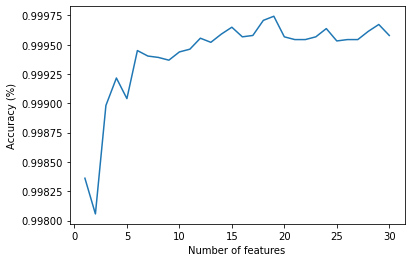

In [16]:
show_accuracy_chart(measures_df)

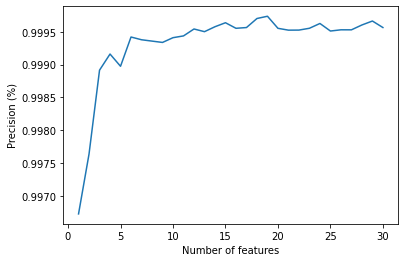

In [17]:
show_precision_chart(measures_df)

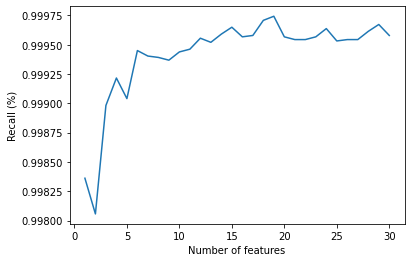

In [18]:
show_recall_chart(measures_df)

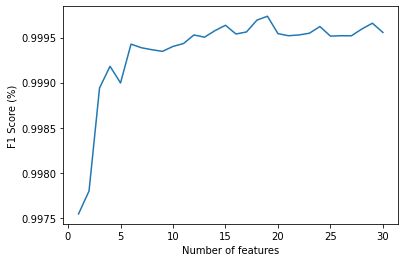

In [19]:
show_f1_score_chart(measures_df)

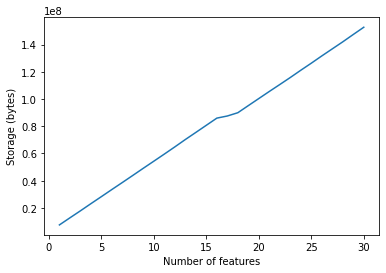

In [20]:
show_storage_chart(measures_df)

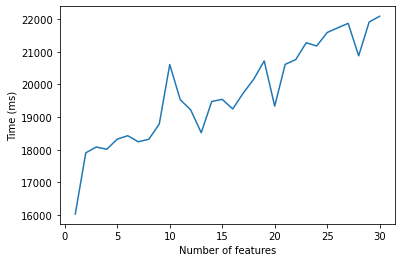

In [21]:
show_training_chart(measures_df)